<img style="float: right;margin:0 10px 10px 0" src="screenshots/cdrc_logo.png" width=180>

# GEOG5995M Programming for Social Science: Core Skills <a class="tocSkip">
<br>


<img style="float: right;margin:0 10px 10px 0" src="screenshots/LIDA-logo.png" width=180><a class="tocSkip">
* #### Contact: F.L.Pontin@leeds.ac.uk <a class="tocSkip">

# Exercise 1:  getting started with spatial data

As is coding custom we import the required packages at the beginning<br>
<font color='orchid'> <b>Import the packages below </font>

In [653]:
#Import the required packages

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import seaborn as sns




We have imported a new package 'geopandas'. Geopandas works like pandas but also handles spatial data. Geopandas was designed to allow people to easily handle and use spatial datasets in Python. <br>

Geopandas has some datasets built into the package. We are going to use these datasets to get started and make some maps.

<font color='orchid'> <b>Run the code below to explore which datasets are built in to the geopandas package </font>

Geopandas has three in built datasets. We are going to use 'naturalearth_cities' and 'naturalearth_lowres'. <br>
To use the datasets we need to read them in from where they are stored in the geopandas package file directory. <br>
We will use the print function to check we have got the correct file path.<br>
<font color= 'orchid'> <b>Run the code bellow to get the file paths for the datasets </font>

In [654]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/Users/user/Documents/GEOG5995-main/rmepc_laua21_mi.csv'

try:
    # Read the CSV file and assign a name to the DataFrame (e.g., df)
    rmepc = pd.read_csv(file_path)

    # Use the head() function to display the first few rows of the DataFrame
    print(rmepc.head())

    print("File has been successfully loaded into the DataFrame 'df'.")
except FileNotFoundError:
    print("File not found. Please make sure the file exists at the specified path.")

      laua21  mean_epc_change  mean_pepc_change  mean_area_change  \
0  E06000001            2.253             0.627             1.552   
1  E06000002            1.508             1.484            -6.120   
2  E06000003            1.542             1.221            -3.936   
3  E06000004            3.574             1.192            -3.375   
4  E06000005            0.948             0.566            -2.002   

   median_epc_change  median_pepc_change  median_area_change  
0                  2                   1               -0.52  
1                  1                   1               -2.39  
2                  1                   1               -0.92  
3                  3                   1                1.00  
4                  1                   1               -0.97  
File has been successfully loaded into the DataFrame 'df'.


In [655]:
rmepc.head()

laua21  mean_epc_change  mean_pepc_change  mean_area_change  \
0  E06000001            2.253             0.627             1.552   
1  E06000002            1.508             1.484            -6.120   
2  E06000003            1.542             1.221            -3.936   
3  E06000004            3.574             1.192            -3.375   
4  E06000005            0.948             0.566            -2.002   

   median_epc_change  median_pepc_change  median_area_change  
0                  2                   1               -0.52  
1                  1                   1               -2.39  
2                  1                   1               -0.92  
3                  3                   1                1.00  
4                  1                   1               -0.97

In [656]:
rmepc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laua21              363 non-null    object 
 1   mean_epc_change     363 non-null    float64
 2   mean_pepc_change    363 non-null    float64
 3   mean_area_change    363 non-null    float64
 4   median_epc_change   363 non-null    int64  
 5   median_pepc_change  363 non-null    int64  
 6   median_area_change  363 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.0+ KB


In [657]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Specify the column(s) you want to delete
columns_to_delete = ['median_epc_change', 'median_pepc_change', 'median_area_change']

# Use the drop method with the axis=1 argument to delete columns
rmepc = rmepc.drop(columns=columns_to_delete)

# Print the modified DataFrame
rmepc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laua21            363 non-null    object 
 1   mean_epc_change   363 non-null    float64
 2   mean_pepc_change  363 non-null    float64
 3   mean_area_change  363 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [658]:
import pandas as pd

# Assuming 'rmepc' is your DataFrame
# Check if each entry in 'laua21' starts with 'E'
mask = rmepc['laua21'].str.startswith('E')

# Keep only the rows where the condition is True

rmepc.drop(rmepc[~mask].index, inplace=True)
# Print the filtered DataFrame
print(rmepc)

        laua21  mean_epc_change  mean_pepc_change  mean_area_change
0    E06000001            2.253             0.627             1.552
1    E06000002            1.508             1.484            -6.120
2    E06000003            1.542             1.221            -3.936
3    E06000004            3.574             1.192            -3.375
4    E06000005            0.948             0.566            -2.002
..         ...              ...               ...               ...
304  E09000029           -0.283            -0.075            -3.867
305  E09000030            7.657             1.783           -18.423
306  E09000031           -0.707            -0.177            -6.164
307  E09000032            2.070            -0.750           -10.024
308  E09000033            2.336            -0.851           -15.390

[309 rows x 4 columns]


In [659]:
rmepc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laua21            309 non-null    object 
 1   mean_epc_change   309 non-null    float64
 2   mean_pepc_change  309 non-null    float64
 3   mean_area_change  309 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.8+ KB


In [660]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/Users/user/Documents/GEOG5995-main/Local_Authority_Districts_December_2021_GB_BGC_2022_-350184439094746283.csv'

try:
    # Read the CSV file and assign a name to the DataFrame (e.g., df)
    LADE = pd.read_csv(file_path)

    # Use the head() function to display the first few rows of the DataFrame
    print(LADE.head())

    print("File has been successfully loaded into the DataFrame 'df'.")
except FileNotFoundError:
    print("File not found. Please make sure the file exists at the specified path.")

   OBJECTID    LAD21CD               LAD21NM LAD21NMW   BNG_E   BNG_N  \
0         1  E06000001            Hartlepool           447160  531474   
1         2  E06000002         Middlesbrough           451141  516887   
2         3  E06000003  Redcar and Cleveland           464361  519597   
3         4  E06000004      Stockton-on-Tees           444940  518183   
4         5  E06000005            Darlington           428029  515648   

      LONG       LAT                              GlobalID   Shape__Area  \
0 -1.27018  54.67614  a0067727-6c25-4d75-bbe3-839cf676a069  9.377150e+07   
1 -1.21099  54.54467  449ea171-0cf1-4f7e-bfd2-4a204eda5ff3  5.385857e+07   
2 -1.00608  54.56752  f5a51119-846e-4757-b327-73b4be205345  2.451429e+08   
3 -1.30664  54.55691  6c7f0974-4974-4793-9d56-56e9fd814184  2.049023e+08   
4 -1.56835  54.53534  9f91263d-693a-442d-b20d-91a0cd0631bb  1.974890e+08   

   Shape__Length  
0    68370.93253  
1    43639.80330  
2    94929.15718  
3   117933.76630  
4   10577

In [661]:
LADE.head()

OBJECTID    LAD21CD               LAD21NM LAD21NMW   BNG_E   BNG_N  \
0         1  E06000001            Hartlepool           447160  531474   
1         2  E06000002         Middlesbrough           451141  516887   
2         3  E06000003  Redcar and Cleveland           464361  519597   
3         4  E06000004      Stockton-on-Tees           444940  518183   
4         5  E06000005            Darlington           428029  515648   

      LONG       LAT                              GlobalID   Shape__Area  \
0 -1.27018  54.67614  a0067727-6c25-4d75-bbe3-839cf676a069  9.377150e+07   
1 -1.21099  54.54467  449ea171-0cf1-4f7e-bfd2-4a204eda5ff3  5.385857e+07   
2 -1.00608  54.56752  f5a51119-846e-4757-b327-73b4be205345  2.451429e+08   
3 -1.30664  54.55691  6c7f0974-4974-4793-9d56-56e9fd814184  2.049023e+08   
4 -1.56835  54.53534  9f91263d-693a-442d-b20d-91a0cd0631bb  1.974890e+08   

   Shape__Length  
0    68370.93253  
1    43639.80330  
2    94929.15718  
3   117933.76630  
4   105775.14000

In [662]:
LADE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       363 non-null    int64  
 1   LAD21CD        363 non-null    object 
 2   LAD21NM        363 non-null    object 
 3   LAD21NMW       363 non-null    object 
 4   BNG_E          363 non-null    int64  
 5   BNG_N          363 non-null    int64  
 6   LONG           363 non-null    float64
 7   LAT            363 non-null    float64
 8   GlobalID       363 non-null    object 
 9   Shape__Area    363 non-null    float64
 10  Shape__Length  363 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 31.3+ KB


In [663]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Specify the column(s) you want to delete
columns_to_delete = ['OBJECTID', 'LAD21NMW', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'Shape__Area', 'Shape__Length']

# Use the drop method with the axis=1 argument to delete columns
LADE = LADE.drop(columns=columns_to_delete)

# Print the modified DataFrame
LADE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   LAD21CD  363 non-null    object
 1   LAD21NM  363 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [664]:
LADE.head()

LAD21CD               LAD21NM
0  E06000001            Hartlepool
1  E06000002         Middlesbrough
2  E06000003  Redcar and Cleveland
3  E06000004      Stockton-on-Tees
4  E06000005            Darlington

In [665]:
import pandas as pd

rmepc = rmepc.rename(columns={'laua21': 'LAD21CD'})
# Merge the DataFrames based on the common column
merged_data = pd.merge(LADE, rmepc, on='LAD21CD', how='inner')
merged_data.head()

LAD21CD               LAD21NM  mean_epc_change  mean_pepc_change  \
0  E06000001            Hartlepool            2.253             0.627   
1  E06000002         Middlesbrough            1.508             1.484   
2  E06000003  Redcar and Cleveland            1.542             1.221   
3  E06000004      Stockton-on-Tees            3.574             1.192   
4  E06000005            Darlington            0.948             0.566   

   mean_area_change  
0             1.552  
1            -6.120  
2            -3.936  
3            -3.375  
4            -2.002

In [666]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LAD21CD           309 non-null    object 
 1   LAD21NM           309 non-null    object 
 2   mean_epc_change   309 non-null    float64
 3   mean_pepc_change  309 non-null    float64
 4   mean_area_change  309 non-null    float64
dtypes: float64(3), object(2)
memory usage: 12.2+ KB


In [667]:
merged_data.head()

LAD21CD               LAD21NM  mean_epc_change  mean_pepc_change  \
0  E06000001            Hartlepool            2.253             0.627   
1  E06000002         Middlesbrough            1.508             1.484   
2  E06000003  Redcar and Cleveland            1.542             1.221   
3  E06000004      Stockton-on-Tees            3.574             1.192   
4  E06000005            Darlington            0.948             0.566   

   mean_area_change  
0             1.552  
1            -6.120  
2            -3.936  
3            -3.375  
4            -2.002

In [668]:
import pandas as pd

rmepc = rmepc.rename(columns={'laua21': 'LAD21CD'})
# Merge the DataFrames based on the common column
merged_data = pd.merge(LADE, rmepc, on='LAD21CD', how='inner')
merged_data.head()

LAD21CD               LAD21NM  mean_epc_change  mean_pepc_change  \
0  E06000001            Hartlepool            2.253             0.627   
1  E06000002         Middlesbrough            1.508             1.484   
2  E06000003  Redcar and Cleveland            1.542             1.221   
3  E06000004      Stockton-on-Tees            3.574             1.192   
4  E06000005            Darlington            0.948             0.566   

   mean_area_change  
0             1.552  
1            -6.120  
2            -3.936  
3            -3.375  
4            -2.002

In [669]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/Users/user/Documents/GEOG5995-main/fuel_poor.csv'

try:
    # Read the CSV file and assign a name to the DataFrame (e.g., df)
    fuel_poor = pd.read_csv(file_path)

    # Use the head() function to display the first few rows of the DataFrame
    print(fuel_poor.head())

    print("File has been successfully loaded into the DataFrame 'df'.")
except FileNotFoundError:
    print("File not found. Please make sure the file exists at the specified path.")



  Area Codes  Area names      Unnamed: 2 Unnamed: 3 Nu of households  \
0   E92000001     ENGLAND            NaN        NaN       24,070,861   
1   E12000001  NORTH EAST            NaN        NaN        1,202,496   
2   E06000047         NaN  County Durham        NaN          239,995   
3   E06000005         NaN     Darlington        NaN           50,028   
4   E06000001         NaN     Hartlepool        NaN           41,885   

  Nu in fuel poverty  Fuel poor (%)  
0          3,162,752           13.1  
1            168,751           14.0  
2             35,210           14.7  
3              7,255           14.5  
4              5,993           14.3  
File has been successfully loaded into the DataFrame 'df'.


In [670]:
fuel_poor.head()

Area Codes  Area names      Unnamed: 2 Unnamed: 3 Nu of households  \
0   E92000001     ENGLAND            NaN        NaN       24,070,861   
1   E12000001  NORTH EAST            NaN        NaN        1,202,496   
2   E06000047         NaN  County Durham        NaN          239,995   
3   E06000005         NaN     Darlington        NaN           50,028   
4   E06000001         NaN     Hartlepool        NaN           41,885   

  Nu in fuel poverty  Fuel poor (%)  
0          3,162,752           13.1  
1            168,751           14.0  
2             35,210           14.7  
3              7,255           14.5  
4              5,993           14.3

In [671]:
# Check the data types of the 'Nu of households' column
print(fuel_poor['Nu in fuel poverty'].dtype)

# If the data type is not already a string, coerce it to string
fuel_poor['Nu in fuel poverty'] = fuel_poor['Nu in fuel poverty'].astype(str)

# Replace commas and convert the column to numeric
fuel_poor['Nu in fuel poverty'] = pd.to_numeric(fuel_poor['Nu in fuel poverty'].str.replace(',', ''), errors='coerce')

# Convert NaN to 0 (or any other value you prefer)
fuel_poor['Nu in fuel poverty'] = fuel_poor['Nu in fuel poverty'].fillna(0)

# Convert the column to integers
fuel_poor['Nu in fuel poverty'] = fuel_poor['Nu in fuel poverty'].astype(int)

# Now you can perform operations on the 'Nu of households' column as integers
total_poor = fuel_poor['Nu in fuel poverty'].sum()

print(f'Total Poor: {total_poor}')

object
Total Poor: 11732750


In [672]:
# Check the data types of the 'Nu of households' column
print(fuel_poor['Nu of households'].dtype)

# If the data type is not already a string, coerce it to string
fuel_poor['Nu of households'] = fuel_poor['Nu of households'].astype(str)

# Replace commas and convert the column to numeric
fuel_poor['Nu of households'] = pd.to_numeric(fuel_poor['Nu of households'].str.replace(',', ''), errors='coerce')

# Convert NaN to 0 (or any other value you prefer)
fuel_poor['Nu of households'] = fuel_poor['Nu of households'].fillna(0)

# Convert the column to integers
fuel_poor['Nu of households'] = fuel_poor['Nu of households'].astype(int)

# Now you can perform operations on the 'Nu of households' column as integers
total_households = fuel_poor['Nu of households'].sum()

print(f'Total Number of Households: {total_households}')

object
Total Number of Households: 89221993


In [673]:
# Assuming 'Nu of households' is the column you want to convert to integer
# Replace any non-numeric characters with NaN and convert the column to numeric
fuel_poor['Nu of households'] = pd.to_numeric(fuel_poor['Nu of households'], errors='coerce')

# Convert NaN to 0 (or any other value you prefer)
fuel_poor['Nu of households'] = fuel_poor['Nu of households'].fillna(0)

# Convert the column to integers
fuel_poor['Nu of households'] = fuel_poor['Nu of households'].astype(int)

# Now you can perform operations on the 'Nu of households' column as integers
total_households = fuel_poor['Nu of households'].sum()

print(f'Total Number of Households: {total_households}')

Total Number of Households: 89221993


In [674]:

total = fuel_poor['Nu of households'].sum()
print(f'Total: {total}')


# Format the total with commas
formatted_total = "{:,}".format(total)

print(f'Total: {formatted_total}')

Total: 89221993
Total: 89,221,993


In [675]:
fuel_poor.tail()

Area Codes  Area names  Unnamed: 2      Unnamed: 3  Nu of households  \
330   E07000079         NaN        NaN        Cotswold             42111   
331   E07000080         NaN        NaN  Forest of Dean             38537   
332   E07000081         NaN        NaN      Gloucester             57445   
333   E07000082         NaN        NaN          Stroud             54209   
334   E07000083         NaN        NaN      Tewkesbury             42457   

     Nu in fuel poverty  Fuel poor (%)  
330                5303           12.6  
331                5491           14.2  
332                6023           10.5  
333                6196           11.4  
334                3628            8.5

In [676]:
fuel_poor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Codes          335 non-null    object 
 1   Area names          10 non-null     object 
 2   Unnamed: 2          92 non-null     object 
 3   Unnamed: 3          233 non-null    object 
 4   Nu of households    335 non-null    int64  
 5   Nu in fuel poverty  335 non-null    int64  
 6   Fuel poor (%)       335 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.4+ KB


In [677]:
rows_with_area_names = fuel_poor[fuel_poor['Area names '].notnull()].head(10)
print(rows_with_area_names)

    Area Codes                Area names  Unnamed: 2 Unnamed: 3  \
0     E92000001                   ENGLAND        NaN        NaN   
1     E12000001                NORTH EAST        NaN        NaN   
15    E12000002               NORTH WEST         NaN        NaN   
54    E12000003  YORKSHIRE AND THE HUMBER        NaN        NaN   
72    E12000004             EAST MIDLANDS        NaN        NaN   
112   E12000005             WEST MIDLANDS        NaN        NaN   
147   E12000006                      EAST        NaN        NaN   
198   E12000007                    LONDON        NaN        NaN   
234   E12000008                SOUTH EAST        NaN        NaN   
305   E12000009                SOUTH WEST        NaN        NaN   

     Nu of households  Nu in fuel poverty  Fuel poor (%)  
0            24070861             3162752           13.1  
1             1202496              168751           14.0  
15            3219948              468802           14.6  
54            2393859     

In [678]:
# Assuming you want to drop rows where 'Area Codes' do not start with 'E0'
fuel_poorE0 = fuel_poor[fuel_poor['Area Codes '].str.startswith('E0')]

# Print the modified DataFrame
print(fuel_poorE0)

    Area Codes  Area names       Unnamed: 2      Unnamed: 3  Nu of households  \
2     E06000047         NaN   County Durham             NaN            239995   
3     E06000005         NaN      Darlington             NaN             50028   
4     E06000001         NaN      Hartlepool             NaN             41885   
5     E06000002         NaN   Middlesbrough             NaN             61626   
6     E06000057         NaN  Northumberland             NaN            150253   
..          ...         ...             ...             ...               ...   
330   E07000079         NaN             NaN        Cotswold             42111   
331   E07000080         NaN             NaN  Forest of Dean             38537   
332   E07000081         NaN             NaN      Gloucester             57445   
333   E07000082         NaN             NaN          Stroud             54209   
334   E07000083         NaN             NaN      Tewkesbury             42457   

     Nu in fuel poverty  Fu

In [679]:
 fuel_poorE0.isna().sum()

Area Codes              0
Area names            296
Unnamed: 2            233
Unnamed: 3             63
Nu of households        0
Nu in fuel poverty      0
Fuel poor (%)           0
dtype: int64

In [680]:
fuel_poorE0.shape

(296, 7)

In [681]:
# Now you can perform operations on the 'Nu of households' column as integers
total_households = fuel_poorE0['Nu of households'].sum()

print(f'Total Number of Households: {total_households}')

Total Number of Households: 24070861


In [683]:
# Now you can perform operations on the 'Nu of households' column as integers
total_households = fuel_poorE0['Nu in fuel poverty'].sum()

print(f'Total Number in fuel poverty: {total_households}')

Total Number in fuel poverty: 3162752


In [684]:
fuel_poorE0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 2 to 334
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Codes          296 non-null    object 
 1   Area names          0 non-null      object 
 2   Unnamed: 2          63 non-null     object 
 3   Unnamed: 3          233 non-null    object 
 4   Nu of households    296 non-null    int64  
 5   Nu in fuel poverty  296 non-null    int64  
 6   Fuel poor (%)       296 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.5+ KB


In [685]:
fuel_poorE0.head()

Area Codes  Area names       Unnamed: 2 Unnamed: 3  Nu of households  \
2   E06000047         NaN   County Durham        NaN            239995   
3   E06000005         NaN      Darlington        NaN             50028   
4   E06000001         NaN      Hartlepool        NaN             41885   
5   E06000002         NaN   Middlesbrough        NaN             61626   
6   E06000057         NaN  Northumberland        NaN            150253   

   Nu in fuel poverty  Fuel poor (%)  
2               35210           14.7  
3                7255           14.5  
4                5993           14.3  
5               10244           16.6  
6               20676           13.8

In [686]:


    # Use the head() function to display the first few rows of the DataFrame
    merged_data.tail()

LAD21CD         LAD21NM  mean_epc_change  mean_pepc_change  \
304  E09000029          Sutton           -0.283            -0.075   
305  E09000030   Tower Hamlets            7.657             1.783   
306  E09000031  Waltham Forest           -0.707            -0.177   
307  E09000032      Wandsworth            2.070            -0.750   
308  E09000033     Westminster            2.336            -0.851   

     mean_area_change  
304            -3.867  
305           -18.423  
306            -6.164  
307           -10.024  
308           -15.390

In [687]:
 merged_data.head()

LAD21CD               LAD21NM  mean_epc_change  mean_pepc_change  \
0  E06000001            Hartlepool            2.253             0.627   
1  E06000002         Middlesbrough            1.508             1.484   
2  E06000003  Redcar and Cleveland            1.542             1.221   
3  E06000004      Stockton-on-Tees            3.574             1.192   
4  E06000005            Darlington            0.948             0.566   

   mean_area_change  
0             1.552  
1            -6.120  
2            -3.936  
3            -3.375  
4            -2.002

In [688]:
 merged_data.shape
    

(309, 5)

In [689]:
 merged_data.dtypes

LAD21CD              object
LAD21NM              object
mean_epc_change     float64
mean_pepc_change    float64
mean_area_change    float64
dtype: object

In [690]:
 merged_data.info

<bound method DataFrame.info of        LAD21CD               LAD21NM  mean_epc_change  mean_pepc_change  \
0    E06000001            Hartlepool            2.253             0.627   
1    E06000002         Middlesbrough            1.508             1.484   
2    E06000003  Redcar and Cleveland            1.542             1.221   
3    E06000004      Stockton-on-Tees            3.574             1.192   
4    E06000005            Darlington            0.948             0.566   
..         ...                   ...              ...               ...   
304  E09000029                Sutton           -0.283            -0.075   
305  E09000030         Tower Hamlets            7.657             1.783   
306  E09000031        Waltham Forest           -0.707            -0.177   
307  E09000032            Wandsworth            2.070            -0.750   
308  E09000033           Westminster            2.336            -0.851   

     mean_area_change  
0               1.552  
1              -6.1

In [691]:
 merged_data.isna()

LAD21CD  LAD21NM  mean_epc_change  mean_pepc_change  mean_area_change
0      False    False            False             False             False
1      False    False            False             False             False
2      False    False            False             False             False
3      False    False            False             False             False
4      False    False            False             False             False
..       ...      ...              ...               ...               ...
304    False    False            False             False             False
305    False    False            False             False             False
306    False    False            False             False             False
307    False    False            False             False             False
308    False    False            False             False             False

[309 rows x 5 columns]

<div class="alert alert-block alert-info">
<b>Note:</b> This is very similar to the <code>pd.read_csv() function</code>
</div>

In [692]:
 merged_data.isna().sum()

LAD21CD             0
LAD21NM             0
mean_epc_change     0
mean_pepc_change    0
mean_area_change    0
dtype: int64

In [693]:
merged_data.describe()


mean_epc_change  mean_pepc_change  mean_area_change
count       309.000000        309.000000        309.000000
mean          1.309023          0.692045         -0.313751
std           1.948310          1.066080          6.511748
min         -15.115000         -3.917000        -28.995000
25%           0.206000         -0.054000         -4.738000
50%           1.392000          0.672000         -0.393000
75%           2.449000          1.322000          4.297000
max           7.657000          5.377000         28.108000

In [694]:
print("Columns in df1:", fuel_poorE0.columns)
print("Columns in df2:", merged_data.columns)

Columns in df1: Index(['Area Codes ', 'Area names ', 'Unnamed: 2', 'Unnamed: 3',
       'Nu of households', 'Nu in fuel poverty', 'Fuel poor (%)'],
      dtype='object')
Columns in df2: Index(['LAD21CD', 'LAD21NM', 'mean_epc_change', 'mean_pepc_change',
       'mean_area_change'],
      dtype='object')


In [695]:
import geopandas as gpd
import pandas as pd



# Rename the column in the CSV data to match the column name in the shapefile
merged_data = merged_data.rename(columns={'LAD21CD': 'Area Codes '})

# Merge the data using the common identifier
triple_data = merged_data.merge(fuel_poorE0, on='Area Codes ', how='left')

triple_data.head()


Area Codes                LAD21NM  mean_epc_change  mean_pepc_change  \
0   E06000001            Hartlepool            2.253             0.627   
1   E06000002         Middlesbrough            1.508             1.484   
2   E06000003  Redcar and Cleveland            1.542             1.221   
3   E06000004      Stockton-on-Tees            3.574             1.192   
4   E06000005            Darlington            0.948             0.566   

   mean_area_change Area names             Unnamed: 2 Unnamed: 3  \
0             1.552         NaN            Hartlepool        NaN   
1            -6.120         NaN         Middlesbrough        NaN   
2            -3.936         NaN  Redcar and Cleveland        NaN   
3            -3.375         NaN      Stockton-on-Tees        NaN   
4            -2.002         NaN            Darlington        NaN   

   Nu of households  Nu in fuel poverty  Fuel poor (%)  
0           41885.0              5993.0           14.3  
1           61626.0             10244.0           16.6  
2           63059.0              9300.0           14.7  
3           85685.0             10424.0           12.2  
4           50028.0              7255.0           14.5

In [696]:
triple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Codes          309 non-null    object 
 1   LAD21NM             309 non-null    object 
 2   mean_epc_change     309 non-null    float64
 3   mean_pepc_change    309 non-null    float64
 4   mean_area_change    309 non-null    float64
 5   Area names          0 non-null      object 
 6   Unnamed: 2          59 non-null     object 
 7   Unnamed: 3          233 non-null    object 
 8   Nu of households    292 non-null    float64
 9   Nu in fuel poverty  292 non-null    float64
 10  Fuel poor (%)       292 non-null    float64
dtypes: float64(6), object(5)
memory usage: 26.7+ KB


In [697]:
# Assuming 'df' is your DataFrame
# Use the isna() method to identify rows where 'Fuel poor (%)' is NaN
rows_with_missing_fuel_poor = triple_data[triple_data['Fuel poor (%)'].isna()]

# Print the rows
print(rows_with_missing_fuel_poor)

    Area Codes                     LAD21NM  mean_epc_change  mean_pepc_change  \
64    E07000026                  Allerdale           -0.537             0.152   
65    E07000027          Barrow-in-Furness            0.071            -0.591   
66    E07000028                   Carlisle            1.543             0.238   
67    E07000029                   Copeland           -0.982             0.136   
68    E07000030                       Eden           -4.300            -1.173   
69    E07000031             South Lakeland           -1.972            -1.942   
171   E07000163                     Craven            0.206             0.534   
172   E07000164                  Hambleton           -0.242             0.725   
173   E07000165                  Harrogate           -0.662            -0.853   
174   E07000166              Richmondshire           -1.318            -0.132   
175   E07000167                    Ryedale           -2.811            -1.097   
176   E07000168             

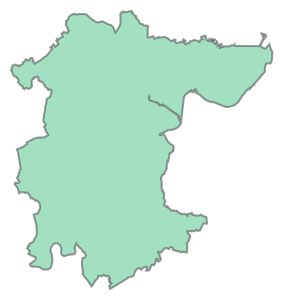

In [698]:
import geopandas as gpd

# Load the GeoDataFrame
shapefile_path = '/Users/user/Documents/GEOG5995-main/LAD_DEC_2021_GB_BGC.shx'
shp = gpd.read_file(shapefile_path)

# Access and display the geometry of index 3
shp.loc[3, 'geometry']

In [699]:
shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  363 non-null    geometry
dtypes: geometry(1)
memory usage: 3.0 KB


In [700]:
import geopandas as gpd

# Assuming lad21 and shp are your GeoDataFrames
merged_gdf = triple_data.merge(shp, left_index=True, right_index=True, how='left')

# Convert the resulting DataFrame back to a GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')

# Save the merged GeoDataFrame to a new shapefile
merged_gdf.to_file('/Users/user/Documents/GEOG5995-main/merged_shapefile.shp')

/var/folders/5f/7mc4blcs2mxgh06z6sgk8sc80000gp/T/ipykernel_77893/1600542266.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file('/Users/user/Documents/GEOG5995-main/merged_shapefile.shp')


In [701]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area Codes          309 non-null    object  
 1   LAD21NM             309 non-null    object  
 2   mean_epc_change     309 non-null    float64 
 3   mean_pepc_change    309 non-null    float64 
 4   mean_area_change    309 non-null    float64 
 5   Area names          0 non-null      object  
 6   Unnamed: 2          59 non-null     object  
 7   Unnamed: 3          233 non-null    object  
 8   Nu of households    292 non-null    float64 
 9   Nu in fuel poverty  292 non-null    float64 
 10  Fuel poor (%)       292 non-null    float64 
 11  geometry            309 non-null    geometry
dtypes: float64(6), geometry(1), object(5)
memory usage: 29.1+ KB


In [702]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Specify the column(s) you want to delete
columns_to_delete = ['Area names ', 'Unnamed: 2', 'Unnamed: 3']

# Use the drop method with the axis=1 argument to delete columns
merged_gdf = merged_gdf.drop(columns=columns_to_delete)

# Print the modified DataFrame
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area Codes          309 non-null    object  
 1   LAD21NM             309 non-null    object  
 2   mean_epc_change     309 non-null    float64 
 3   mean_pepc_change    309 non-null    float64 
 4   mean_area_change    309 non-null    float64 
 5   Nu of households    292 non-null    float64 
 6   Nu in fuel poverty  292 non-null    float64 
 7   Fuel poor (%)       292 non-null    float64 
 8   geometry            309 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 21.9+ KB


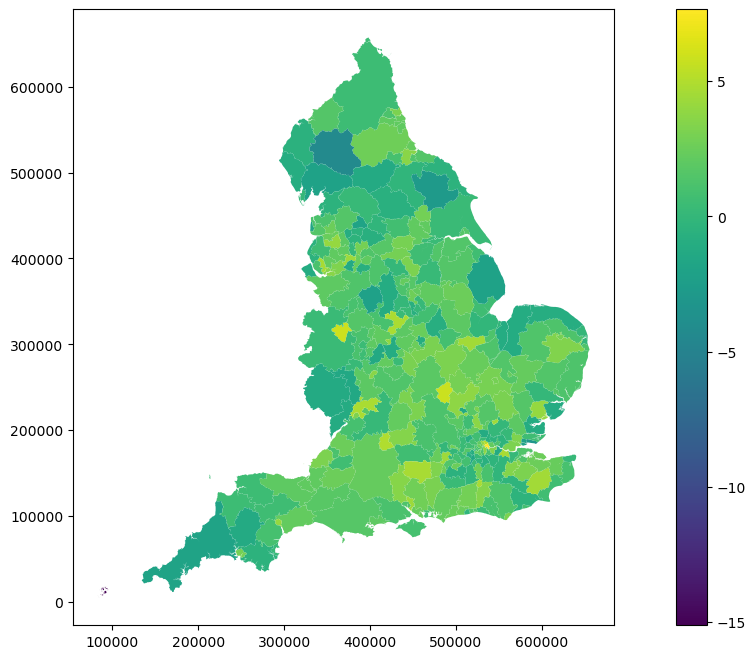

In [703]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
merged_gdf.plot(ax=ax, column ='mean_epc_change', legend=True)
# show the map
plt.show()

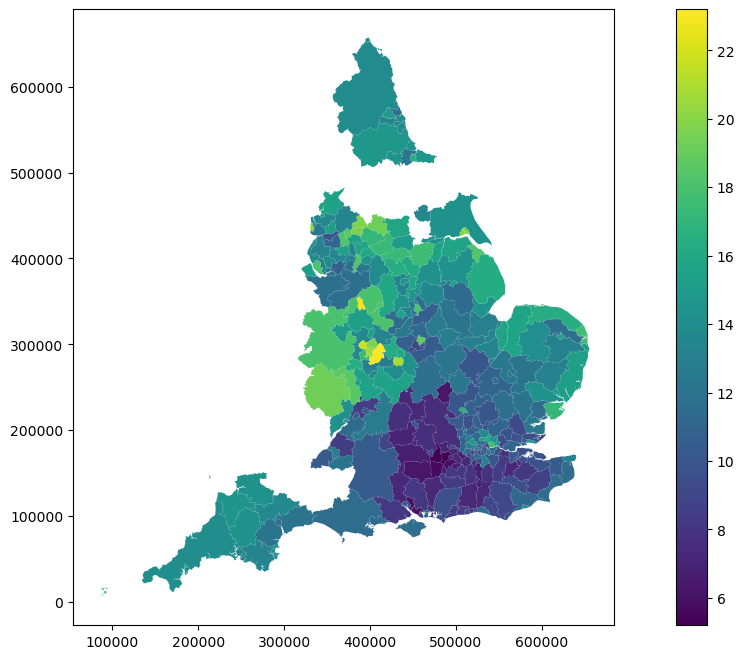

In [704]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
merged_gdf.plot(ax=ax, column ='Fuel poor (%)', legend=True)
# show the map
plt.show()

In [705]:
merged_gdf['Nu of households'].sum()

23295859.0

In [706]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area Codes          309 non-null    object  
 1   LAD21NM             309 non-null    object  
 2   mean_epc_change     309 non-null    float64 
 3   mean_pepc_change    309 non-null    float64 
 4   mean_area_change    309 non-null    float64 
 5   Nu of households    292 non-null    float64 
 6   Nu in fuel poverty  292 non-null    float64 
 7   Fuel poor (%)       292 non-null    float64 
 8   geometry            309 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 21.9+ KB


In [707]:
print(merged_gdf.index)

RangeIndex(start=0, stop=309, step=1)


In [708]:
# Assuming df is your DataFrame 
64    E07000026                  Allerdale              
65    E07000027          Barrow-in-Furness               
66    E07000028                   Carlisle              
67    E07000029                   Copeland              
68    E07000030                       Eden              
69    E07000031             South Lakeland              
171   E07000163                     Craven               
172   E07000164                  Hambleton             
173   E07000165                  Harrogate             
174   E07000166              Richmondshire              
175   E07000167                    Ryedale              
176   E07000168                Scarborough              
177   E07000169                      Selby              
190   E07000187                     Mendip               
191   E07000188                  Sedgemoor               
192   E07000189             South Somerset             
239   E07000246  Somerset West and Taunton              

    Area Codes  Area names                Unnamed: 2 
16    E06000063         NaN               Cumberland        64,66,67  
19    E06000064         NaN  Westmorland and Furness        65,68,69  
51    E06000065         NaN          North Yorkshire        171.172,173,174,175,176,177  
277   E06000066         NaN                Somerset         190,191,192,239   

     Nu of households  Nu in fuel poverty  Fuel poor (%) LAD21NM  \
16             128063               18711           14.6     3   
19             105747               15648           14.8     3   
51             281927               43653           15.5     7   
277            259265               31883           12.3     4  

128063/3

SyntaxError: invalid syntax (2961386768.py, line 2)

In [727]:
+128063 + 105747+ 281927+ 259265

775002

In [725]:
24070861-23295859 

775002

In [709]:
128063/3


42687.666666666664

In [710]:
 18711/3

6237.0

In [742]:
# Define the numbers
number1 = 128063
number2 = 105747
number3 = 281927
number4 = 259265

# Perform the mathematical operations
result1 =round(number1 / 3)
result2 = round(number2 / 3)
result3 = round(number3 / 7)
result4 = round(number4 / 4)

# Print the results
print("Result 1:", result1)
print("Result 2:", result2)
print("Result 3:", result3)
print("Result 4:", result4)

Result 1: 42688
Result 2: 35249
Result 3: 40275
Result 4: 64816


In [743]:
# Define the numbers
number1 = 18711
number2 =  15648
number3 =  43653
number4 =  31883

# Perform the mathematical operations
result1 =round(number1 / 3)
result2 = round(number2 / 3)
result3 = round(number3 / 7)
result4 = round(number4 / 4)

# Print the results
print("Result 1:", result1)
print("Result 2:", result2)
print("Result 3:", result3)
print("Result 4:", result4)

Result 1: 6237
Result 2: 5216
Result 3: 6236
Result 4: 7971


In [731]:
row_64 = merged_gdf.loc[64]
print(row_64)

Area Codes                                                    E07000026
LAD21NM                                                       Allerdale
mean_epc_change                                                  -0.537
mean_pepc_change                                                  0.152
mean_area_change                                                   4.57
Nu of households                                                42688.0
Nu in fuel poverty                                               6237.0
Fuel poor (%)                                                      14.6
geometry              MULTIPOLYGON (((317566.10170000046 554649.9025...
Name: 64, dtype: object


In [748]:
# Assuming df is your DataFrame
rows_to_update = [64, 66, 67]  # Replace with your actual row indices
column_values_to_replace = {'Nu of households': 42688, 'Nu in fuel poverty': 6237, 'Fuel poor (%)': 14.6}

# Iterate over rows and columns to update the values
for row_index in rows_to_update:
    for column_name, value_to_replace in column_values_to_replace.items():
        # Replace the existing value with the new value
        merged_gdf.loc[row_index, column_name] = value_to_replace

# Print out the updated rows
updated_rows = merged_gdf.loc[rows_to_update]
print(updated_rows)

   Area Codes     LAD21NM  mean_epc_change  mean_pepc_change  \
64   E07000026  Allerdale           -0.537             0.152   
66   E07000028   Carlisle            1.543             0.238   
67   E07000029   Copeland           -0.982             0.136   

    mean_area_change  Nu of households  Nu in fuel poverty  Fuel poor (%)  \
64             4.570           42688.0              6237.0           14.6   
66            -0.129           42688.0              6237.0           14.6   
67             5.607           42688.0              6237.0           14.6   

                                             geometry  
64  MULTIPOLYGON (((317566.102 554649.903, 317599....  
66  MULTIPOLYGON (((328405.579 559580.291, 328389....  
67  MULTIPOLYGON (((318154.751 480659.017, 318141....  


In [749]:
# Assuming df is your DataFrame
rows_to_update = [65, 68, 69]  # Replace with your actual row indices
column_values_to_replace = {'Nu of households': 35249, 'Nu in fuel poverty': 5216, 'Fuel poor (%)': 14.8}

# Iterate over rows and columns to update the values
for row_index in rows_to_update:
    for column_name, value_to_replace in column_values_to_replace.items():
        # Replace the existing value with the new value
        merged_gdf.loc[row_index, column_name] = value_to_replace

# Print out the updated rows
updated_rows = merged_gdf.loc[rows_to_update]
print(updated_rows)

   Area Codes             LAD21NM  mean_epc_change  mean_pepc_change  \
65   E07000027  Barrow-in-Furness            0.071            -0.591   
68   E07000030               Eden           -4.300            -1.173   
69   E07000031     South Lakeland           -1.972            -1.942   

    mean_area_change  Nu of households  Nu in fuel poverty  Fuel poor (%)  \
65            -6.717           35249.0              5216.0           14.8   
68            13.922           35249.0              5216.0           14.8   
69             3.426           35249.0              5216.0           14.8   

                                             geometry  
65  MULTIPOLYGON (((321524.003 463828.200, 321485....  
68  POLYGON ((374520.502 550000.104, 374872.302 54...  
69  MULTIPOLYGON (((332160.000 475856.697, 332161....  


In [750]:
# Assuming df is your DataFrame

rows_to_update = [171, 172, 173, 174, 175, 176, 177]  # Replace with your actual row indices
column_values_to_replace = {'Nu of households': 40275, 'Nu in fuel poverty': 6236, 'Fuel poor (%)': 15.5}

# Iterate over rows and columns to update the values
for row_index in rows_to_update:
    for column_name, value_to_replace in column_values_to_replace.items():
        # Replace the existing value with the new value
        merged_gdf.loc[row_index, column_name] = value_to_replace

# Print out the updated rows
updated_rows = merged_gdf.loc[rows_to_update]
print(updated_rows)

    Area Codes         LAD21NM  mean_epc_change  mean_pepc_change  \
171   E07000163         Craven            0.206             0.534   
172   E07000164      Hambleton           -0.242             0.725   
173   E07000165      Harrogate           -0.662            -0.853   
174   E07000166  Richmondshire           -1.318            -0.132   
175   E07000167        Ryedale           -2.811            -1.097   
176   E07000168    Scarborough           -0.501            -0.969   
177   E07000169          Selby            2.139             1.168   

     mean_area_change  Nu of households  Nu in fuel poverty  Fuel poor (%)  \
171             5.340           40275.0              6236.0           15.5   
172            10.078           40275.0              6236.0           15.5   
173            10.065           40275.0              6236.0           15.5   
174             8.749           40275.0              6236.0           15.5   
175            13.241           40275.0              6236

In [751]:
# Assuming df is your DataFrame
rows_to_update = [190, 191, 192, 239]  # Replace with your actual row indices
column_values_to_replace = {'Nu of households': 64816, 'Nu in fuel poverty': 7971, 'Fuel poor (%)': 12.3 }

# Iterate over rows and columns to update the values
for row_index in rows_to_update:
    for column_name, value_to_replace in column_values_to_replace.items():
        # Replace the existing value with the new value
        merged_gdf.loc[row_index, column_name] = value_to_replace

# Print out the updated rows
updated_rows = merged_gdf.loc[rows_to_update]
print(updated_rows)

    Area Codes                     LAD21NM  mean_epc_change  mean_pepc_change  \
190   E07000187                     Mendip            2.562             1.440   
191   E07000188                  Sedgemoor            2.058             0.954   
192   E07000189             South Somerset            1.710             0.651   
239   E07000246  Somerset West and Taunton            2.039             1.014   

     mean_area_change  Nu of households  Nu in fuel poverty  Fuel poor (%)  \
190            -0.393           64816.0              7971.0           12.3   
191             1.332           64816.0              7971.0           12.3   
192             0.117           64816.0              7971.0           12.3   
239            -0.380           64816.0              7971.0           12.3   

                                              geometry  
190  POLYGON ((347500.802 158466.699, 347459.898 15...  
191  MULTIPOLYGON (((334793.703 129134.295, 334712....  
192  MULTIPOLYGON (((337535.499 

In [752]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area Codes          309 non-null    object  
 1   LAD21NM             309 non-null    object  
 2   mean_epc_change     309 non-null    float64 
 3   mean_pepc_change    309 non-null    float64 
 4   mean_area_change    309 non-null    float64 
 5   Nu of households    309 non-null    float64 
 6   Nu in fuel poverty  309 non-null    float64 
 7   Fuel poor (%)       309 non-null    float64 
 8   geometry            309 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 21.9+ KB


In [753]:
merged_gdf['Nu of households'].sum()

24070859.0

In [754]:
# Assuming df is your DataFrame 24,070,861 c
 3,162,752 

merged_gdf['Nu in fuel poverty'].sum()

3162752.0

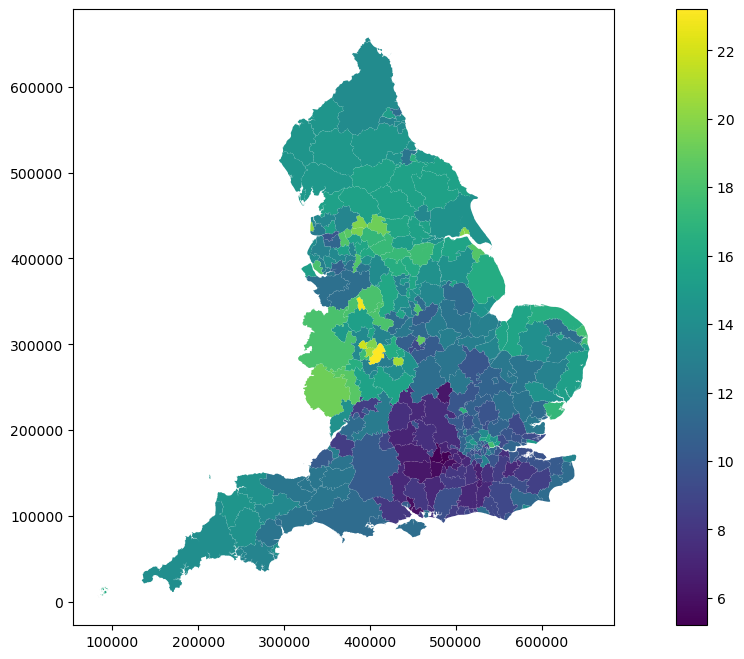

In [755]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
merged_gdf.plot(ax=ax, column ='Fuel poor (%)', legend=True)
# show the map
plt.show()

In [756]:
merged_gdf.describe()

mean_epc_change  mean_pepc_change  mean_area_change  Nu of households  \
count       309.000000        309.000000        309.000000        309.000000   
mean          1.309023          0.692045         -0.313751      77899.220065   
std           1.948310          1.066080          6.511748      50940.774614   
min         -15.115000         -3.917000        -28.995000        984.000000   
25%           0.206000         -0.054000         -4.738000      44729.000000   
50%           1.392000          0.672000         -0.393000      61626.000000   
75%           2.449000          1.322000          4.297000      98321.000000   
max           7.657000          5.377000         28.108000     433435.000000   

       Nu in fuel poverty  Fuel poor (%)  
count          309.000000     309.000000  
mean         10235.443366      12.588026  
std           9137.931480       3.477276  
min            160.000000       5.200000  
25%           5216.000000      10.100000  
50%           7364.000000      12.400000  
75%          11802.000000      14.900000  
max         100512.000000      23.200000

In [757]:
merged_gdf_numeric = merged_gdf.select_dtypes(include=np.number)
merged_gdf_numeric.corr()

mean_epc_change  mean_pepc_change  mean_area_change  \
mean_epc_change            1.000000          0.542524         -0.222539   
mean_pepc_change           0.542524          1.000000         -0.050819   
mean_area_change          -0.222539         -0.050819          1.000000   
Nu of households           0.039701         -0.107376         -0.231030   
Nu in fuel poverty        -0.081730         -0.158118         -0.223305   
Fuel poor (%)             -0.369293         -0.232685         -0.084064   

                    Nu of households  Nu in fuel poverty  Fuel poor (%)  
mean_epc_change             0.039701           -0.081730      -0.369293  
mean_pepc_change           -0.107376           -0.158118      -0.232685  
mean_area_change           -0.231030           -0.223305      -0.084064  
Nu of households            1.000000            0.920567       0.242929  
Nu in fuel poverty          0.920567            1.000000       0.512278  
Fuel poor (%)               0.242929            0.512278       1.000000

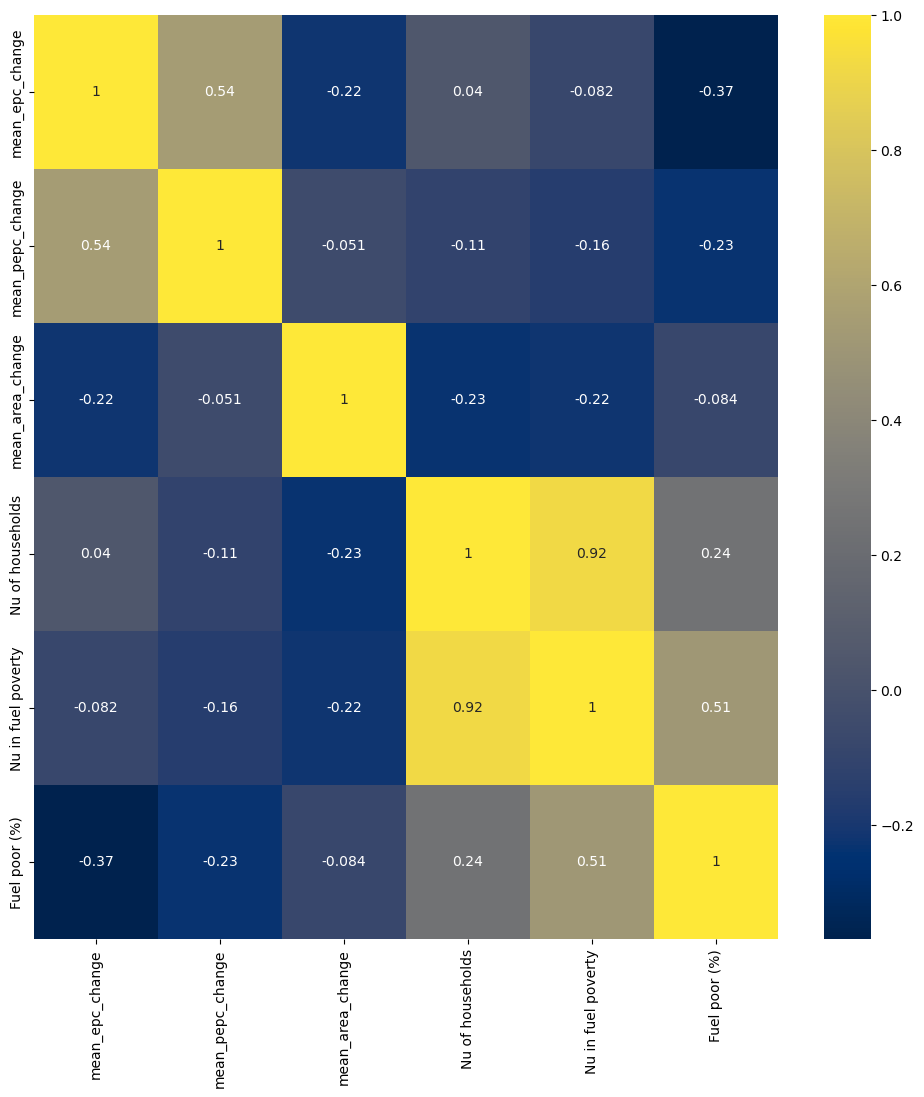

In [759]:
plt.figure(figsize=(12,12))

# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
# the colour mappimg can be made sympathic for thsoe who are colour blind e.g.'viridis' or 'cividis' (FN 18)
sns.heatmap(merged_gdf_numeric.corr(), annot=True, cmap='cividis');

In [573]:
# Assuming df is your DataFrame
rows_to_update = [64, 66, 67]  # Replace with your actual row indices
columns_to_update = [' Nu of households': 42688, 'Nu in fuel poverty': 6237, 'Fuel poor (%): 14.6']  
# Iterate over rows and columns to update the values
for row_index in rows_to_update:
    for column_name, float_number_to_add in column_numbers_to_add.items():
        merged_gdf..loc[row_index, column_name] += float_number_to_add

# Print out the updated rows
updated_rows = merged_gdf..loc[rows_to_update]
print(updated_rows)

SyntaxError: invalid syntax (739391791.py, line 3)

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

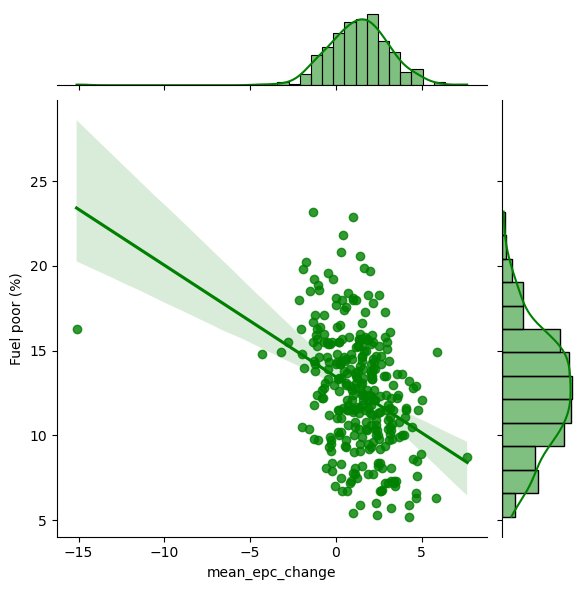

In [762]:
# review distribution for datapoints  
sns.jointplot(x='mean_epc_change',y='Fuel poor (%)', kind ='reg', color='green' ,data=merged_gdf);

In [565]:
import pandas as pd

# Assuming merged_gdf is your GeoDataFrame
rows_to_merge = [64, 66, 67]
rows_to_merge_df = merged_gdf.iloc[rows_to_merge]

# Sum the float64 columns
summed_values = rows_to_merge_df.select_dtypes(include='float64').sum()

# Combine the geometries
merged_geometry = rows_to_merge_df.unary_union

# Create a new row with the summed values and combined geometry
new_row = pd.DataFrame([summed_values.tolist() + [merged_geometry]], columns=merged_gdf.columns)

# Rename the object columns
new_row = new_row.rename(columns={'Area Codes ': 'new_area_code', 'LAD21NM ': 'new_lad_name'})

# Exclude the selected rows from the original DataFrame
merged_gdf = merged_gdf.drop(rows_to_merge)

# Concatenate the new row to the DataFrame
merged_gdf = pd.concat([merged_gdf, new_row], ignore_index=True)

ValueError: 9 columns passed, passed data had 7 columns

In [561]:
import geopandas as gpd

# Assuming merged_gdf is your GeoDataFrame
rows_to_merge = [64, 66, 67]

# Select the rows you want to merge
rows_to_merge_df = merged_gdf.loc[rows_to_merge]

# Sum the float64 columns
summed_values = rows_to_merge_df.select_dtypes(include='float64').sum()

# Append the summed values as a new row
new_row = pd.DataFrame([summed_values], columns=summed_values.index)

# Merge the geometries
new_geometry = gpd.GeoSeries(rows_to_merge_df['geometry'].unary_union)

# Append the new geometry to the new row
new_row['geometry'] = new_geometry

# Rename the object columns
new_row = new_row.rename(columns={'Area Codes ': 'new_area_code', 'LAD21NM': 'new_lad_name'})

# Exclude the selected rows from the original DataFrame
merged_gdf = merged_gdf.drop(rows_to_merge)

# Append the new row to the DataFrame
merged_gdf = merged_gdf.append(new_row, ignore_index=True)



AttributeError: 'GeoDataFrame' object has no attribute 'append'

In [ ]:
row_indices_to_merge = [64, 66, 67]

# Extract data from each column in the rows to merge
data_to_merge = df.loc[row_indices_to_merge, ['Column1', 'Column2', 'NumericColumn']].copy()

new_row_values = {
    'Column1': 'MergedValue1',
    'Column2': 'MergedValue2',
    'NumericColumn': data_to_merge['NumericColumn'].mean()  # Use mean as an example, replace with your logic
}

# Add the new row to the DataFrame
df = df.append(new_row_values, ignore_index=True)

In [ ]:
import geopandas as gpd

# Assuming lad21 and shp are your GeoDataFrames
merged_gdf2 = triple_data.merge(shp, left_index=True, right_index=True, how='left')

# Convert the resulting DataFrame back to a GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')

# Save the merged GeoDataFrame to a new shapefile
merged_gdf.to_file('/Users/user/Documents/GEOG5995-main/merged_shapefile.shp')

merged_gdf.info()

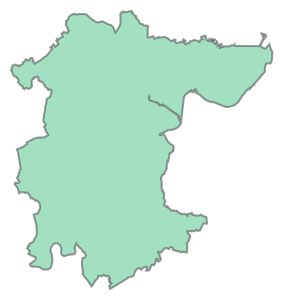

In [407]:
import geopandas as gpd

# Load the GeoDataFrame
shapefile_path = '/Users/user/Documents/GEOG5995-main/LAD_DEC_2021_GB_BGC.shx'
shp = gpd.read_file(shapefile_path)

# Access and display the geometry of index 3
shp.loc[3, 'geometry']

In [408]:
shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  363 non-null    geometry
dtypes: geometry(1)
memory usage: 3.0 KB


In [409]:
import geopandas as gpd
import pandas as pd



# Rename the column in the CSV data to match the column name in the shapefile
merged_data = merged_data.rename(columns={'LAD21CD': 'Area Codes '})

# Merge the data using the common identifier
triple_data2 = fuel_poorE0.merge(merged_data, on='Area Codes ', how='left')

triple_data2.head()


Area Codes  Area names       Unnamed: 2 Unnamed: 3  Nu of households  \
0   E06000047         NaN   County Durham        NaN            239995   
1   E06000005         NaN      Darlington        NaN             50028   
2   E06000001         NaN      Hartlepool        NaN             41885   
3   E06000002         NaN   Middlesbrough        NaN             61626   
4   E06000057         NaN  Northumberland        NaN            150253   

   Nu in fuel poverty  Fuel poor (%)         LAD21NM  mean_epc_change  \
0               35210           14.7   County Durham            2.625   
1                7255           14.5      Darlington            0.948   
2                5993           14.3      Hartlepool            2.253   
3               10244           16.6   Middlesbrough            1.508   
4               20676           13.8  Northumberland            0.499   

   mean_pepc_change  mean_area_change  
0             1.798            -2.427  
1             0.566            -2.002  
2             0.627             1.552  
3             1.484            -6.120  
4             0.858             5.728

In [488]:
triple_data2.tail()

Area Codes  Area names  Unnamed: 2      Unnamed: 3  Nu of households  \
291   E07000079         NaN        NaN        Cotswold             42111   
292   E07000080         NaN        NaN  Forest of Dean             38537   
293   E07000081         NaN        NaN      Gloucester             57445   
294   E07000082         NaN        NaN          Stroud             54209   
295   E07000083         NaN        NaN      Tewkesbury             42457   

     Nu in fuel poverty  Fuel poor (%)         LAD21NM  mean_epc_change  \
291                5303           12.6        Cotswold            0.178   
292                5491           14.2  Forest of Dean           -1.226   
293                6023           10.5      Gloucester            3.135   
294                6196           11.4          Stroud            0.983   
295                3628            8.5      Tewkesbury            4.729   

     mean_pepc_change  mean_area_change  
291             0.171             7.306  
292            -0.249             7.370  
293             1.650            -6.322  
294             0.534             5.892  
295             2.605            -0.217

In [410]:
triple_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Codes          296 non-null    object 
 1   Area names          0 non-null      object 
 2   Unnamed: 2          63 non-null     object 
 3   Unnamed: 3          233 non-null    object 
 4   Nu of households    296 non-null    int64  
 5   Nu in fuel poverty  296 non-null    int64  
 6   Fuel poor (%)       296 non-null    float64
 7   LAD21NM             292 non-null    object 
 8   mean_epc_change     292 non-null    float64
 9   mean_pepc_change    292 non-null    float64
 10  mean_area_change    292 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 25.6+ KB


In [411]:
# Assuming 'df' is your DataFrame
# Use the isna() method to identify rows where 'Fuel poor (%)' is NaN
rows_with_missing_fuel_poor = triple_data2[triple_data2['mean_epc_change'].isna()]

# Print the rows
print(rows_with_missing_fuel_poor)


    Area Codes  Area names                Unnamed: 2 Unnamed: 3  \
16    E06000063         NaN               Cumberland        NaN   
19    E06000064         NaN  Westmorland and Furness        NaN   
51    E06000065         NaN          North Yorkshire        NaN   
277   E06000066         NaN                Somerset         NaN   

     Nu of households  Nu in fuel poverty  Fuel poor (%) LAD21NM  \
16             128063               18711           14.6     NaN   
19             105747               15648           14.8     NaN   
51             281927               43653           15.5     NaN   
277            259265               31883           12.3     NaN   

     mean_epc_change  mean_pepc_change  mean_area_change  
16               NaN               NaN               NaN  
19               NaN               NaN               NaN  
51               NaN               NaN               NaN  
277              NaN               NaN               NaN  


In [412]:
import geopandas as gpd
import pandas as pd



# Rename the column in the CSV data to match the column name in the shapefile
merged_data = merged_data.rename(columns={'LAD21CD': 'Area Codes '})

# Merge the data using the common identifier
triple_data = merged_data.merge(fuel_poor, on='Area Codes ', how='left')

triple_data.head()



Area Codes                LAD21NM  mean_epc_change  mean_pepc_change  \
0   E06000001            Hartlepool            2.253             0.627   
1   E06000002         Middlesbrough            1.508             1.484   
2   E06000003  Redcar and Cleveland            1.542             1.221   
3   E06000004      Stockton-on-Tees            3.574             1.192   
4   E06000005            Darlington            0.948             0.566   

   mean_area_change Area names             Unnamed: 2 Unnamed: 3  \
0             1.552         NaN            Hartlepool        NaN   
1            -6.120         NaN         Middlesbrough        NaN   
2            -3.936         NaN  Redcar and Cleveland        NaN   
3            -3.375         NaN      Stockton-on-Tees        NaN   
4            -2.002         NaN            Darlington        NaN   

   Nu of households  Nu in fuel poverty  Fuel poor (%)  
0           41885.0              5993.0           14.3  
1           61626.0             10244.0           16.6  
2           63059.0              9300.0           14.7  
3           85685.0             10424.0           12.2  
4           50028.0              7255.0           14.5

In [413]:
triple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Codes          309 non-null    object 
 1   LAD21NM             309 non-null    object 
 2   mean_epc_change     309 non-null    float64
 3   mean_pepc_change    309 non-null    float64
 4   mean_area_change    309 non-null    float64
 5   Area names          0 non-null      object 
 6   Unnamed: 2          59 non-null     object 
 7   Unnamed: 3          233 non-null    object 
 8   Nu of households    292 non-null    float64
 9   Nu in fuel poverty  292 non-null    float64
 10  Fuel poor (%)       292 non-null    float64
dtypes: float64(6), object(5)
memory usage: 26.7+ KB


In [414]:
# Identify rows in the original DataFrame that were not merged
deleted_rows = merged_data[~merged_data['Area Codes '].isin(triple_data['Area Codes '])]

# Print the deleted rows
print("Deleted Rows:")
print(deleted_rows)

Deleted Rows:
Empty DataFrame
Columns: [Area Codes , LAD21NM, mean_epc_change, mean_pepc_change, mean_area_change]
Index: []


In [415]:
# Assuming 'df' is your DataFrame
# Use the isna() method to identify rows where 'Fuel poor (%)' is NaN
rows_with_missing_fuel_poor = triple_data[triple_data['Fuel poor (%)'].isna()]

# Print the rows
print(rows_with_missing_fuel_poor)


    Area Codes                     LAD21NM  mean_epc_change  mean_pepc_change  \
64    E07000026                  Allerdale           -0.537             0.152   
65    E07000027          Barrow-in-Furness            0.071            -0.591   
66    E07000028                   Carlisle            1.543             0.238   
67    E07000029                   Copeland           -0.982             0.136   
68    E07000030                       Eden           -4.300            -1.173   
69    E07000031             South Lakeland           -1.972            -1.942   
171   E07000163                     Craven            0.206             0.534   
172   E07000164                  Hambleton           -0.242             0.725   
173   E07000165                  Harrogate           -0.662            -0.853   
174   E07000166              Richmondshire           -1.318            -0.132   
175   E07000167                    Ryedale           -2.811            -1.097   
176   E07000168             

In [416]:
import geopandas as gpd
import pandas as pd

# Load the shapefile into a GeoDataFrame
csv_path = '/Users/user/Documents/GEOG5995-main/fuel_poor.csv'
df1 = pd.read_csv(csv_path)

# Load the CSV data into a DataFrame
csv_path = '/Users/user/Documents/GEOG5995-main/rmepc_laua21_mi.csv'
df2 = pd.read_csv(csv_path)

# Rename the column in the CSV data to match the column name in the shapefile
df2 = df2.rename(columns={'laua21': 'Area Codes '})

# Merge the data using the common identifier
merged_data = df1.merge(df2, on='Area Codes ', how='left')

merged_data.head()



Area Codes  Area names      Unnamed: 2 Unnamed: 3 Nu of households  \
0   E92000001     ENGLAND            NaN        NaN       24,070,861   
1   E12000001  NORTH EAST            NaN        NaN        1,202,496   
2   E06000047         NaN  County Durham        NaN          239,995   
3   E06000005         NaN     Darlington        NaN           50,028   
4   E06000001         NaN     Hartlepool        NaN           41,885   

  Nu in fuel poverty  Fuel poor (%)  mean_epc_change  mean_pepc_change  \
0          3,162,752           13.1              NaN               NaN   
1            168,751           14.0              NaN               NaN   
2             35,210           14.7            2.625             1.798   
3              7,255           14.5            0.948             0.566   
4              5,993           14.3            2.253             0.627   

   mean_area_change  median_epc_change  median_pepc_change  median_area_change  
0               NaN                NaN                 NaN                 NaN  
1               NaN                NaN                 NaN                 NaN  
2            -2.427                2.0                 2.0                1.13  
3            -2.002                1.0                 1.0               -0.97  
4             1.552                2.0                 1.0               -0.52

In [417]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Codes          335 non-null    object 
 1   Area names          10 non-null     object 
 2   Unnamed: 2          92 non-null     object 
 3   Unnamed: 3          233 non-null    object 
 4   Nu of households    335 non-null    object 
 5   Nu in fuel poverty  335 non-null    object 
 6   Fuel poor (%)       335 non-null    float64
 7   mean_epc_change     292 non-null    float64
 8   mean_pepc_change    292 non-null    float64
 9   mean_area_change    292 non-null    float64
 10  median_epc_change   292 non-null    float64
 11  median_pepc_change  292 non-null    float64
 12  median_area_change  292 non-null    float64
dtypes: float64(7), object(6)
memory usage: 34.2+ KB


In [418]:
# Identify rows in the original DataFrame that were not merged
deleted_rows = merged_data[~merged_data['Area Codes '].isin(triple_data['Area Codes '])]

# Print the deleted rows
print("Deleted Rows:")
print(deleted_rows)

Deleted Rows:
    Area Codes                Area names                        Unnamed: 2  \
0     E92000001                   ENGLAND                              NaN   
1     E12000001                NORTH EAST                              NaN   
9     E11000007                       NaN       Tyne and Wear (Met County)   
15    E12000002               NORTH WEST                               NaN   
20    E06000063                       NaN                       Cumberland   
23    E06000064                       NaN          Westmorland and Furness   
24    E11000001                       NaN  Greater Manchester (Met County)   
35    E10000017                       NaN                       Lancashire   
48    E11000002                       NaN          Merseyside (Met County)   
54    E12000003  YORKSHIRE AND THE HUMBER                              NaN   
59    E06000065                       NaN                  North Yorkshire   
61    E11000003                       NaN     Sout

In [419]:
import geopandas as gpd
import pandas as pd

# Load the shapefile into a GeoDataFrame
csv_path = '/Users/user/Documents/GEOG5995-main/fuel_poor.csv'
df1 = pd.read_csv(csv_path)

# Load the CSV data into a DataFrame
csv_path = '/Users/user/Documents/GEOG5995-main/rmepc_laua21_mi.csv'
df2 = pd.read_csv(csv_path)

# Rename the column in the CSV data to match the column name in the shapefile
df2 = df2.rename(columns={'laua21': 'Area Codes '})

# Merge the data using the common identifier
merged_data = df2.merge(df1, on='Area Codes ', how='left')

merged_data.head()

Area Codes   mean_epc_change  mean_pepc_change  mean_area_change  \
0   E06000001            2.253             0.627             1.552   
1   E06000002            1.508             1.484            -6.120   
2   E06000003            1.542             1.221            -3.936   
3   E06000004            3.574             1.192            -3.375   
4   E06000005            0.948             0.566            -2.002   

   median_epc_change  median_pepc_change  median_area_change Area names   \
0                  2                   1               -0.52         NaN   
1                  1                   1               -2.39         NaN   
2                  1                   1               -0.92         NaN   
3                  3                   1                1.00         NaN   
4                  1                   1               -0.97         NaN   

             Unnamed: 2 Unnamed: 3 Nu of households Nu in fuel poverty  \
0            Hartlepool        NaN           41,885              5,993   
1         Middlesbrough        NaN           61,626             10,244   
2  Redcar and Cleveland        NaN           63,059              9,300   
3      Stockton-on-Tees        NaN           85,685             10,424   
4            Darlington        NaN           50,028              7,255   

   Fuel poor (%)  
0           14.3  
1           16.6  
2           14.7  
3           12.2  
4           14.5

In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Codes          363 non-null    object 
 1   mean_epc_change     363 non-null    float64
 2   mean_pepc_change    363 non-null    float64
 3   mean_area_change    363 non-null    float64
 4   median_epc_change   363 non-null    int64  
 5   median_pepc_change  363 non-null    int64  
 6   median_area_change  363 non-null    float64
 7   Area names          0 non-null      object 
 8   Unnamed: 2          59 non-null     object 
 9   Unnamed: 3          233 non-null    object 
 10  Nu of households    292 non-null    object 
 11  Nu in fuel poverty  292 non-null    object 
 12  Fuel poor (%)       292 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 37.0+ KB


In [32]:
missing_Fuel_poor = triple_data[triple_data['Fuel poor (%)'].isna()]
print(missing_Fuel_poor)

     OBJECTID Area Codes             LAD21NM        LAD21NMW   BNG_E   BNG_N  \
64         65   E07000026          Allerdale                  317520  532997   
65         66   E07000027  Barrow-in-Furness                  321741  474165   
66         67   E07000028           Carlisle                  348576  565154   
67         68   E07000029           Copeland                  310871  508739   
68         69   E07000030               Eden                  359636  526396   
..        ...         ...                ...             ...     ...     ...   
358       359   W06000020            Torfaen         Torfaen  327459  200480   
359       360   W06000021      Monmouthshire       Sir Fynwy  337812  209231   
360       361   W06000022            Newport       Casnewydd  337897  187432   
361       362   W06000023              Powys           Powys  302329  273255   
362       363   W06000024     Merthyr Tydfil  Merthyr Tudful  305916  206424   

        LONG       LAT                 

In [21]:
missing_Fuel_poor = merged_data[merged_data['Fuel poor (%)'].isna()]
print(missing_Fuel_poor)

    Area Codes   mean_epc_change  mean_pepc_change  mean_area_change  \
64    E07000026           -0.537             0.152             4.570   
65    E07000027            0.071            -0.591            -6.717   
66    E07000028            1.543             0.238            -0.129   
67    E07000029           -0.982             0.136             5.607   
68    E07000030           -4.300            -1.173            13.922   
..          ...              ...               ...               ...   
358   W06000020            3.183             1.804            -5.793   
359   W06000021            2.710             0.969             7.375   
360   W06000022            3.400             1.379            -0.114   
361   W06000023           -3.100            -0.366             9.190   
362   W06000024            2.141             1.281            -1.925   

     median_epc_change  median_pepc_change  median_area_change Area names   \
64                   0                   0               

In [22]:
# Check how many entries start with the letter 'E'
count_starts_with_n = rmepc['laua21'].str.startswith('N').sum()

# Print the count
print(f"Number of entries starting with 'N': {count_starts_with_n}")

Number of entries starting with 'N': 0


In [23]:
import pandas as pd

# Create a DataFrame with a 'laua21' column
rempc = pd.DataFrame({'laua21'})

# Check how many entries in the 'laua21' column start with the letter 'E'
count_starts_with_e = rempc['laua21'].str.startswith('E').sum()

# Print the count
print(f"Number of entries in 'laua21' starting with 'E': {count_starts_with_e}")


KeyError: 'laua21'

In [24]:
# Count how many entries in the 'laua21' column start with the letter 'E'
count_starts_with_e = (rempc['laua21'].str.startswith('E')).sum()

# Print the count
print(f"Number of entries in 'laua21' starting with 'E': {count_starts_with_e}")

KeyError: 'laua21'

In [25]:
# Check how many entries start with the letter 'E'
count_starts_with_e = rmepc['laua21'].str.startswith('E').sum()

# Print the count
print(f"Number of entries starting with 'E': {count_starts_with_e}")

Number of entries starting with 'E': 309


In [26]:
# Check how many entries start with the letter 'E'
count_starts_with_w = rmepc['laua21'].str.startswith('W').sum()

# Print the count
print(f"Number of entries starting with 'W': {count_starts_with_w}")

Number of entries starting with 'W': 22


In [27]:
# Check how many entries start with the letter 'E'
count_starts_with_s = rmepc['laua21'].str.startswith('S').sum()

# Print the count
print(f"Number of entries starting with 'S': {count_starts_with_s}")

Number of entries starting with 'S': 32


In [28]:
# Get unique starting letters
unique_starting_letters = rempc['laua21'].str[0].unique()

# Count entries for each unique starting letter
for letter in unique_starting_letters:
    count_for_letter = (rempc['laua21'].str.startswith(letter)).sum()
    print(f"Number of entries starting with '{letter}': {count_for_letter}")

KeyError: 'laua21'

In [29]:
import pandas as pd

# Your existing DataFrame with 'laua21' column
rempc = pd.DataFrame('laua21')

# Drop missing values in the 'laua21' column
rempc_cleaned = rempc.dropna(subset=['laua21'])

# Get unique starting letters
unique_starting_letters = rempc_cleaned['laua21'].str[0].unique()

# Count entries for each unique starting letter
for letter in unique_starting_letters:
    count_for_letter = (rempc_cleaned['laua21'].str.startswith(letter)).sum()
    print(f"Number of entries starting with '{letter}': {count_for_letter}")

ValueError: DataFrame constructor not properly called!

In [30]:
import pandas as pd

# Your existing DataFrame with 'laua21' column
rempc = pd.DataFrame('laua21')

# Drop missing values in the 'laua21' column
rempc_cleaned = rempc.dropna(subset=['laua21'])

# Drop None values in the 'laua21' column
rempc_cleaned = rempc_cleaned[rempc_cleaned['laua21'].notna()]

# Get unique starting letters
unique_starting_letters = rempc_cleaned['laua21'].str[0].unique()

# Count entries for each unique starting letter
for letter in unique_starting_letters:
    count_for_letter = (rempc_cleaned['laua21'].str.startswith(letter)).sum()
    print(f"Number of entries starting with '{letter}': {count_for_letter}")

ValueError: DataFrame constructor not properly called!

In [31]:
import geopandas as gpd

# Specify the path to your shapefile (without the file extension .shp)
shapefile_path = '/Users/user/Documents/GEOG5995-main/infuse_dist_lyr_2011'

try:
    # Read in the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Display the first few rows of the GeoDataFrame
    print(gdf.head())

    print("Shapefile has been successfully loaded into the GeoDataFrame 'gdf'.")
except FileNotFoundError:
    print("Shapefile not found. Please make sure the file exists at the specified path.")

    geo_code          geo_label          geo_labelw               label  \
0  W06000016  Rhondda Cynon Taf   Rhondda Cynon Taf  W92000004W06000016   
1  S12000013        Eilean Siar                None  S92000003S12000013   
2  W06000013           Bridgend  Pen-y-bont ar Ogwr  W92000004W06000013   
3  E07000138            Lincoln                None  E92000001E07000138   
4  E07000166      Richmondshire                None  E92000001E07000166   

                name                                           geometry  
0  Rhondda Cynon Taf  POLYGON ((291902.500 196289.607, 291899.094 19...  
1        Eilean Siar  MULTIPOLYGON (((138021.500 955416.200, 138026....  
2           Bridgend  POLYGON ((280647.356 182792.750, 280647.402 18...  
3            Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4      Richmondshire  POLYGON ((392540.053 507436.934, 392689.000 50...  
Shapefile has been successfully loaded into the GeoDataFrame 'gdf'.


In [32]:
gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    404 non-null    object  
 1   geo_label   404 non-null    object  
 2   geo_labelw  22 non-null     object  
 3   label       404 non-null    object  
 4   name        404 non-null    object  
 5   geometry    404 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 19.1+ KB


In [33]:
gdf.dtypes

geo_code        object
geo_label       object
geo_labelw      object
label           object
name            object
geometry      geometry
dtype: object

### Data Exploration
Just as we have done before we are goign to explore the data by having a look at the dataframes and by visualising both the data sets.

Note that the dataframe has two columns:
- 'name' naming the city
- 'geometry' listing the type of geometry, in this case POINT. And two numbers - the coordiantes of the point.

## Simple spatial data visualisation
### Point data

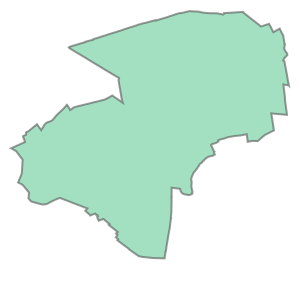

In [34]:
import geopandas as gpd

# Load the GeoDataFrame
shapefile_path = '/Users/user/Documents/GEOG5995-main/infuse_dist_lyr_2011'
gdf = gpd.read_file(shapefile_path)

# Access and display the geometry of index 3
gdf.loc[3, 'geometry']

In [36]:
# Specify the path to your shapefile (without the file extension .shp)
shapefile_path = '/Users/user/Documents/GEOG5995-main/infuse_dist_lyr_2011'

try:
# Read in the shapefile
    gdf = gpd.read_file(shapefile_path)
    f,ax = plt.subplots(1, figsize=(16,8))
    gdf.plot(ax=ax, column ='geo_code', categorical=True, legend=True)
    plt.show()


SyntaxError: incomplete input (876389907.py, line 9)

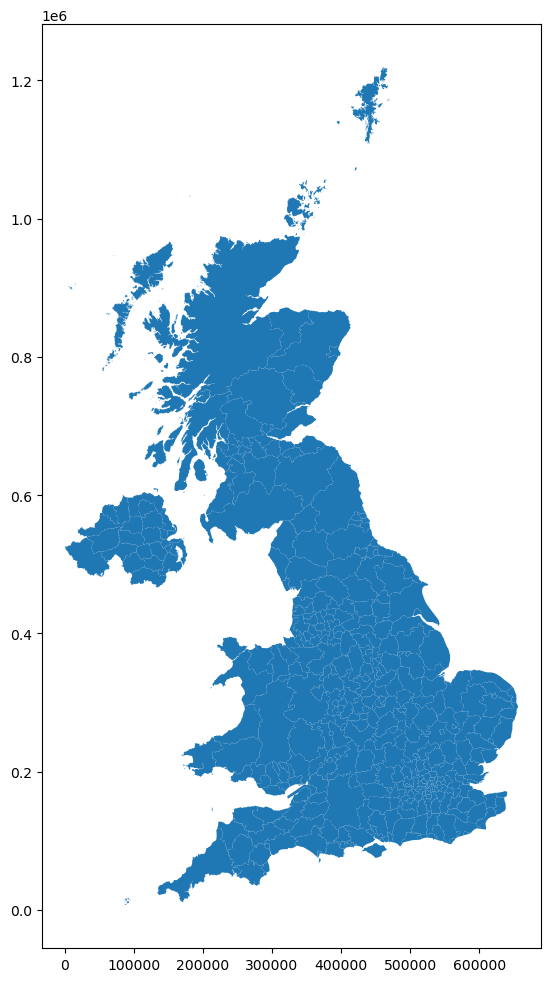

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Specify the path to your shapefile (without the file extension .shp)
shapefile_path = '/Users/user/Documents/GEOG5995-main/infuse_dist_lyr_2011'

try:
    # Read in the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Create a plot
    f, ax = plt.subplots(1, figsize=(16, 12))

    # Check if 'geo_code' is a categorical column
    if 'geo_code' in gdf.columns and gdf['geo_code'].dtype.name == 'category':
        gdf.plot(ax=ax, column='geo_code', categorical=True, legend=True)
    else:
        # If 'geo_code' is not categorical, you may want to use a different column or remove categorical=True
        gdf.plot(ax=ax, legend=True)

    plt.show()
except FileNotFoundError:
    print("Shapefile not found. Please make sure the file exists at the specified path.")

In [30]:
import geopandas as gpd
import pandas as pd

# Load the shapefile into a GeoDataFrame
shapefile_path = '/Users/user/Documents/GEOG5995-main/infuse_dist_lyr_2011'
gdf = gpd.read_file(shapefile_path)

# Load the CSV data into a DataFrame
csv_path = '/Users/user/Documents/GEOG5995-main/rmepc_laua21_mi.csv'
df = pd.read_csv(csv_path)

# Rename the column in the CSV data to match the column name in the shapefile
df = df.rename(columns={'laua21': 'geo_code'})

# Merge the data using the common identifier
merged_data = df.merge(gdf, on='geo_code', how='left')

merged_data.head()

geo_code  mean_epc_change  mean_pepc_change  mean_area_change  \
0  E06000001            2.253             0.627             1.552   
1  E06000002            1.508             1.484            -6.120   
2  E06000003            1.542             1.221            -3.936   
3  E06000004            3.574             1.192            -3.375   
4  E06000005            0.948             0.566            -2.002   

   median_epc_change  median_pepc_change  median_area_change  \
0                  2                   1               -0.52   
1                  1                   1               -2.39   
2                  1                   1               -0.92   
3                  3                   1                1.00   
4                  1                   1               -0.97   

              geo_label geo_labelw               label                  name  \
0            Hartlepool       None  E92000001E06000001            Hartlepool   
1         Middlesbrough       None  E92000001E06000002         Middlesbrough   
2  Redcar and Cleveland       None  E92000001E06000003  Redcar and Cleveland   
3      Stockton-on-Tees       None  E92000001E06000004      Stockton-on-Tees   
4            Darlington       None  E92000001E06000005            Darlington   

                                            geometry  
0  POLYGON ((444343.908 533776.375, 444325.406 53...  
1  POLYGON ((447253.120 517984.866, 447261.028 51...  
2  POLYGON ((452672.729 520022.390, 452671.063 52...  
3  POLYGON ((438392.691 522207.088, 438392.094 52...  
4  POLYGON ((423801.813 514513.500, 423780.596 51...

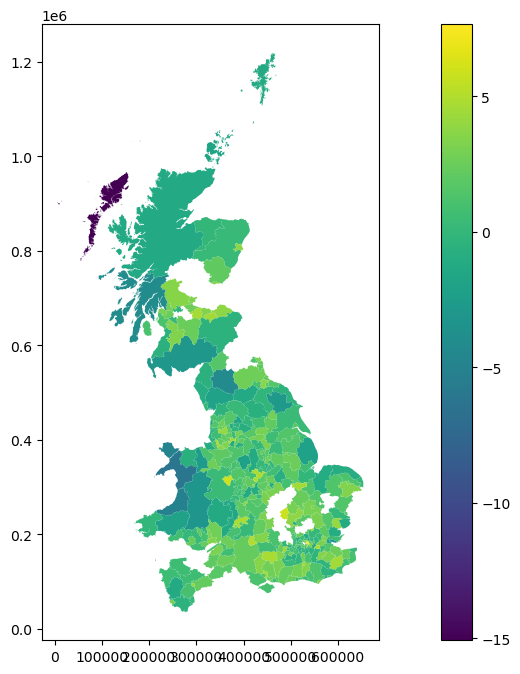

In [37]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
merged_data.plot(ax=ax, column ='mean_epc_change', legend=True)
# show the map
plt.show()

In [31]:
import geopandas as gpd
import pandas as pd

# Load the shapefile into a GeoDataFrame
shapefile_path = '/Users/user/Documents/GEOG5995-main/infuse_dist_lyr_2011'
gdf = gpd.read_file(shapefile_path)

# Load the CSV data into a DataFrame
csv_path = '/Users/user/Documents/GEOG5995-main/rmepc_laua21_mi.csv'
df = pd.read_csv(csv_path)

# Rename the column in the CSV data to match the column name in the shapefile
df = df.rename(columns={'laua21': 'geo_code'})

# Merge the data using the common identifier
merged_data = gdf.merge(df, on='geo_code', how='left')

merged_data.head()

geo_code          geo_label          geo_labelw               label  \
0  W06000016  Rhondda Cynon Taf   Rhondda Cynon Taf  W92000004W06000016   
1  S12000013        Eilean Siar                None  S92000003S12000013   
2  W06000013           Bridgend  Pen-y-bont ar Ogwr  W92000004W06000013   
3  E07000138            Lincoln                None  E92000001E07000138   
4  E07000166      Richmondshire                None  E92000001E07000166   

                name                                           geometry  \
0  Rhondda Cynon Taf  POLYGON ((291902.500 196289.607, 291899.094 19...   
1        Eilean Siar  MULTIPOLYGON (((138021.500 955416.200, 138026....   
2           Bridgend  POLYGON ((280647.356 182792.750, 280647.402 18...   
3            Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...   
4      Richmondshire  POLYGON ((392540.053 507436.934, 392689.000 50...   

   mean_epc_change  mean_pepc_change  mean_area_change  median_epc_change  \
0            0.219             1.390            -5.468                0.0   
1          -15.077             5.580            13.731              -15.0   
2            2.366             2.156             0.797                2.0   
3            1.366             0.148           -10.685                1.0   
4           -1.318            -0.132             8.749                0.0   

   median_pepc_change  median_area_change  
0                 1.0                -1.0  
1                 7.0                15.0  
2                 2.0                 1.0  
3                 0.0                -6.0  
4                 0.0                 4.0

In [32]:
merged_data.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geo_code            404 non-null    object  
 1   geo_label           404 non-null    object  
 2   geo_labelw          22 non-null     object  
 3   label               404 non-null    object  
 4   name                404 non-null    object  
 5   geometry            404 non-null    geometry
 6   mean_epc_change     341 non-null    float64 
 7   mean_pepc_change    341 non-null    float64 
 8   mean_area_change    341 non-null    float64 
 9   median_epc_change   341 non-null    float64 
 10  median_pepc_change  341 non-null    float64 
 11  median_area_change  341 non-null    float64 
dtypes: float64(6), geometry(1), object(5)
memory usage: 38.0+ KB


In [33]:
missing_mean_epc_change = merged_data[merged_data['label'].isna()]
print(missing_mean_epc_change)

Empty GeoDataFrame
Columns: [geo_code, geo_label, geo_labelw, label, name, geometry, mean_epc_change, mean_pepc_change, mean_area_change, median_epc_change, median_pepc_change, median_area_change]
Index: []


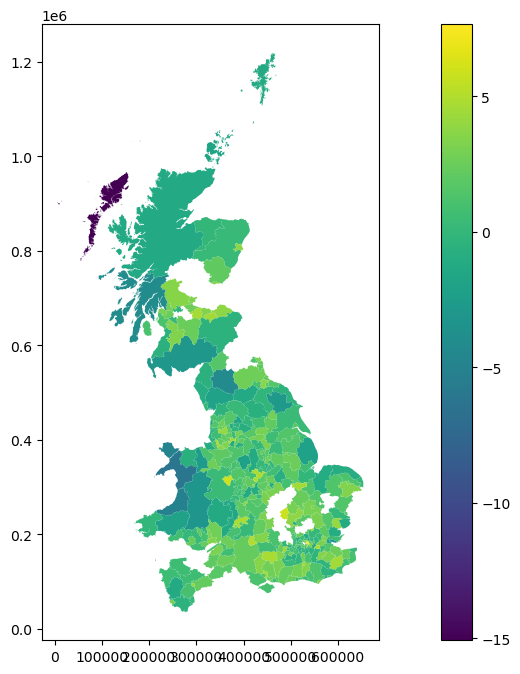

In [34]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
merged_data.plot(ax=ax, column ='mean_epc_change', legend=True)
# show the map
plt.show()

In [35]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geo_code            404 non-null    object  
 1   geo_label           404 non-null    object  
 2   geo_labelw          22 non-null     object  
 3   label               404 non-null    object  
 4   name                404 non-null    object  
 5   geometry            404 non-null    geometry
 6   mean_epc_change     341 non-null    float64 
 7   mean_pepc_change    341 non-null    float64 
 8   mean_area_change    341 non-null    float64 
 9   median_epc_change   341 non-null    float64 
 10  median_pepc_change  341 non-null    float64 
 11  median_area_change  341 non-null    float64 
dtypes: float64(6), geometry(1), object(5)
memory usage: 38.0+ KB


In [36]:
missing_mean_epc_change = merged_data[merged_data['mean_epc_change'].isna()]
print(missing_mean_epc_change)

      geo_code           geo_label geo_labelw               label  \
6         95JJ           Coleraine       None       N9200000295JJ   
16        95DD           Ballymena       None       N9200000295DD   
17   E07000097  East Hertfordshire       None  E92000001E07000097   
25   S12000046        Glasgow City       None  S92000003S12000046   
41        95FF           Banbridge       None       N9200000295FF   
..         ...                 ...        ...                 ...   
371  E07000100           St Albans       None  E92000001E07000100   
381  E06000028         Bournemouth       None  E92000001E06000028   
394  E07000154         Northampton       None  E92000001E07000154   
399  E07000049         East Dorset       None  E92000001E07000049   
402  S12000024     Perth & Kinross       None  S92000003S12000024   

                   name                                           geometry  \
6             Coleraine  POLYGON ((100105.386 598409.454, 100105.386 59...   
16            B

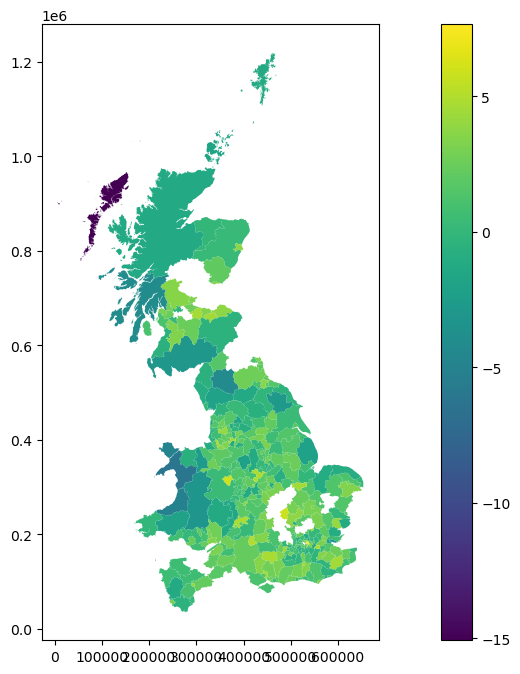

In [68]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
merged_data.plot(ax=ax, column ='mean_epc_change', legend=True)
# show the map
plt.show()

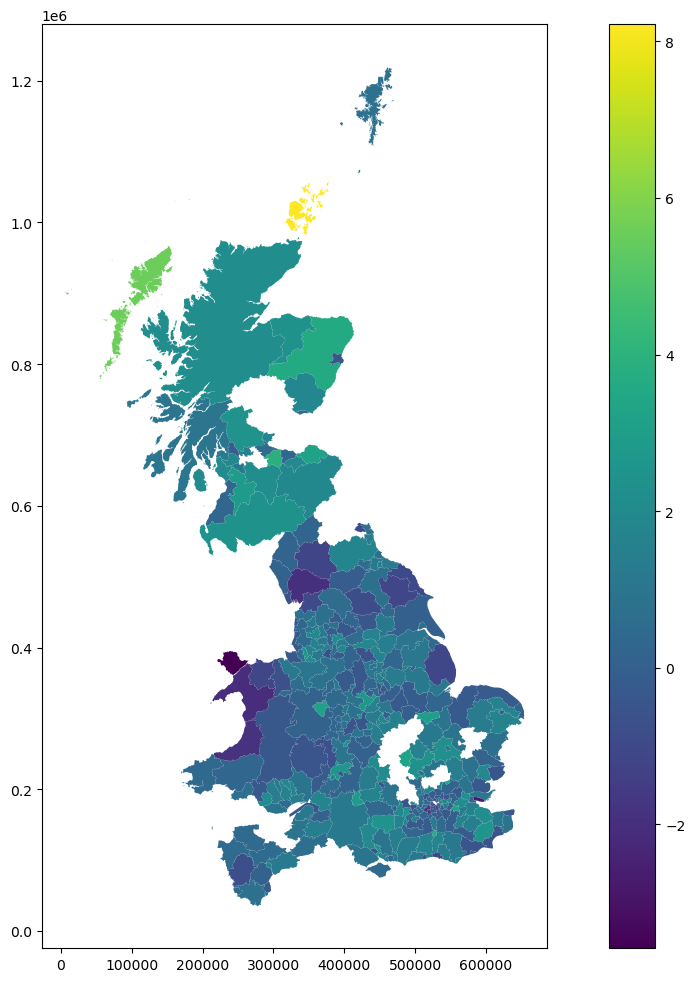

In [69]:
fig, ax = plt.subplots(1, figsize=(16, 12))  # Adjust the figsize to set the desired width and height
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend = True)
# vmin
merged_data.plot(ax=ax, column='mean_pepc_change', legend=True)
# Show the map
plt.show()

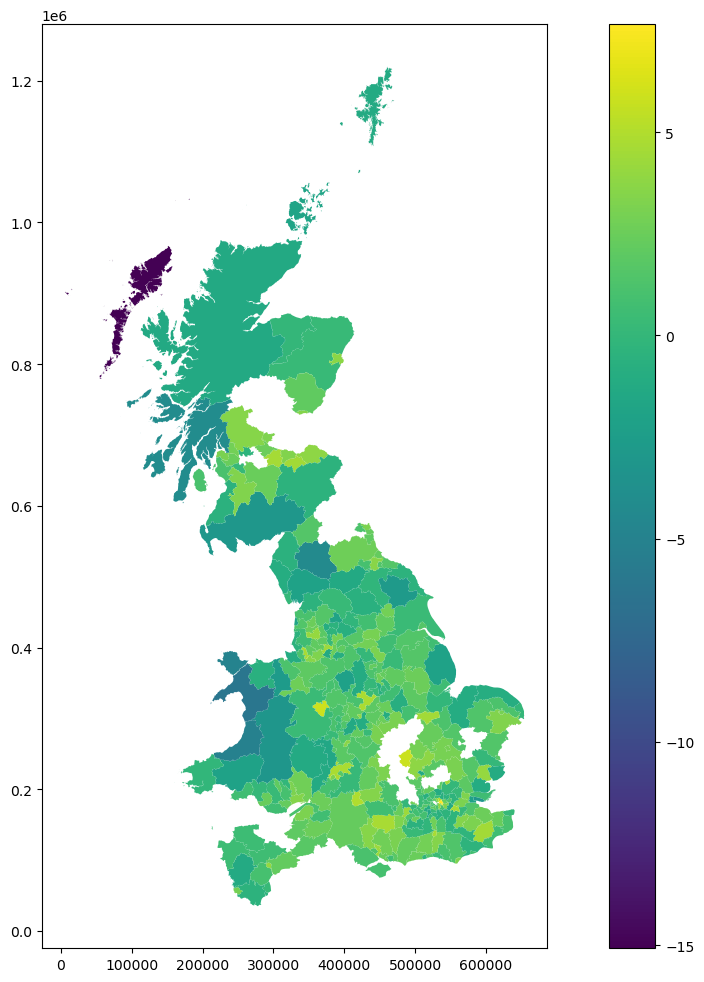

In [70]:
fig, ax = plt.subplots(1, figsize=(16, 12))  # Adjust the figsize to set the desired width and height
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend = True)
# vmin
merged_data.plot(ax=ax, column='mean_epc_change', legend=True)
# Show the map
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 12))  # Adjust the figsize to set the desired width and height
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend = True)
# vmin
merged_data.plot(ax=ax, column='mean_epc_change', legend=True)
# Show the map
plt.show()

Now we will do the same for the countries dataframe.

### Polygon data

In [12]:
# Explore the countries dataframe
countries.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<b>Note</b> the geometry column this time is made up of POLYGON data, made up of many coordiante points. <br>
Let us have a closer look at the polygon geometry. We are going to look at the geometry of row 1.

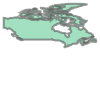

In [13]:
# Lets look at index 3 (for me it is Canada) of the geometry column
# Notice the shape is quite complex with lots of edges
countries.loc[3,'geometry']

In [14]:
# let us look at the list of coordiantes
print(countries.loc[3,'geometry'])
# Each point is a corner of the country

MULTIPOLYGON (((-122.84000000000003 49.000000000000114, -122.97421000000001 49.00253777777778, -124.91024 49.98456, -125.62461 50.416560000000004, -127.43561000000001 50.83061, -127.99276 51.71583, -127.85032 52.32961, -129.12979 52.75538, -129.30523 53.561589999999995, -130.51497 54.28757, -130.53610895273684 54.80275447679924, -130.53611 54.802780000000006, -129.98 55.285000000000004, -130.00778000000003 55.915830000000085, -131.70781 56.55212, -132.73042 57.692890000000006, -133.35556000000003 58.41028000000001, -134.27111000000002 58.86111000000005, -134.94500000000005 59.2705600000001, -135.47583 59.787780000000005, -136.47972000000004 59.46389000000005, -137.4525 58.905, -138.34089 59.562110000000004, -139.03900000000002 60, -140.013 60.27682000000001, -140.99778 60.30639000000001, -140.9925 66.00003000000001, -140.986 69.712, -140.98598761037601 69.71199839952635, -139.12052 69.47102, -137.54636000000002 68.99002, -136.50358 68.89804, -135.62576 69.31512000000001, -134.414640000

### Now let's plot all the countries

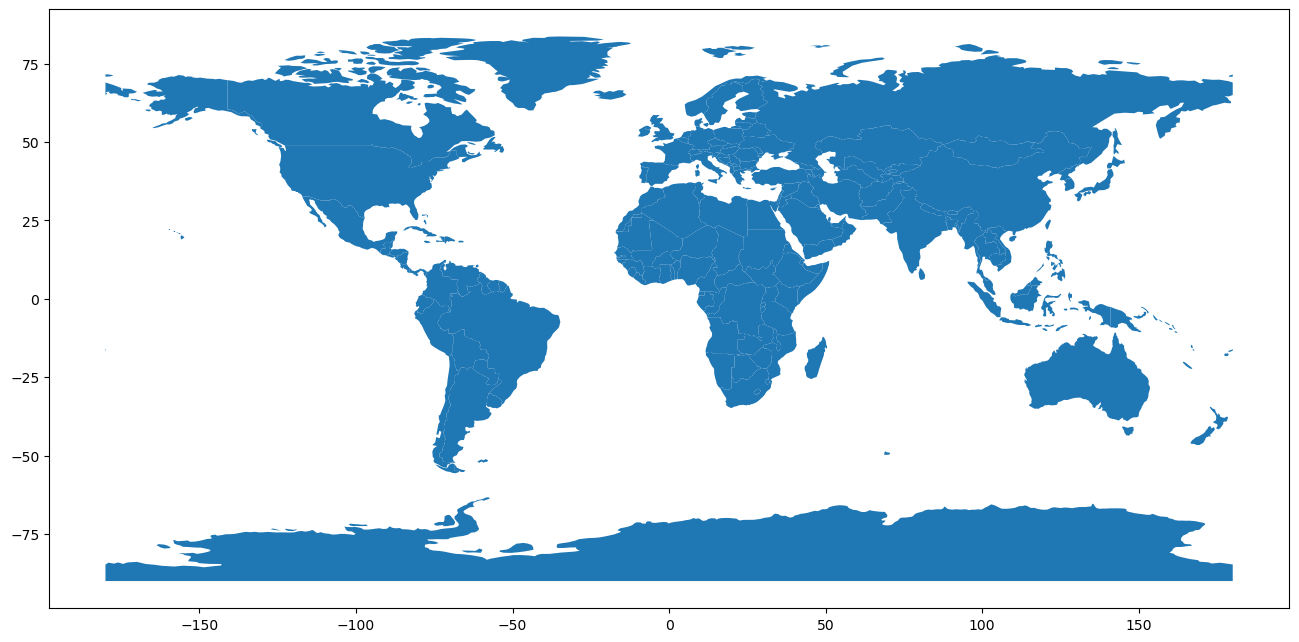

In [15]:
f,ax = plt.subplots(1, figsize=(16, 8))
countries.plot(ax=ax)
plt.show()

### geopandas.explore()

<code>gpd.explore()</code> is a really useful function that generate an interactive leaflet map based on GeoDataFrame. It is particulalry useful for inital data exploration. the function creates:
- a navigatable map
- with 'zoom in and out' functionality
- and hover over function displaying the variables in the GeoDataFrame

The <code>.explore()</code> has many customisabel parameters, see the [package documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html)

In [16]:
cities.explore()

NameError: name 'cities' is not defined

In [39]:
countries.explore()

## Coordinate Reference Systems (CRS)
Before we map multiple layers we need to check they have the same Coordinate Reference System (CRS). Using the <code>.crs</code> function

In [40]:
cities.crs

NameError: name 'cities' is not defined

Look at what happens when we change the projection

In [41]:
# NAD83 Canadian Spatial Reference System: Large and medium scale topographic mapping and engineering survey.
countries_new_proj= countries.to_crs(epsg=2953)

# EPSG:3851 New Zealand Geodetic Datum 2000: Spatial referencing and conformal mapping on the NZ continental shelf.
countries_new_proj2= countries.to_crs(epsg=3851)

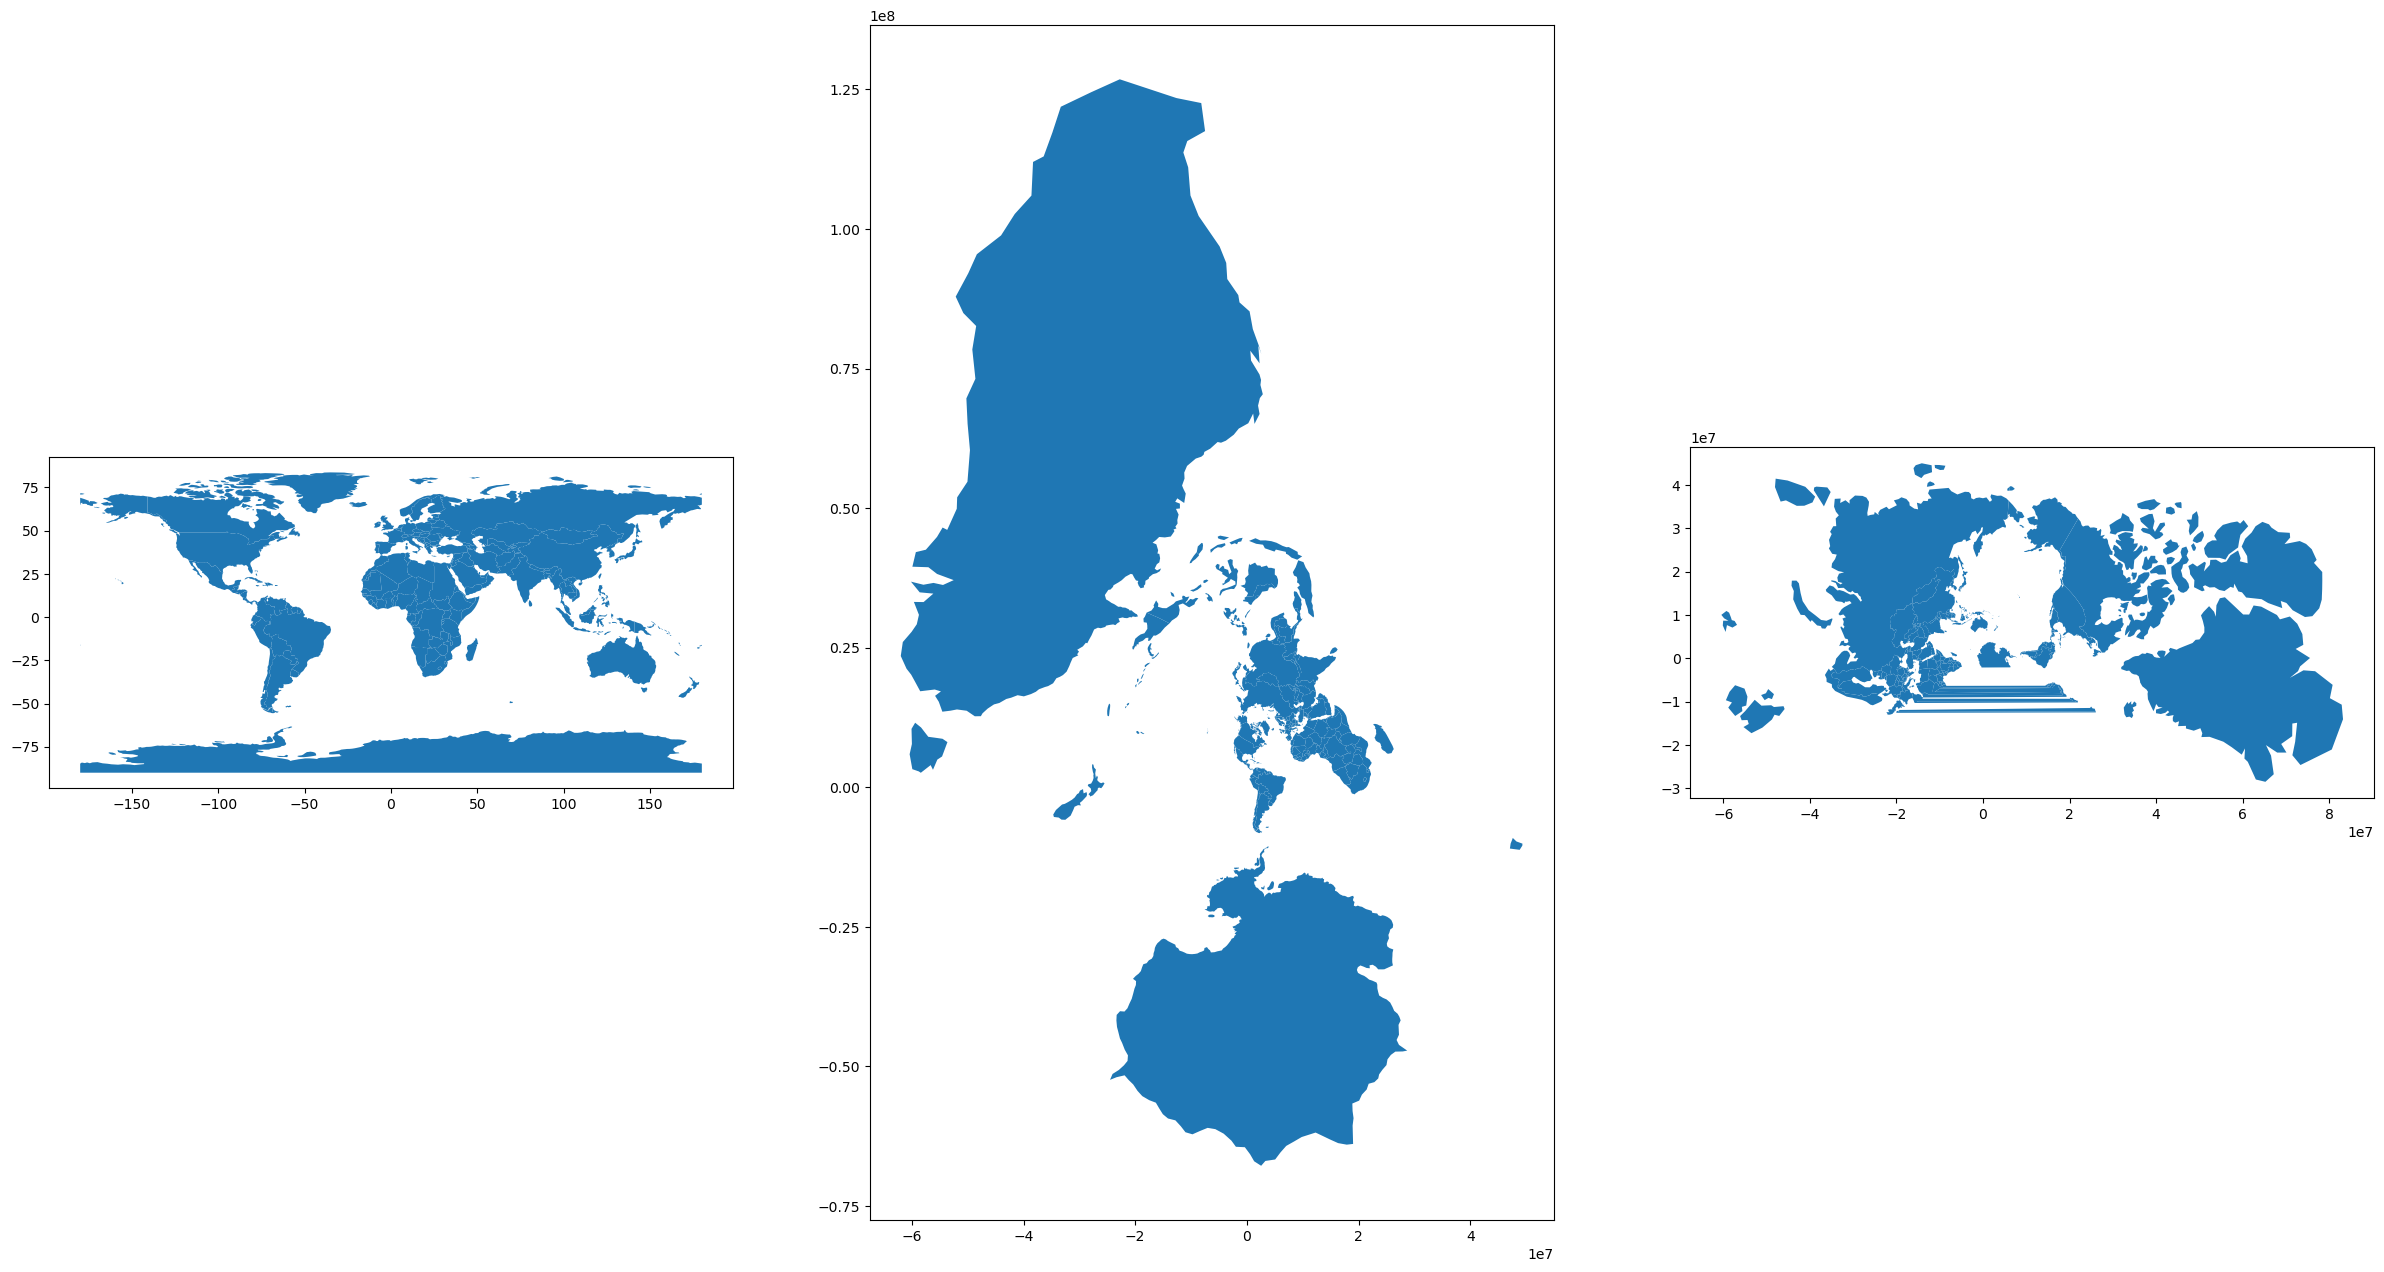

In [42]:
# plot the two diifferent projections
f, ax = plt.subplots(1,3, figsize=(30, 20))
countries.plot(ax=ax[0])
countries_new_proj.plot(ax=ax[1])
countries_new_proj2.plot(ax=ax[2])
plt.show()
# Note the different scales on the axis and orrientation of the countries

## Layering maps
Much like other mapping software it is possible to layer maps in Python. We will plot the cities on top of the countires dataset.

We need to check the CRS of both datasets is the same so we can accurately plot the layers on top of each other

In [43]:
# Check the CRS are the same
print(cities.crs, countries.crs)

NameError: name 'cities' is not defined

## Plot the cities and countries together

NameError: name 'cities' is not defined

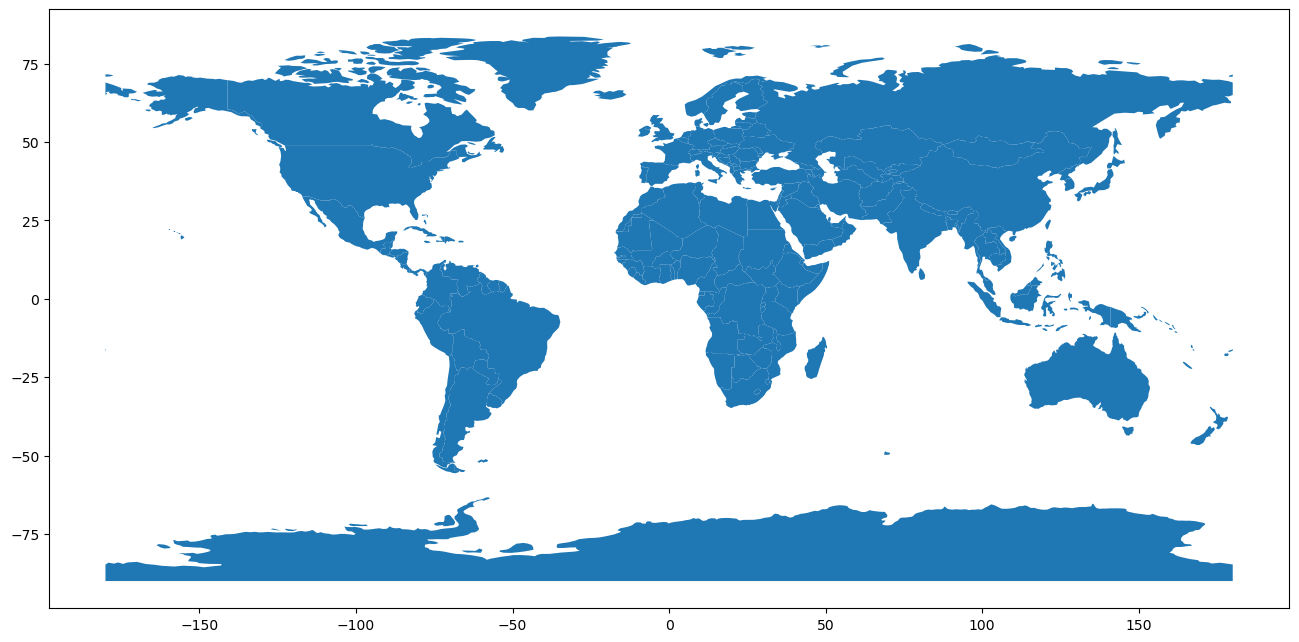

In [44]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# show the map
plt.show()

## Choropleth Mapping
Choropleth maps are maps where the polygons are coloured differenet shades or colours based on a value. E.g. Populaiton

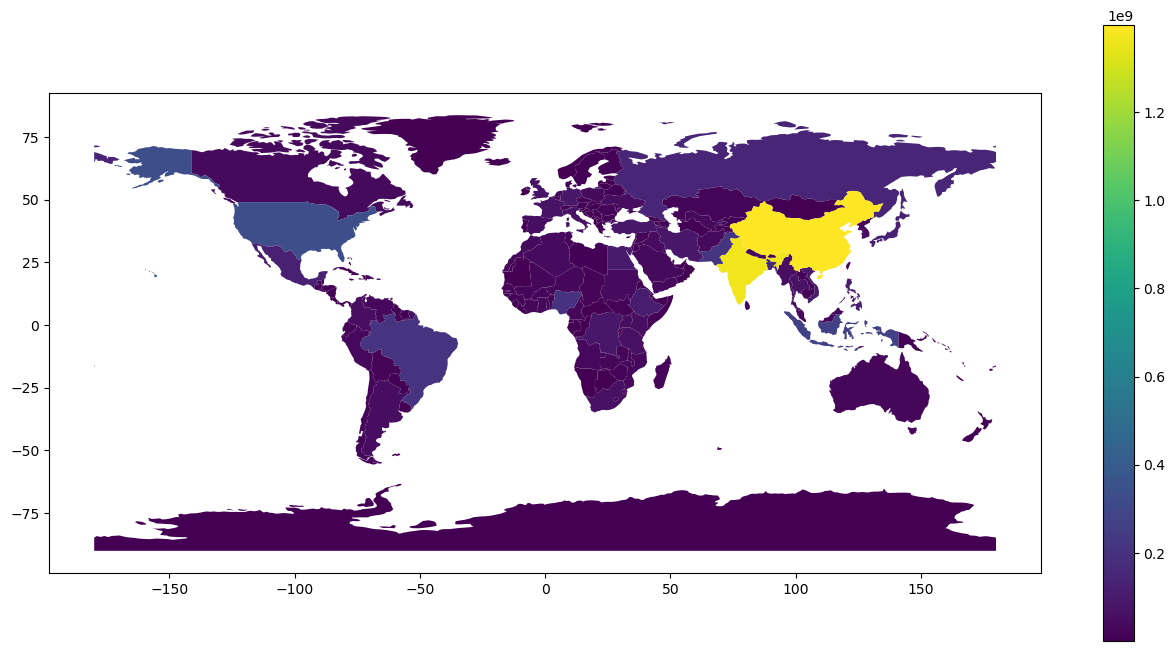

In [45]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
countries.plot(ax=ax, column ='pop_est', legend=True)
# show the map
plt.show()

<font color= 'orchid'> <b>Code your own choropleth map for 'gdp_mp_est'<b></font><br>
    Answer at the end of the workbook

In [46]:
# code your choropleth map here!

### Plotting Categorical variables
It is possible to create choropleth maps with categorical variables. To do this we specify <code> categorical=True,</code> withn the <code>plot()</code> function.<br> If we treat the continent of the country as a categorical variable we can colour the countries based on the continent they are in.<br>

Note the legend of the map is now separate colours and not a continuous colour bar 

<font color ='orchid'> <b> Run the code below to plot a categorical chloropleth </font>

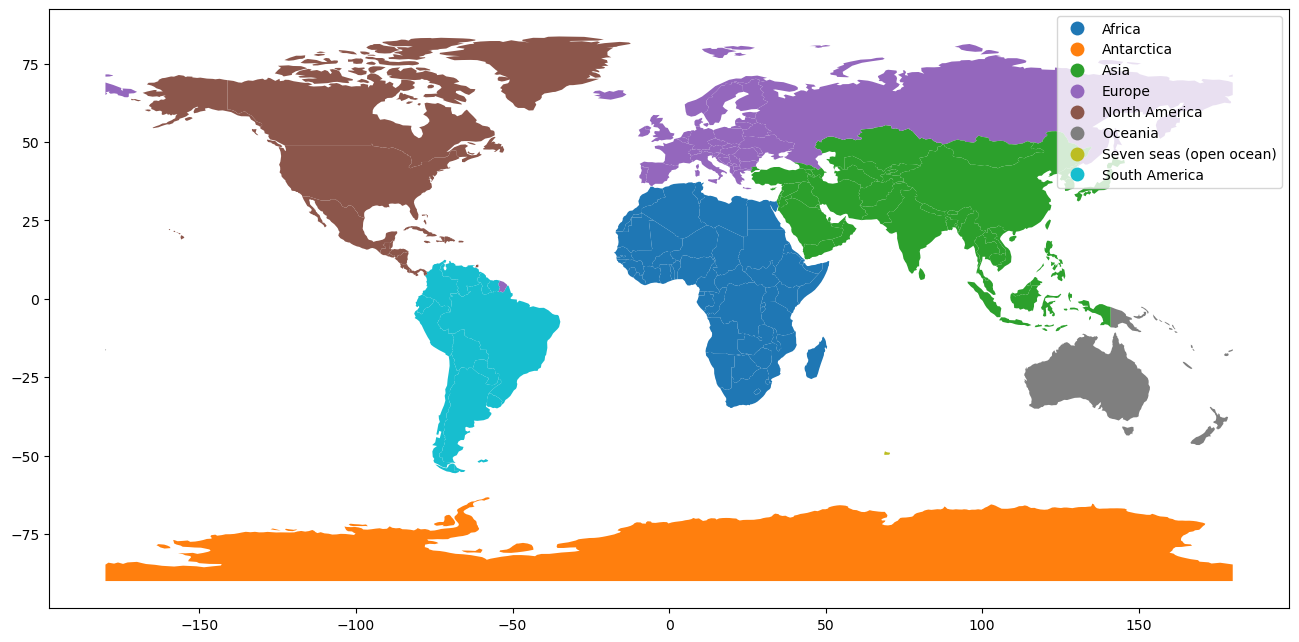

In [47]:
f,ax = plt.subplots(1, figsize=(16,8))
countries.plot(ax=ax, column ='continent', categorical=True, legend=True)
plt.show();

## Subsetting spatial data
We can also work with and plot just a subset of the spatial data. For example we might only be interested in Africa. In which case we can use the <code>.loc[]</code> fucntion to locate all rows (countries) where the continent is Africe. Just like we would normally do in a non-spatial pandas dataframe.<br>

<font color ='orchid'> <b>Run the code below </font>

In [48]:
# locate countries (rows) in Africa
africa= countries.loc[countries['continent']=='Africa']
# view the newly created Africa dataframe
africa

pop_est continent                  name iso_a3  gdp_md_est  \
1     58005463.0    Africa              Tanzania    TZA       63177   
2       603253.0    Africa             W. Sahara    ESH         907   
11    86790567.0    Africa       Dem. Rep. Congo    COD       50400   
12    10192317.3    Africa               Somalia    SOM        4719   
13    52573973.0    Africa                 Kenya    KEN       95503   
14    42813238.0    Africa                 Sudan    SDN       30513   
15    15946876.0    Africa                  Chad    TCD       11314   
25    58558270.0    Africa          South Africa    ZAF      351431   
26     2125268.0    Africa               Lesotho    LSO        2376   
48    14645468.0    Africa              Zimbabwe    ZWE       21440   
49     2303697.0    Africa              Botswana    BWA       18340   
50     2494530.0    Africa               Namibia    NAM       12366   
51    16296364.0    Africa               Senegal    SEN       23578   
52    19658031.0    Africa                  Mali    MLI       17279   
53     4525696.0    Africa            Mauritania    MRT        7600   
54    11801151.0    Africa                 Benin    BEN       14390   
55    23310715.0    Africa                 Niger    NER       12911   
56   200963599.0    Africa               Nigeria    NGA      448120   
57    25876380.0    Africa              Cameroon    CMR       39007   
58     8082366.0    Africa                  Togo    TGO        5490   
59    30417856.0    Africa                 Ghana    GHA       66983   
60    25716544.0    Africa         Côte d'Ivoire    CIV       58539   
61    12771246.0    Africa                Guinea    GIN       12296   
62     1920922.0    Africa         Guinea-Bissau    GNB        1339   
63     4937374.0    Africa               Liberia    LBR        3070   
64     7813215.0    Africa          Sierra Leone    SLE        4121   
65    20321378.0    Africa          Burkina Faso    BFA       15990   
66     4745185.0    Africa  Central African Rep.    CAF        2220   
67     5380508.0    Africa                 Congo    COG       12267   
68     2172579.0    Africa                 Gabon    GAB       16874   
69     1355986.0    Africa            Eq. Guinea    GNQ       11026   
70    17861030.0    Africa                Zambia    ZMB       23309   
71    18628747.0    Africa                Malawi    MWI        7666   
72    30366036.0    Africa            Mozambique    MOZ       15291   
73     1148130.0    Africa              eSwatini    SWZ        4471   
74    31825295.0    Africa                Angola    AGO       88815   
75    11530580.0    Africa               Burundi    BDI        3012   
78    26969307.0    Africa            Madagascar    MDG       14114   
80     2347706.0    Africa                Gambia    GMB        1826   
81    11694719.0    Africa               Tunisia    TUN       38796   
82    43053054.0    Africa               Algeria    DZA      171091   
154    6081196.0    Africa               Eritrea    ERI        2065   
162   36471769.0    Africa               Morocco    MAR      119700   
163  100388073.0    Africa                 Egypt    EGY      303092   
164    6777452.0    Africa                 Libya    LBY       52091   
165  112078730.0    Africa              Ethiopia    ETH       95912   
166     973560.0    Africa              Djibouti    DJI        3324   
167    5096159.0    Africa            Somaliland    SOL       17836   
168   44269594.0    Africa                Uganda    UGA       35165   
169   12626950.0    Africa                Rwanda    RWA       10354   
176   11062113.0    Africa              S. Sudan    SSD       11998   

                                              geometry  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
11   POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
12   POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
13   POLYGON ((39.20222 -4.6767

It is now possible to plot just Africa. We can also put maps side by side to compare them. Here we are going to plot population estimate for each country and the estimated GDP for each country.<br>

<font color = 'orchid'> <b> Run the code below,</b> make sure you understand what each line does (there is a lot going on)</font>

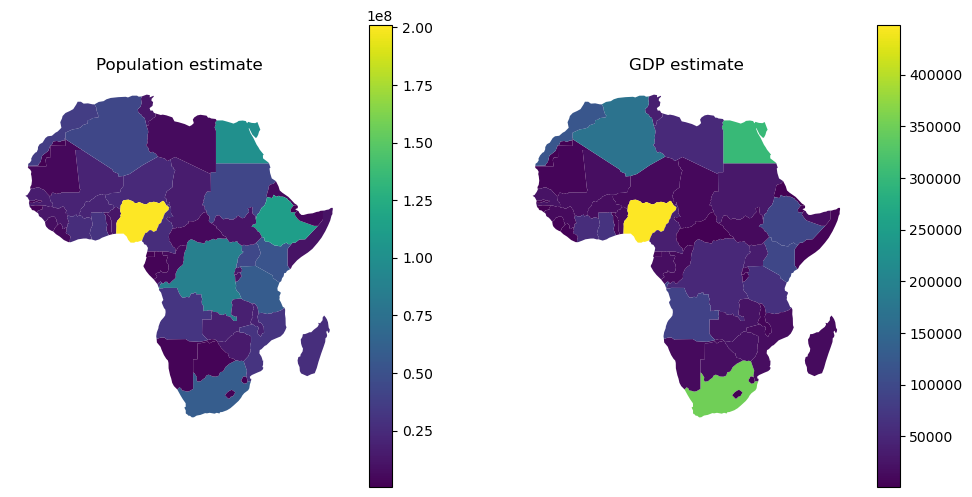

In [49]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(1,2, figsize=(12,6))

# plot population estimate in subplot 1
africa.plot(ax=ax[0], column ='pop_est', legend=True)

# plot gdp estimate in subplot 2
africa.plot(ax=ax[1], column ='gdp_md_est', legend=True)

# give subplot 1 an informative title
ax[0].set_title('Population estimate')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()

# show figure
plt.show()

## Subplots and axes

A quick note on the subplot and ax indexing. It can be a little tricky getting your head arround the indexing used when creating subplots.
To create mulitple subplots you use the code below, specifying firstly the number of rows then the number of columns. <br>
<code>.subplots([number of rows], [number of columns])</code>

When you are then specifyng each individual plot, you need to specify the axes of the plot, using the code <code> ax=ax[]</code>. The indexing for the axes starts at 0. I.e. the first row is 'row 0' and the first column, 'column 0'. This is illustrated below. 
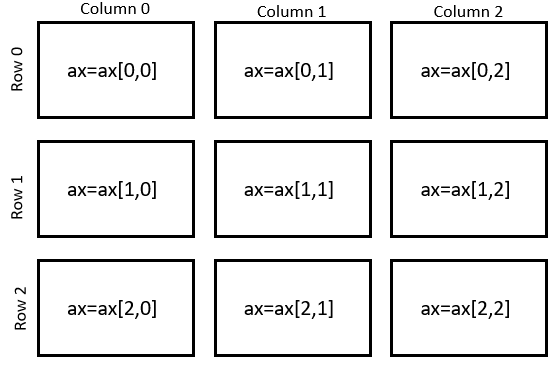

For a set of subplots with just one row you only need to specify the column in the <code>ax=ax[]</code> function. <br>
I.e. <code>ax=ax[column number]</code> <br>

I.e.<code> plt.subplot(1,2) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
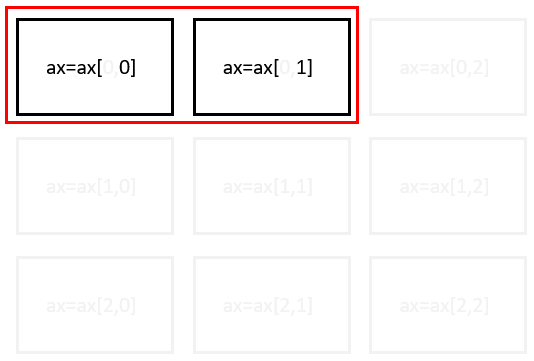 

Simialrly for a set of subplots with just one column you only need to specify the row in the <code>ax=ax[]</code> function. <br>
<code> plt.subplot(2,1) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
</code>
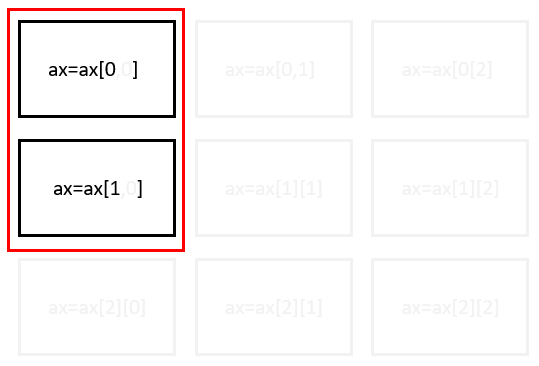

For a set of subplots with just multiple rows and columns you only need to specify both in the <code>ax=ax[,]</code> funciton.(row first then column)<br>
<code>plt.subplot(2,3)<br>
dataframe.plot(ax=ax[0,0], ... 
dataframe.plot(ax=ax[0,1], ...
dataframe.plot(ax=ax[0,2], ...
dataframe.plot(ax=ax[1,0], ...
dataframe.plot(ax=ax[1,1], ...
dataframe.plot(ax=ax[1,2], ...</code>
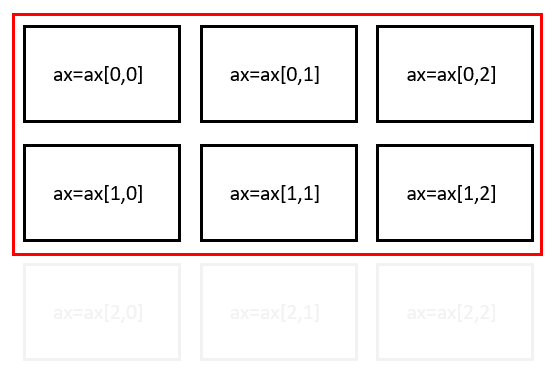

<div class="alert alert-block alert-warning">
    
## Extra task: Using USA data

### The data

In [50]:
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

# remove cities in sates not in the contiguous USA (not connected directly to the mainland), for ease of plotting
continental_usa_cities = usa_cities.loc[(usa_cities['STATE'] !="HI") & (usa_cities['STATE'] !="AK" ) & (usa_cities['STATE'] !="PR")]


In [51]:
continental_usa_cities.head()

id  POP_2010  ELEV_IN_FT STATE                     geometry
0   53   40888.0      1611.0    ND  POINT (-101.29627 48.23251)
1  101   52838.0       830.0    ND   POINT (-97.03285 47.92526)
2  153   15427.0      1407.0    ND   POINT (-98.70844 46.91054)
3  177  105549.0       902.0    ND   POINT (-96.78980 46.87719)
4  192   17787.0      2411.0    ND  POINT (-102.78962 46.87918)

<Axes: >

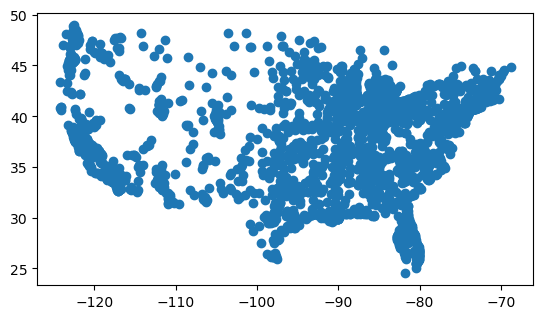

In [52]:
continental_usa_cities.plot()

In [53]:
contiguous_usa.head()

state adm1_code  population  \
0     Minnesota  USA-3514     5303925   
1       Montana  USA-3515      989415   
2  North Dakota  USA-3516      672591   
3         Idaho  USA-3518     1567582   
4    Washington  USA-3519     6724540   

                                            geometry  
0  POLYGON ((-89.59941 48.01027, -89.48888 48.013...  
1  POLYGON ((-111.19419 44.56116, -111.29155 44.7...  
2  POLYGON ((-96.60136 46.35136, -96.53891 46.199...  
3  POLYGON ((-111.04973 44.48816, -111.05025 42.0...  
4  POLYGON ((-116.99807 46.33017, -116.90653 46.1...

<Axes: >

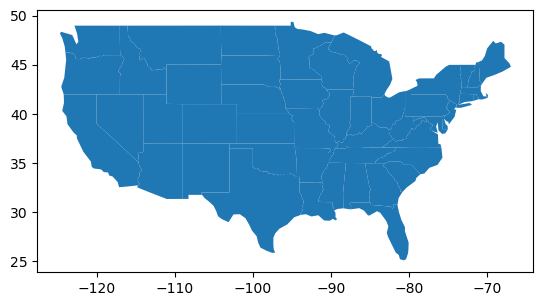

In [54]:
contiguous_usa.plot()

### Tasks:
- check the CRS of both geo data frames
- produce a layered map of cities and states
- Produce a choropleth map of 2010 popualation
- produce a choropleth map of elevation
- Colour city by state
- subset the data to plot a single state e.g. Washington

<h1><font color =red> End of exercise (stop here) </font>

# Exercise: Manipulating spatial data

## Geometric Manipulations 

### Buffers

A buffer in geographic information system (GIS) is a zone around a map feature measured in units of distance or time.

In Python we specify the buffer size: the radius of the buffer (in this case size is measured in degrees as the projection is epsg 4326).

E.g.:
<code> dataframe.crs ={'init': 'epsg:4326'} </code>

<code> dataframe.buffer(distance =10) </code> distance = 10 degrees.

In [55]:
cities.buffer(distance=10).plot();

NameError: name 'cities' is not defined

If we want to measure the buffer in meters we can change the projection to [EPSG 3857](https://epsg.io/3857) where the projection unit is meters (rather than degrees). 

Note: At the world scale this will result in errors in measurement due to the earth curvature. At a smaller scale, depending on where you are mapping other projections are more suitable e.g. [EPSG:4959](https://epsg.io/4959) is used in New Zealand

NameError: name 'cities' is not defined

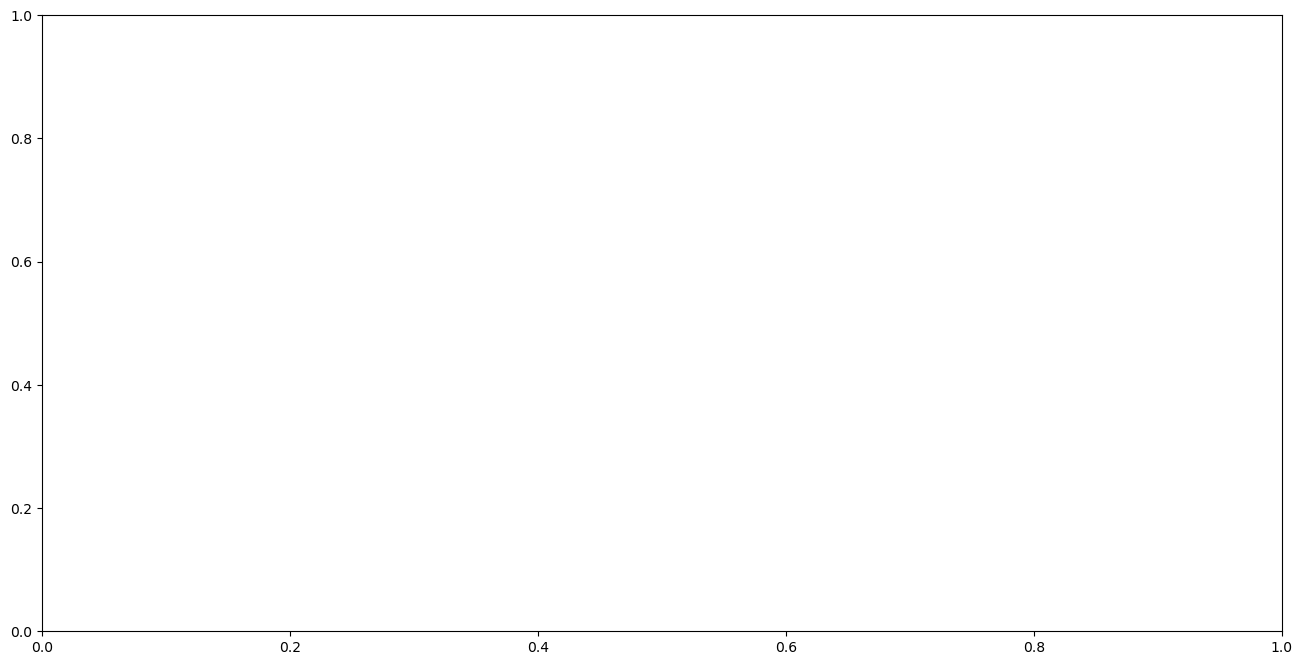

In [56]:
#Plot 500 km (500,0000 m) buffer arround cities

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

cities.to_crs('epsg:3857').buffer(distance=500000).plot(ax=ax)

plt.show()

In order to keep information about the area begin buffered in the newly created buffer geo-data-frame it is useful to copy the original data you want to conduct the geometric maipulation on, and name it something else e.g. data_buffer.

Then replace the geometry column in the copied data with the calculated buffer geometry.

E.g. 
<code> dataframe_buffer = dataframe.copy() </code>

<code> dataframe_buffer['geometry'] = dataframe.buffer(distance)</code>

In [57]:
# copy the cities dataframe
cities_buffer = cities.copy()

# apply the function (replacing the geometry column with the buffer geometry)
cities_buffer['geometry'] = cities.buffer(10)

cities_buffer.head()

NameError: name 'cities' is not defined

Note because we copied the cities data frame above the cities_buffer data frame contains the name of the city.

<font color = 'orchid'> <b> Try just running the code </b> <code>cities.buffer(10, resolution=10)</code>. </font> 
    
Note we get a geopandas array with the geometry data but not the corresponding city that is being buffered

In [58]:
# run the code
cities.buffer(10, resolution=10)

NameError: name 'cities' is not defined

We can add the cities_buffer layer to the map along with the countries and cities layers.

<font color = 'orchid'> <b> Run the code below, read the comments to understand what each line of code is doing  </font>

NameError: name 'cities_buffer' is not defined

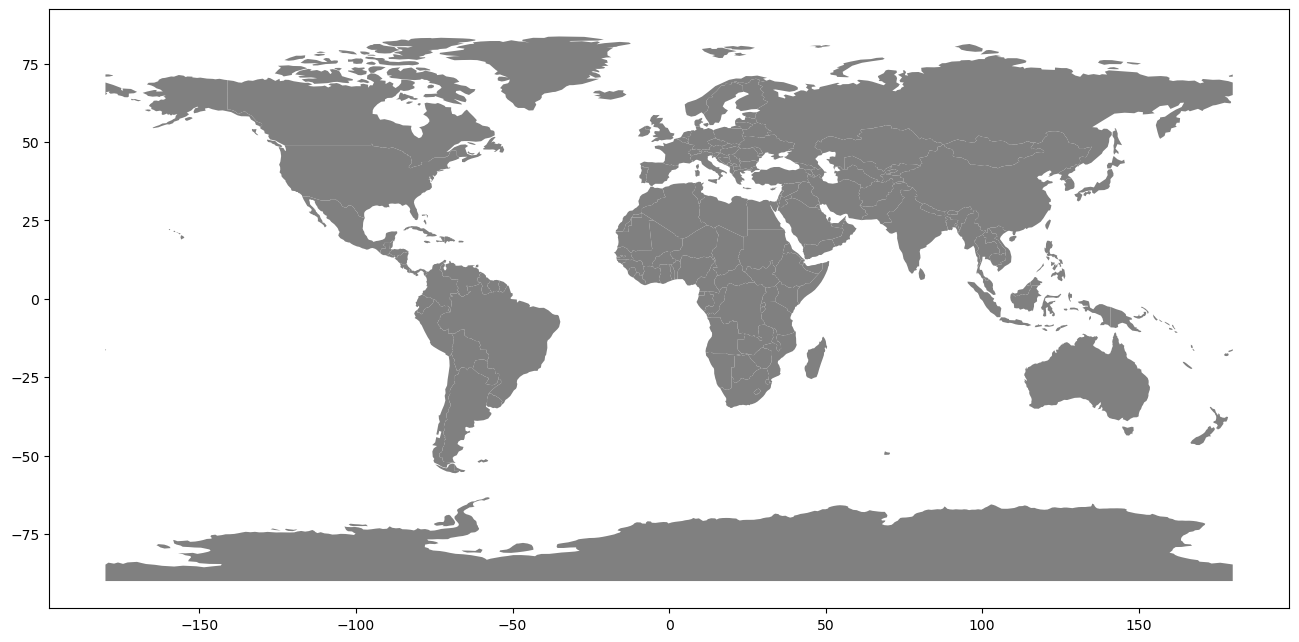

In [59]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the city buffers on the basemap axis, colour buffers blue
cities_buffer.plot(ax=base,color='blue', alpha=0.2)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# shw the map
plt.show()

### Centroids

Put simply the centroid is the center most point of a polygon (there are different debated methods of calculating centroids, but unless you are using centroids for a specific purpose the method should not matter too much). 

#### Why calculate centroids?

Lots of geometric manipulations and analysis use centroids. For example you might use centroids to as a proxy to measure the distance between two polygons.


<font color = 'orchid'> <b>Use the code </b> <code> dataframe.centroid </code> <b>to find the country centroids (run the next 3 cells of code for the worked example below) </font>

In [60]:
# copy the countries dataframe
countries_centroid = countries.copy()

# calcualte the centorid 
# and replace the country geometry (polygon) with the centroid geometry (point)
countries_centroid['geometry'] = countries.centroid

# check - geometry should contain point data
countries_centroid.head()

/var/folders/5f/7mc4blcs2mxgh06z6sgk8sc80000gp/T/ipykernel_70305/3522616098.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries_centroid['geometry'] = countries.centroid


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                      geometry  
0  POINT (163.85316 -17.31631)  
1    POINT (34.75299 -6.25773)  
2   POINT (-12.13783 24.29117)  
3   POINT (-98.14238 61.46908)  
4  POINT (-112.59944 45.70563)

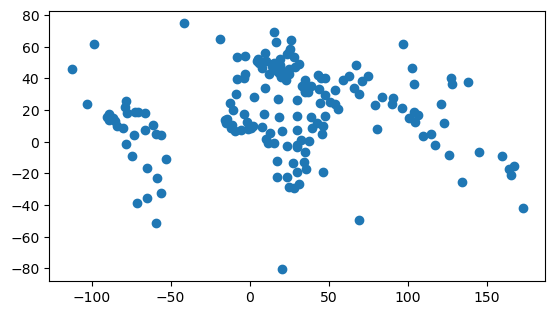

In [61]:
# plot to check it looks as expected
countries_centroid.plot();

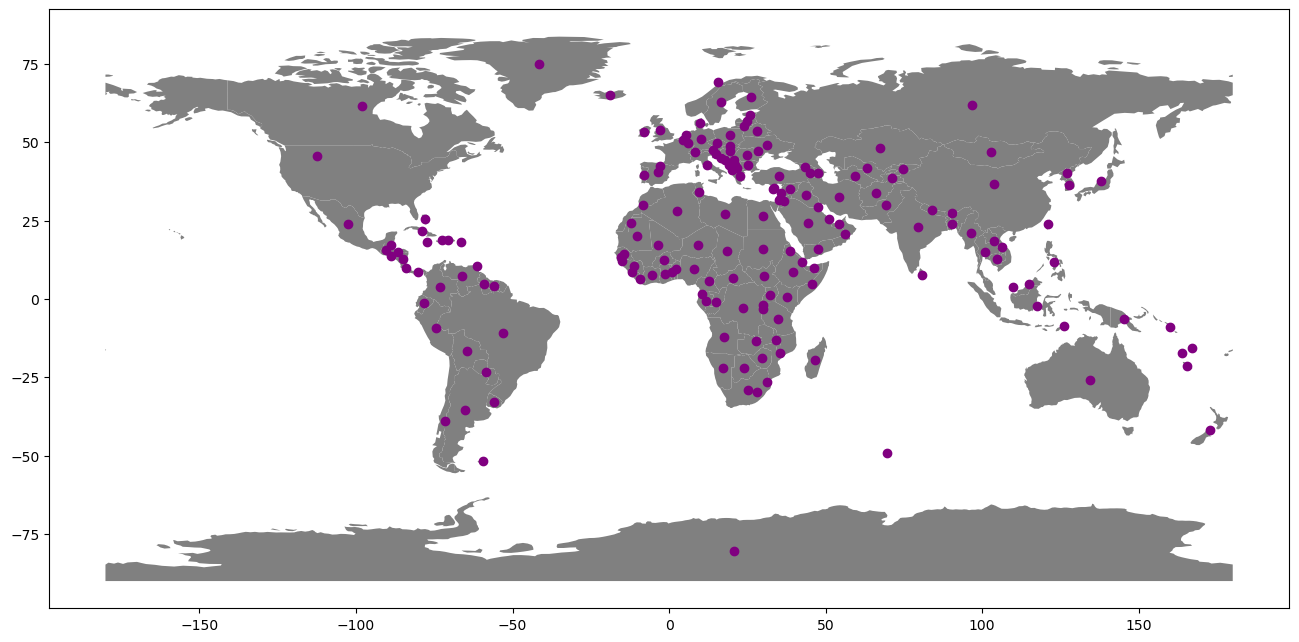

In [62]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,color='purple')

# show the map
plt.show()

We can also change marker size and colour of plotted points to reflect the data they represent (as we did with the chloropleth maps for polygon data). 

Note as population sizes are large (i.e. millions) I have assigned marker size to 'pop_est'/1,000,000, so the markers are plot-able. 

<font color = 'orchid'> <b>Run the code below, then try removing or reducing the size of <code>/1000000</code> and see what happens </font>

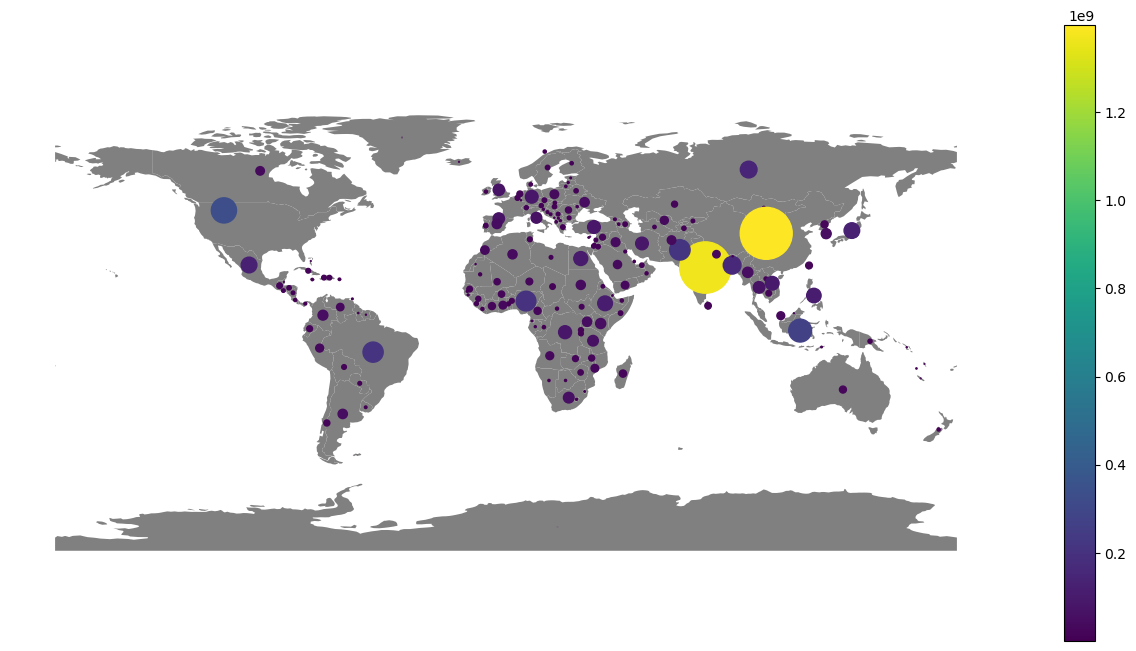

In [63]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,column='pop_est',markersize=countries['pop_est']/1000000, legend=True)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

### Convex hull polygons

A convex hull is the smallest polygon that you can draw around a collection of points/a polygon.

<font color = 'orchid'> <b>Run the code below to create convex hull polygons (using the code </b><code> dataframe.convex_hull</code><b> around the countries in Africa </font>

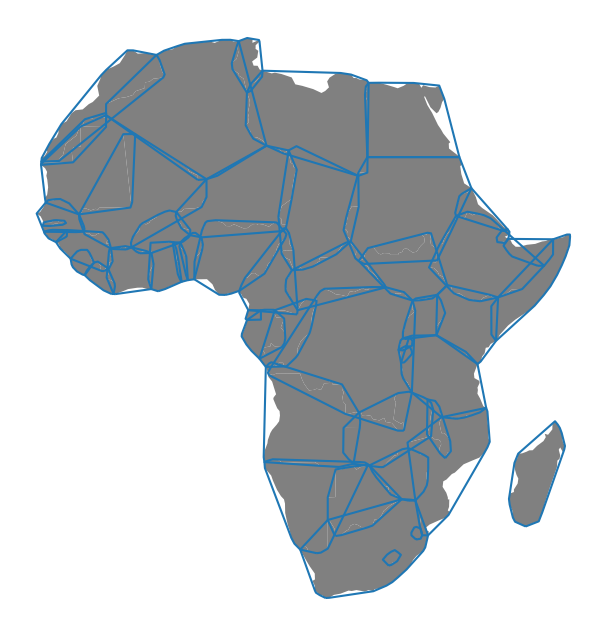

In [64]:
africa_convex_hull = africa.copy()

africa_convex_hull['geometry'] = africa.convex_hull

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = africa.plot(ax=ax, color='grey')

# plot the africa convex hull polygons
# .boundary alows us to just plot the polygon outline
africa_convex_hull.boundary.plot(ax=base)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

<div class="alert alert-block alert-warning">

### Coding task 
Try: 
    - Buffering the countries centroids 
    - Buffering the Africa convex hull polygons 
    - Getting the centroid of the africa convex hull polygons
    - Getting the convex hull polygons of all the countries (note this might look a bit messy)
    
Answers at end of exercise 2. 

## Spatially aggregating data
Often our data will not be at the same spatial scale so we may need to aggreaget areas of data together to get them to the same spatial scale. Or we may only be interested in larger spatial trends. Therefore we need to convert our smaller area data to larger area data. In geopandas we can easily so this using the <code>dissolve</code> function. 
In this example we are going to aggregate countries up to continent level. <br>
Think of dissolve as removing all the internal country boarders within the continent to leave just the continent outline.<br>
The data for the continent also gets aggregated e.g. estimated populaitn and GDP. <br>
<font color='orchid'> <b> Run the code below </font>

In [65]:
# specify which columns from the countries dataframe we are going to aggreagate,
# use the continent column to inform the dissolve
continents = countries[['continent', 'pop_est', 'geometry','gdp_md_est']].dissolve(by='continent', aggfunc='mean').reset_index()

# view the new continents dataframe
continents

continent                                           geometry  \
0                   Africa  MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...   
1               Antarctica  MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...   
2                     Asia  MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...   
3                   Europe  MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...   
4            North America  MULTIPOLYGON (((-155.22217 19.23972, -155.5421...   
5                  Oceania  MULTIPOLYGON (((147.91405 -43.21152, 147.56456...   
6  Seven seas (open ocean)  POLYGON ((68.93500 -48.62500, 69.58000 -48.940...   
7            South America  MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...   

        pop_est    gdp_md_est  
0  2.561510e+07  4.814733e+04  
1  4.490000e+03  8.980000e+02  
2  9.681441e+07  6.962868e+05  
3  1.911314e+07  5.535346e+05  
4  3.243089e+07  1.393110e+06  
5  5.886411e+06  2.353019e+05  
6  1.400000e+02  1.600000e+01  
7  3.285128e+07  2.963088e+05

Think carefully about how you want to aggregate the columns, we can also assign an aggfunction to each column (as we did with <code>.agg()</code> in day 1 when looking at the bike share data).

E.g.
<code>, aggfunc={'r_rank':'mean','r_exp':'max'})</code>

There is no quick way to assign multiple columns the same function so with a large dataset you might want to consider which columns you include in the aggregated spatial data frame. 


In [66]:
africa_cont = gpd.GeoDataFrame(continents.loc[continents['continent']=='Africa'])
africa_cont

continent                                           geometry       pop_est  \
0    Africa  MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...  2.561510e+07   

     gdp_md_est  
0  48147.333333

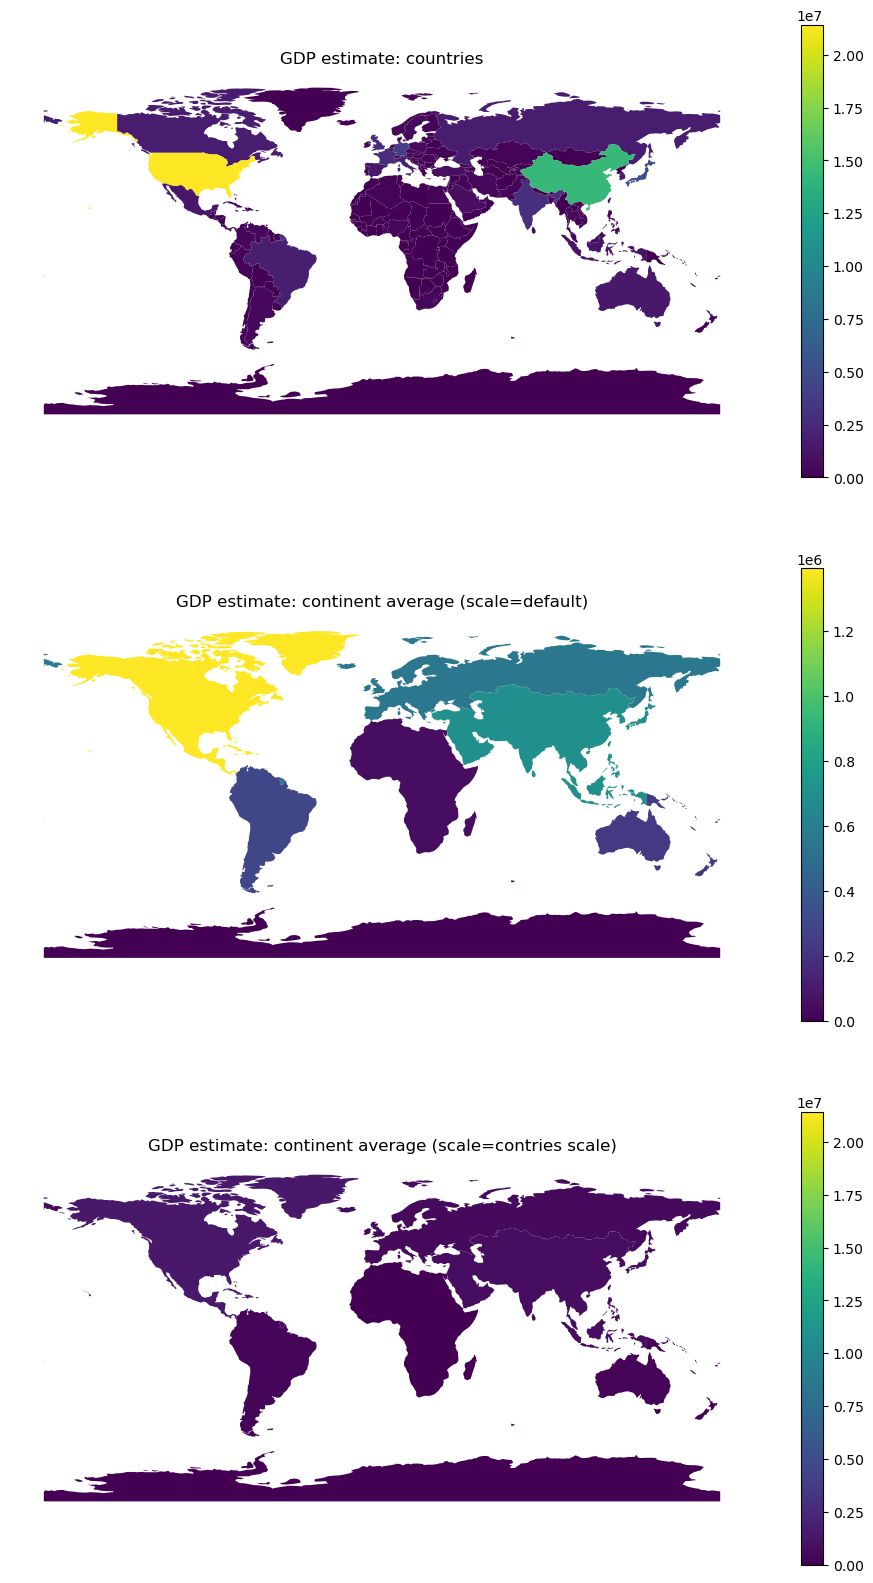

In [67]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(3,1, figsize=(12,20),sharex=True, sharey=True)

# plot countries mid year GDP estimate
countries.plot(ax=ax[0], column ='gdp_md_est', vmin=0,vmax=countries['gdp_md_est'].max() ,legend=True)

# plot countinent average mid year GDP estimate, default legend scale
continents.plot(ax=ax[1], column ='gdp_md_est', vmin=0,legend=True)

# plot countinent average mid year GDP estimate: countries legend scale 
continents.plot(ax=ax[2], column ='gdp_md_est', vmin=0,vmax=countries['gdp_md_est'].max() ,legend=True)

#patch_col = ax[0].collections[0]
#cb = f.colorbar(patch_col, ax=ax, shrink=0.5)

# make axis invisible for subplots
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

# give subplot 1 an informative title
ax[0].set_title('GDP estimate: countries')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate: continent average (scale=default)')

# give subplot 2 an informative title
ax[2].set_title('GDP estimate: continent average (scale=contries scale)')

# show figure
plt.show()

<font color= 'orchid'><b>Run the code below to plot a choropleth map of popualtion estimates for the continents</font>

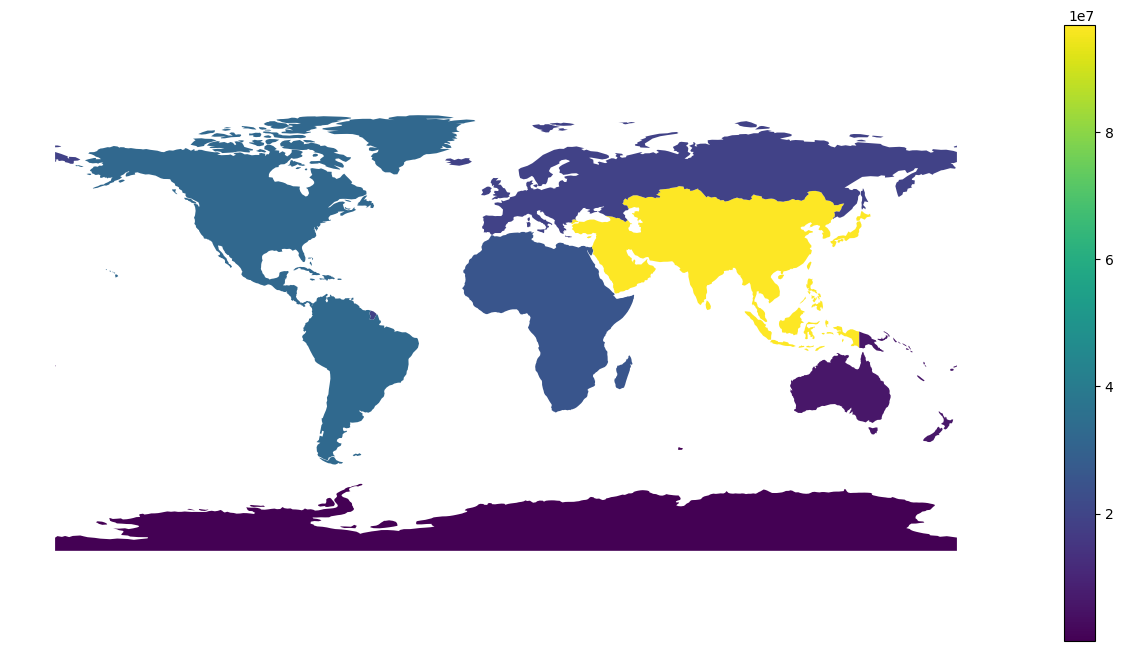

In [68]:
f,ax = plt.subplots(1, figsize=(16,8))
continents.plot(column='pop_est',legend=True, ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

<font color='orchid'> <b>Try plotting continents by 'gdp_md_est' </font> <br>
Answer at the end

In [69]:
#  plot here!

## Joining a non-spatial dataset to a spatial dataset

We are going to read in some data about forest coverage of differenet countires and join it to the countires dataframe

<font color ='orchid'><b> Run the code below to read in a csv of country forest coverage data </font>

In [70]:
# read in csv data using pandas
forest = pd.read_csv('country_forest.csv')
# have a quick look at the dataframe
forest.head()

country  forest_area_km2  per_forest
0         Russia          8149300      0.4940
1         Canada          4916438      0.4924
2         Brazil          4776980      0.5610
3  United States          3100950      0.3384
4          China          2083210      0.2183

The 'country' column in the forest dataframe matches that of the 'name' column in the countries dataframe. As they are formatted in exaclty the same way and each row is unique the country name is a unqiue identifier common to both dataframes. Therefore we will use this column to join our datasets. <br>
The code we will use is <code>pd.merge()</code>. We need to specify a few parameteres within the function:<br>

- Firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code> pd.merge(countries, forest... </code> <br>


- Secondly we need to specify the column in each dataframe, countries is on the left so we specify left_on='name': as we are using the 'name' column from the countires dataframe. And the forest dataframe is on the right so we specify right_on='country' as we are using the 'country' column.<br>
<code> pd.merge(countries, forest, left_on='name', right_on='country' ... </code> <br>


- Finally we need to specify how the tables are joined. This is based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/). In this case we are using a left join (we keep all the data in the left dataframe and just add the columns form the right dataframe on the end). 
<code> pd.merge(countries, forest, left_on='name', right_on='country', how='left') </code> <br>

In [71]:
country_forest  = pd.merge(countries, forest,  left_on='name', right_on='country', how='left')
country_forest.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry   country  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...      Fiji   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  Tanzania   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...       NaN   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...    Canada   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...       NaN   

   forest_area_km2  per_forest  
0          10000.0      0.5472  
1         352570.0      0.3722  
2              NaN         NaN  
3        4916438.0      0.4924  
4              NaN         NaN

Now we will visualise our newly joined data by plotting the percentage forest in each country

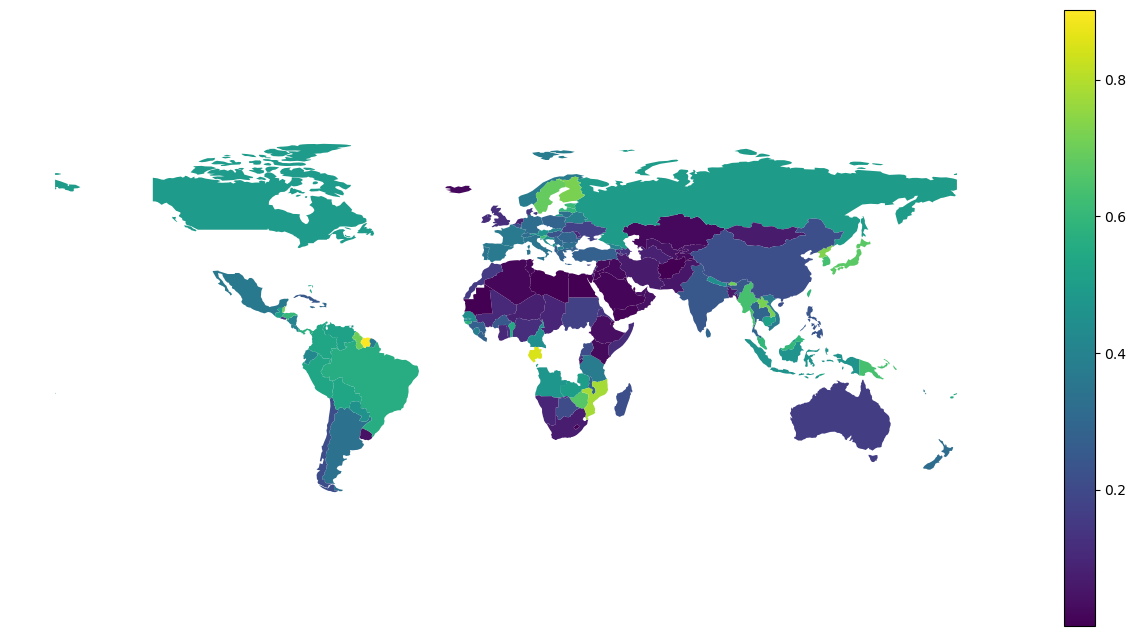

In [72]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

Because thereis such a large variaiton in percentage tree cover the above map with a continuous scale doesn't tell us much. To make a more informative plot we can use <code> scheme = ' '</code> 
And use <code> ['equal_interval', 'quantiles', 'fisher_jenks', 'fisher_jenks_sampled']</code> to define how the choropleth map is scaled.

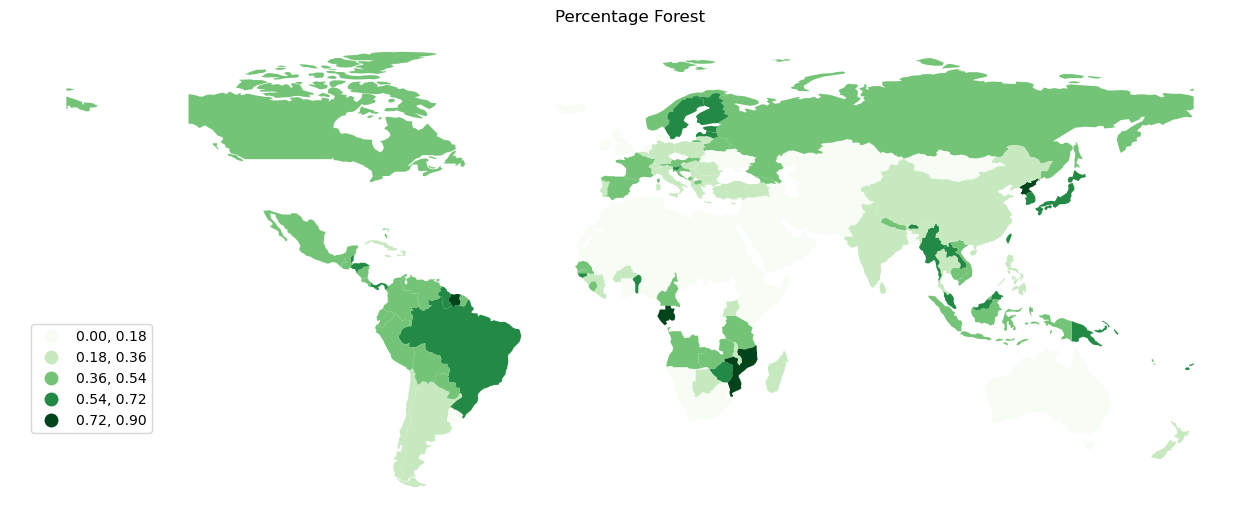

In [73]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,cmap='Greens',scheme='equal_interval', ax=ax)
# remove axis
ax.set_axis_off()
# position axis
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_title('Percentage Forest')
plt.show();

<font color='orchid'><b> Write your own code to map 'forest_area_km2'</font> <br>
Answer at the end

In [74]:
# plot here!


## Spatially Joining Data

It is also possible to join data based on their spatial relationship to each other using <code>.sjoin()</code>
For example we ight want to know the country each city is in.


Like with <code>pd.merge()</code> there are parameters we need to specify when using <code>gpd.sjoin()</code>

- Again firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code>gpd.sjoin(cities, countries, ... </code> <br>


- Secondly we need to specify how the tables are joined. (Again based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/)). In this case we are using an inner join
<code> gpd.sjoin(cities, countries, how="inner",... </code> <br>

- Finally we need to specify the tyep of spatial join using 'op'. From the [Geopandas documentation](http://geopandas.org/mergingdata.html) <br>
<i>The `op argument specifies how geopandas decides whether or not to join the attributes of one object to another. There are three different join options as follows:
    - <b>intersects:</b> The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.
    - <b>within:</b> The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).
    - <b>contains:</b> The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all. </i> <br>
    
<font color = 'orchid'><b> Run the code below to spatially join the data </font>

In [75]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

NameError: name 'cities' is not defined

NameError: name 'cities_with_country' is not defined

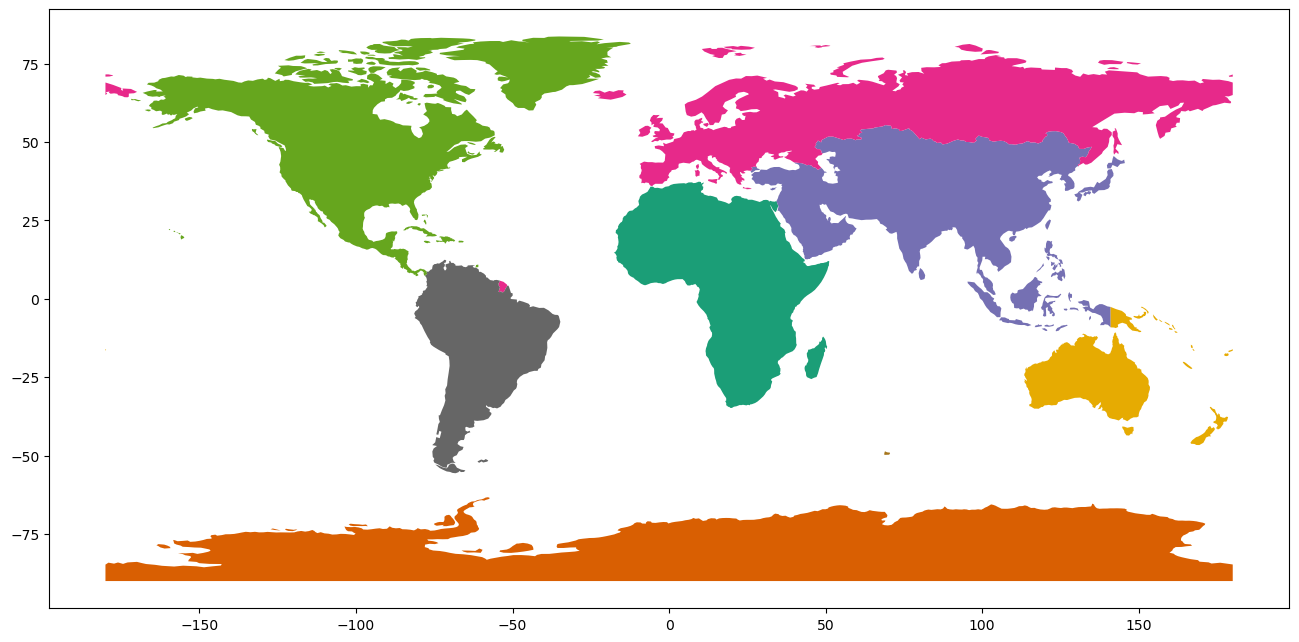

In [76]:
# let us plot the cities now coloured by the continent (a column initally from the cities dataframe)
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, cmap='Dark2')
# plot the cities and colour them based on continent
cities_with_country.plot(column='continent',ax=base, cmap='Spectral')
# remove axis
ax.set_axis_off()
plt.show()

Try doing the same for US cities and states:

In [77]:
# have a go here

## Overlay - creating spatial layers from the intersections, unions, and differences between map
I have included this for reference with a worked example, to show you how we can look at where spatial data overlaps. Full description an a list of the overlay operations can be found here: https://geopandas.org/set_operations.html
Have a read and explore the data

In [78]:
countries_in_buff =gpd.overlay(cities_buffer , countries, how='intersection')
countries_in_buff

NameError: name 'cities_buffer' is not defined

NameError: name 'countries_in_buff' is not defined

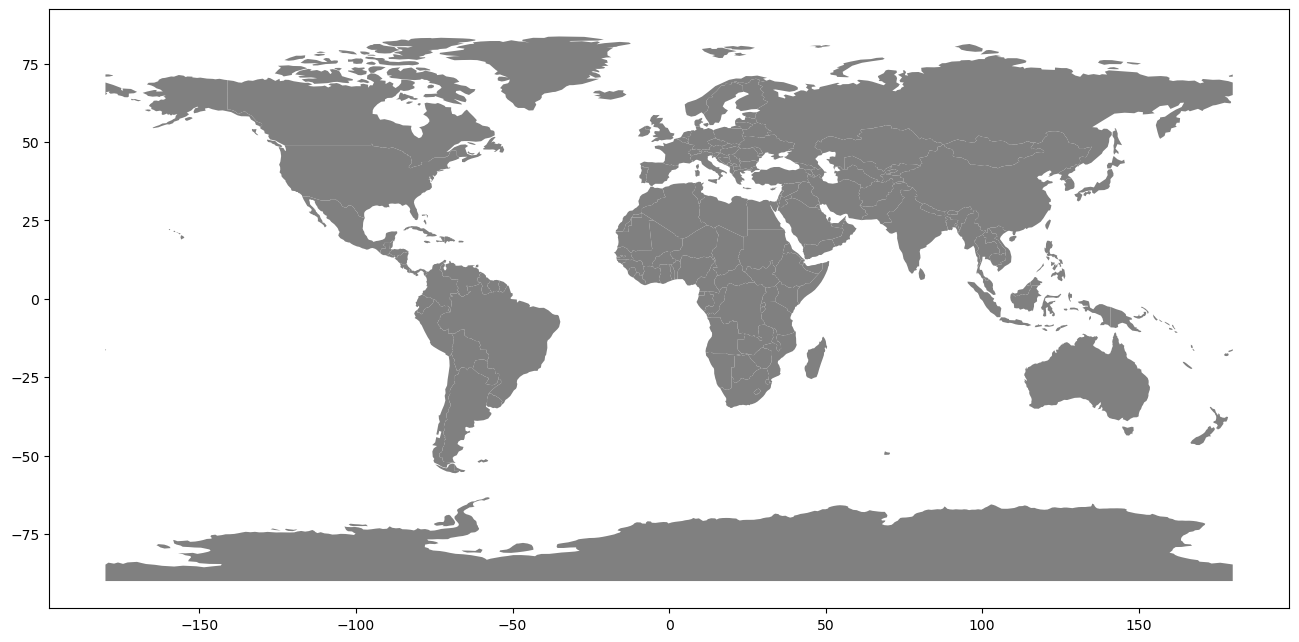

In [79]:
f,ax = plt.subplots(1, figsize=(16,8))

base = countries.plot(ax=ax,color='grey')
countries_in_buff.plot(ax=base, column='name_1',alpha=0.8)
# remove axis
ax.set_axis_off()
plt.show();

## Some other interesting maps

### Introducing geoplot: geospatial data visualization

package<i>'Geoplot is a high-level Python geospatial plotting library. It’s an extension to cartopy and matplotlib which makes mapping easy: like seaborn for geospatial. It comes with the following features:'</i>

Geoplot has many of the same functions that we have already used in visualising our maps, but also has some additional mapping features. Learn more here: https://residentmario.github.io/geoplot/plot_references/plot_reference.html

### Kernel density map

Much like the kernel density plots we produced in day 1 this produces a kernel density estimate of spatial point data. 

NameError: name 'cities' is not defined

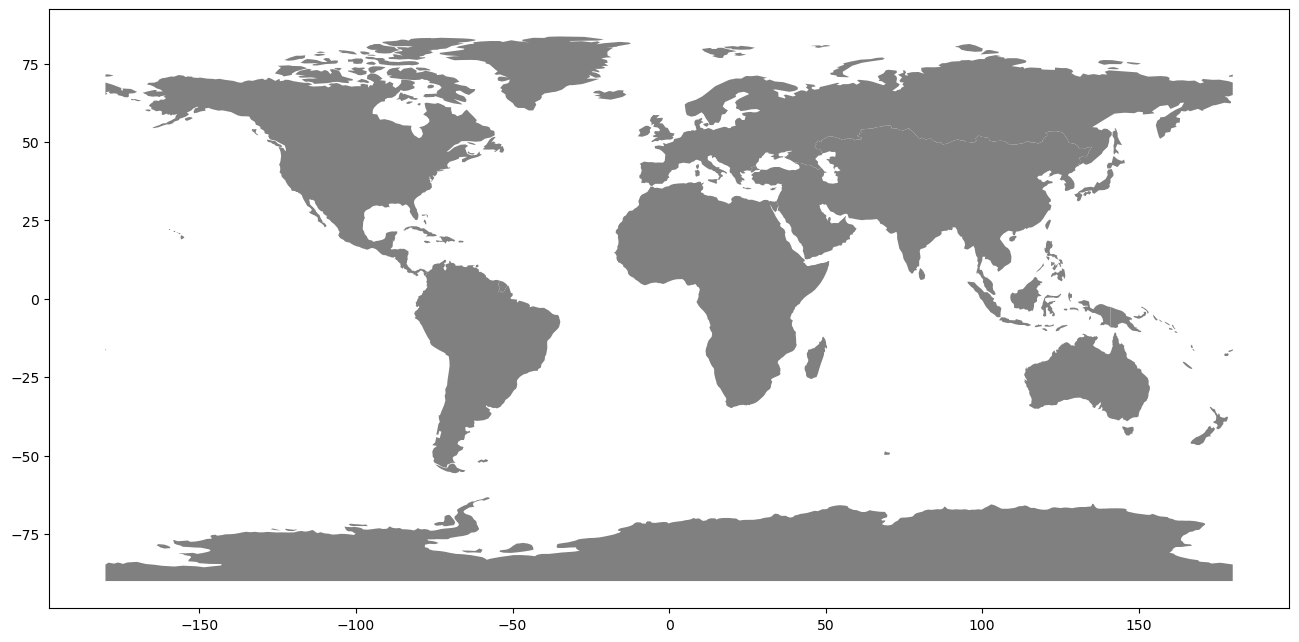

In [80]:
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, color='grey')

# map the kernel density estimate of world cities
gplt.kdeplot(cities, cmap="Reds", shade=True,ax=base, alpha=0.8)

# remove axis
ax.set_axis_off()

plt.show()

In [81]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [82]:
help(gplt.cartogram)

Help on function cartogram in module geoplot.geoplot:

cartogram(df, projection=None, scale=None, limits=(0.2, 1), scale_func=None, hue=None, cmap=None, norm=None, scheme=None, legend=False, legend_values=None, legend_labels=None, legend_kwargs=None, legend_var=None, extent=None, figsize=(8, 6), ax=None, **kwargs)
    A scaling area plot.
    
    Parameters
    ----------
    df : GeoDataFrame
        The data being plotted.
    projection : geoplot.crs object instance, optional
        The projection to use. For reference see
        :ref:`/user_guide/Working_with_Projections.ipynb`.
    scale : str or iterable, optional
        The column in the dataset (or an iterable of some other data) with which to scale output
        points. For a reference on this and the other scale-related parameters that follow, see
        :ref:`/user_guide/Customizing_Plots.ipynb#scale`.
    limits : (min, max) tuple, optional
        If ``scale`` is set, the minimum and maximum size of the points.
    s

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

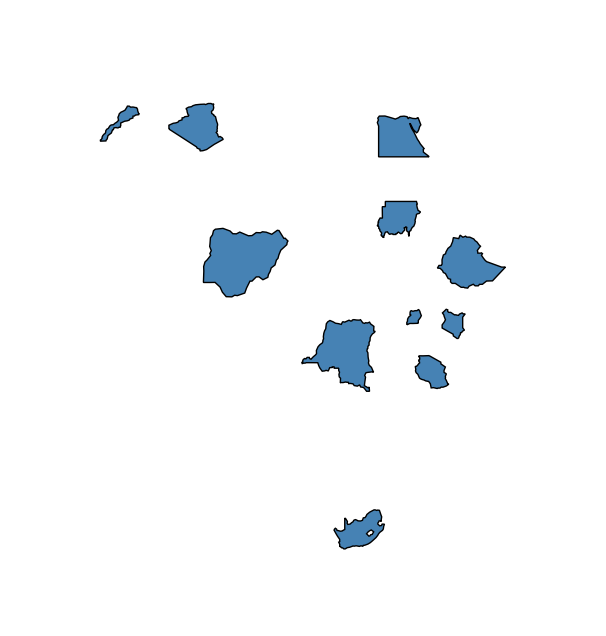

In [83]:
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)for refernce
#base = continents.plot(ax=ax, color='grey')

# map the countries resized by popualtion estimate
gplt.cartogram(africa, scale='pop_est',  ax=ax,limits=(0.2, 1))

# remove axis
ax.set_axis_off()

plt.show();

<font color ='orchid'><b> Write your own code to resize countries by GDP </font>

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

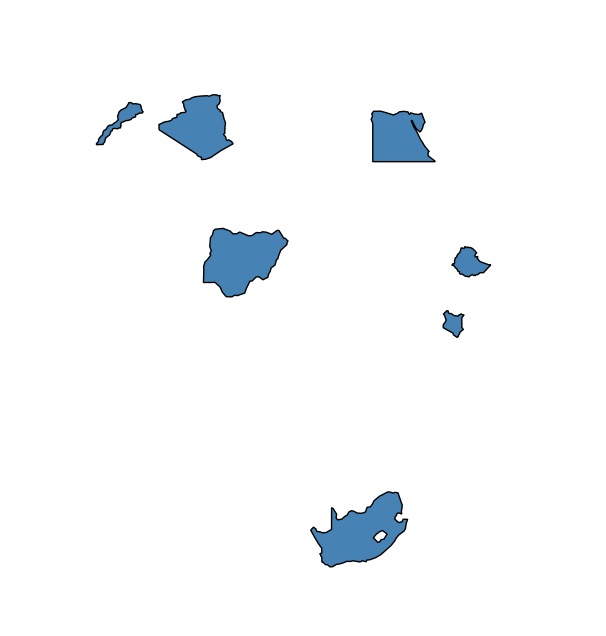

In [84]:
# Write your own code to resize countries by GDP
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)for refernce
#base = continents.plot(ax=ax, color='grey')

# map the countries resized by popualtion estimate
gplt.cartogram(africa, scale='gdp_md_est',  ax=ax,limits=(0.2, 1))

# remove axis
ax.set_axis_off()

plt.show();

<font color ='orchid'><b> Write your own code to resize countries by forest area per km2 </font>

In [58]:
# Write your own code to resize countries by forest_area_km2


### Adding base maps
Base maps provide the reader with context for a map. At a smaller scale than we are currently using the basemap may show road networks or point of interest. 

We are going to use contextily to add the background map to the geographic data using the <code>.basemap()</code> function. 

#### Aligning the CRS
But first we need to convert the CRS of the data we want to plot to the Web Mercator projection (epsg=3857). So the base maps and geographic data we are plotting align. 

Unless the data file I want to plot is particularly big I tend to save the data with the Web Mercator projection as a new geodataframe to avoid confusion.

In [59]:
# convert CRS to epsg=3857 Web Mercator
africa_WM = africa.to_crs(epsg=3857)


f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual 
africa_WM .plot( alpha=0.5,column='pop_est',ax=ax)

# add ctx basemap to ax
ctx.add_basemap(ax)

ax.set_axis_off()

NameError: name 'africa' is not defined

#### Different base maps.
By default ctx.add_basemap() uses the Stamen Terrain style.

To see the available different base maps we can get the provider keys:

List of contextily providers:

In [60]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey', 'Stamen'])

Each will have their own options, accessed by the code: <code> ctx.providers.<text color='red'>provider_from_above</font>.keys()</code>

E.g. <code> ctx.providers.OpenStreetMap.keys()</code>

In [61]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])

We can then use the provider and porvider options to choose our base map e.g. <code>OpenStreetMap.Mapnik</code>

NameError: name 'africa_WM' is not defined

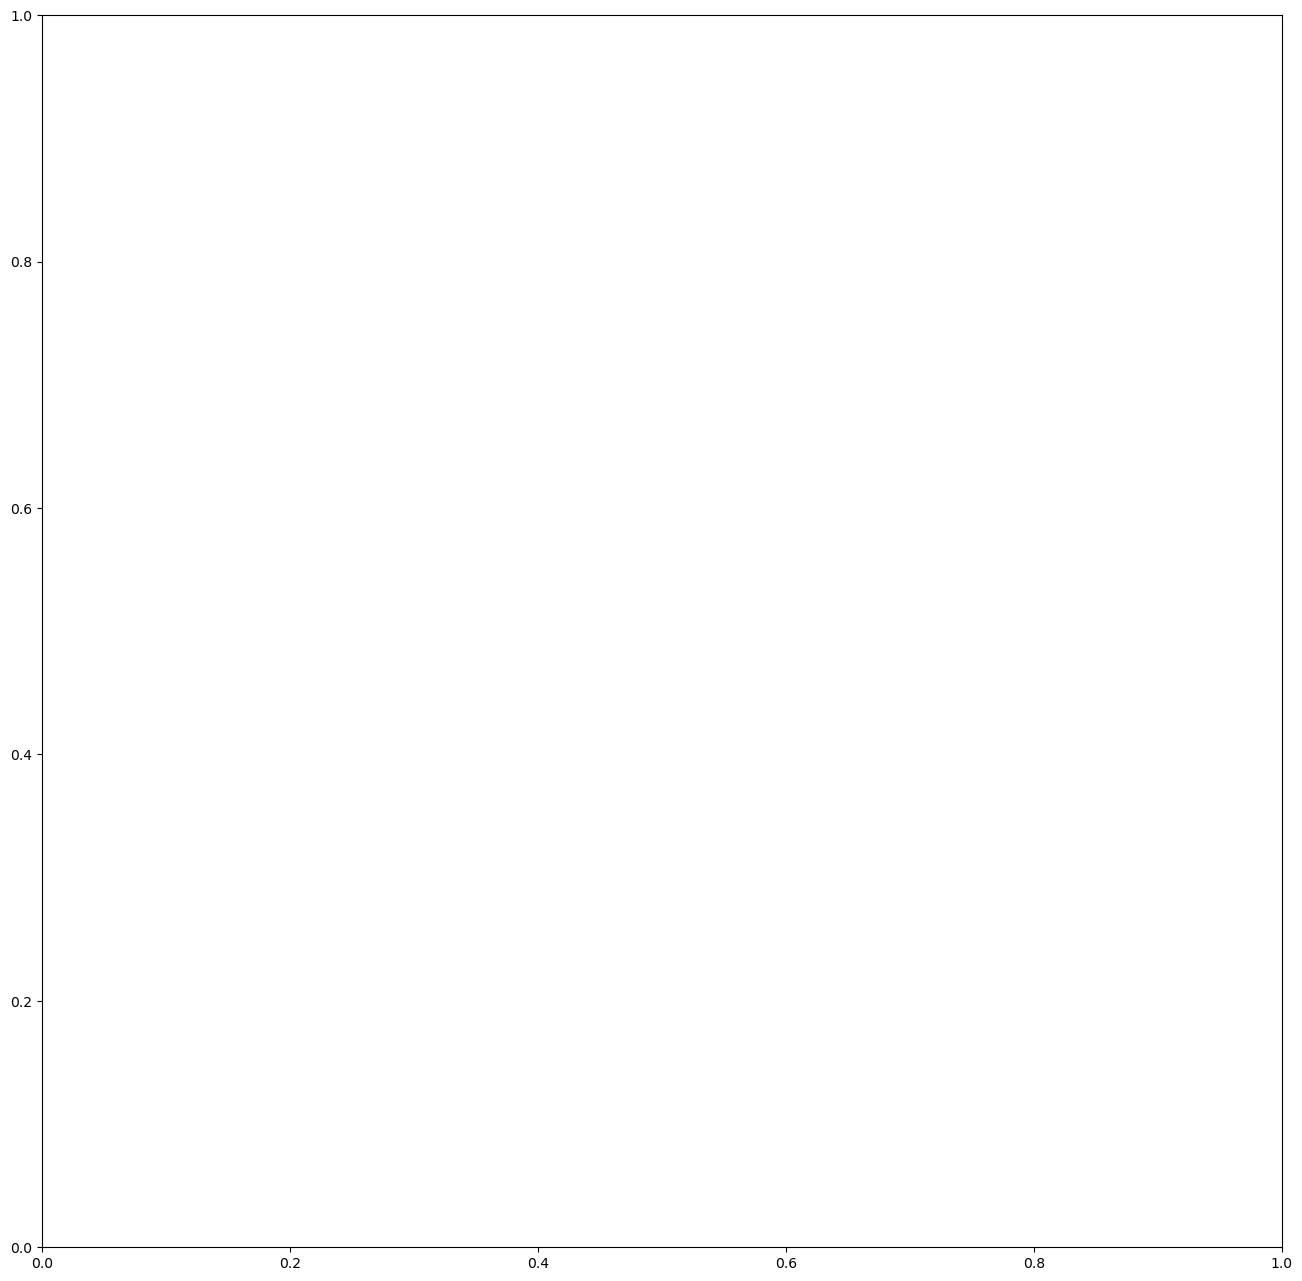

In [62]:


f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual 
africa_WM .plot(figsize=(10, 10), alpha=0.2,column='pop_est',ax=ax)

# add ctx basemap to ax, specifying the basemap provider and options
ctx.add_basemap(ax,url=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()


<font color='orchid'><b>  Play around with the providers and options to get different base maps.

#### Using geoplot to add a basemap

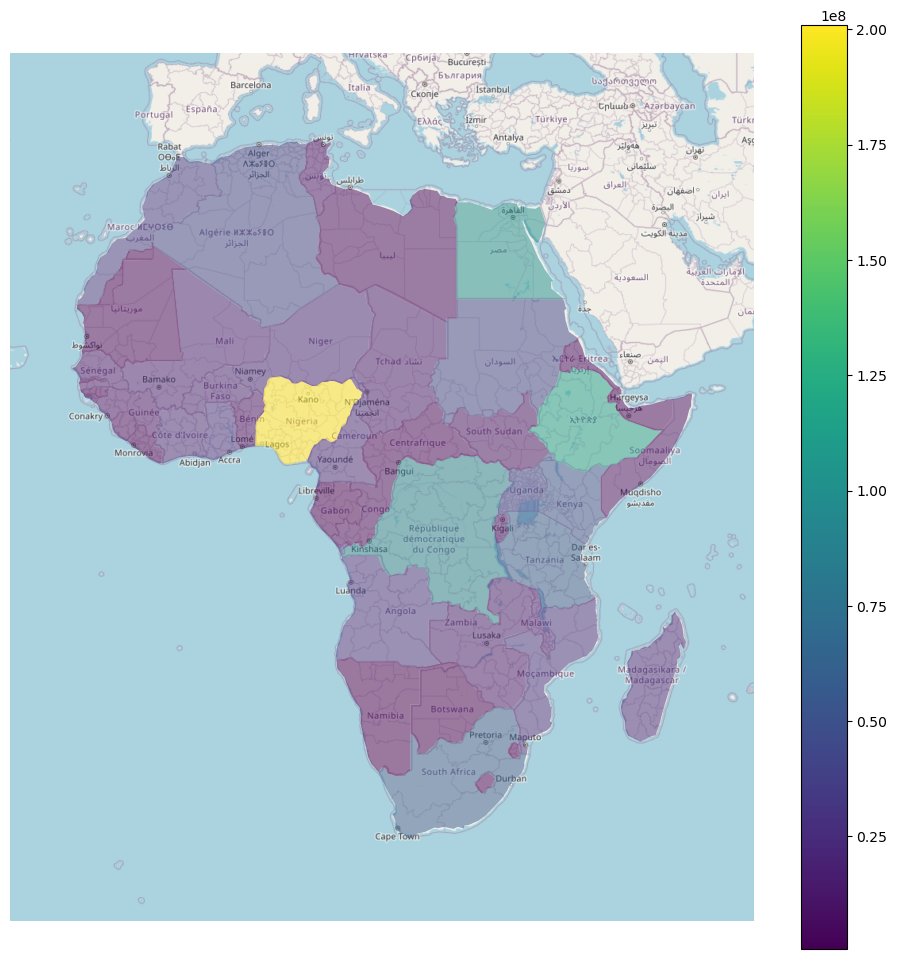

In [60]:

# specify basemap (webmap) including projection
# using geoplot we specify the figure size in the function
ax = gplt.webmap(africa, projection=gcrs.WebMercator(),figsize=(12, 12),)

# plot a chlorolpeth of africa by popualtion estiamte
gplt.choropleth(africa, ax=ax, hue='pop_est', legend=True, alpha=0.5);

<h1> Exercise answers</h1>  <a class="tocSkip">

## <a class="tocSkip">
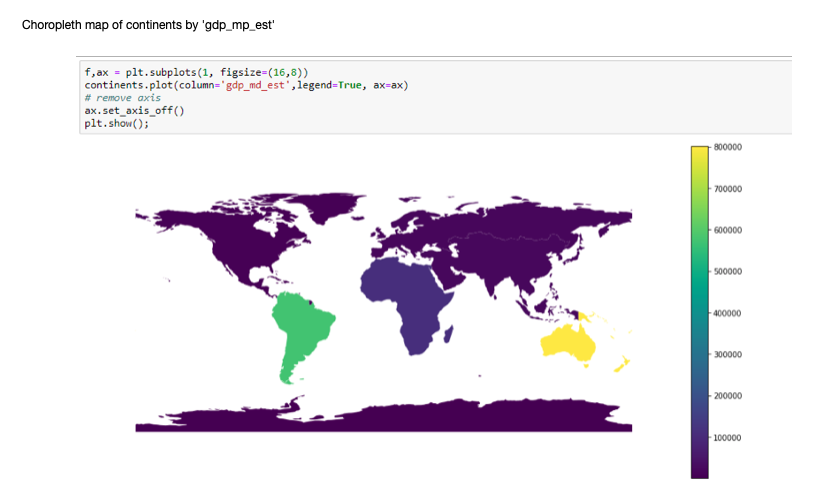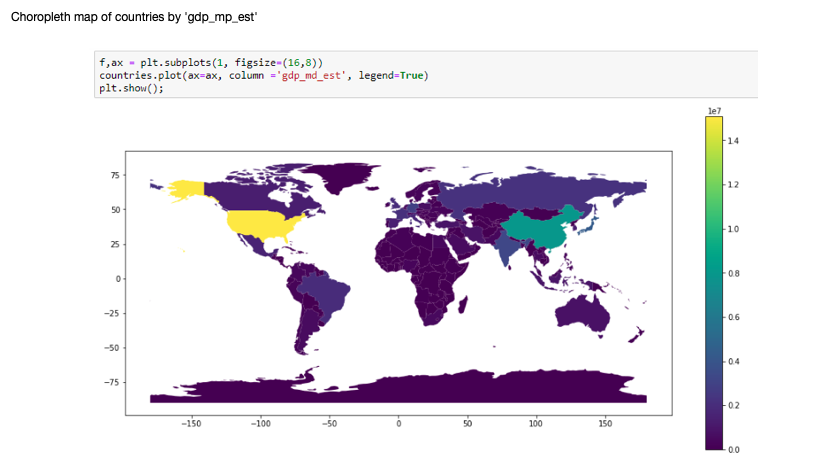

/var/folders/zb/krmfm5g13lz_rmrhr0vqhjbw0000gn/T/ipykernel_65410/1865872767.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries_centroid_buffer['geometry'] = countries_centroid.buffer(6)


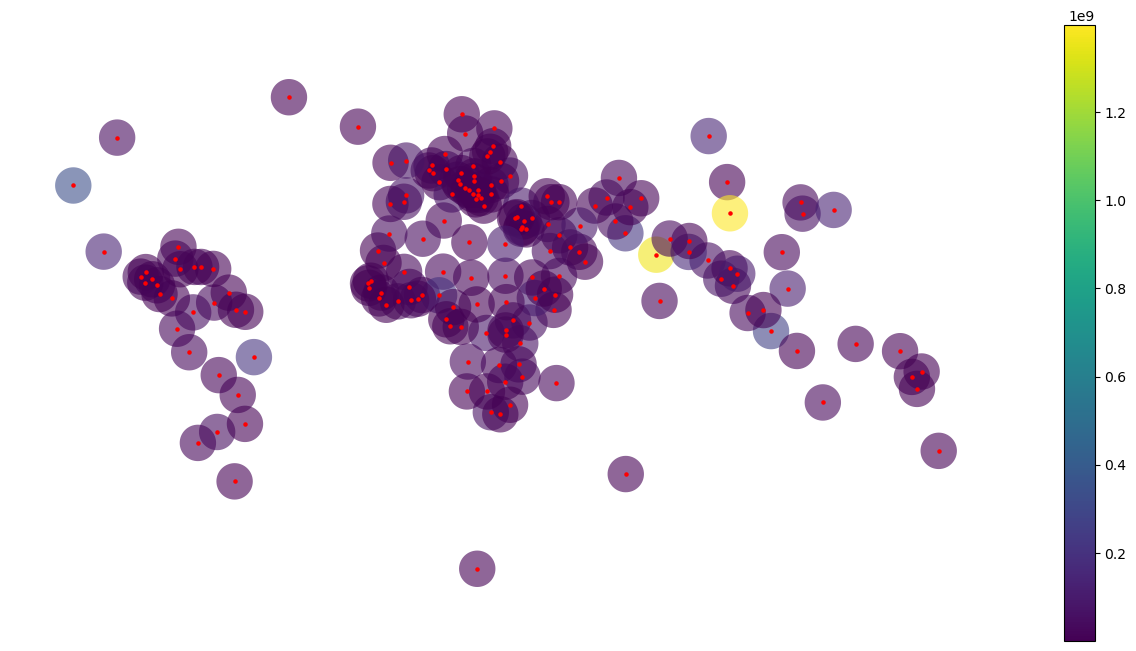

In [61]:
### buffering the countries centroids

# copy the centroids dataframe
countries_centroid_buffer = countries_centroid.copy()

# calculate the buffer, replacing the geometry column wiht the clauclted buffer geometry 
countries_centroid_buffer['geometry'] = countries_centroid.buffer(6)

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# plot the country centroid buffers on the basemap axis, colour the buffers based on popaultion estimate
base = countries_centroid_buffer.plot(ax=ax,column='pop_est', legend=True, alpha=0.6)
# plot the country centroids
countries_centroid.plot(ax=base,color='red', markersize=5)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

/var/folders/zb/krmfm5g13lz_rmrhr0vqhjbw0000gn/T/ipykernel_65410/1302073775.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa_convex_hull_buffer['geometry'] = africa_convex_hull.buffer(6)


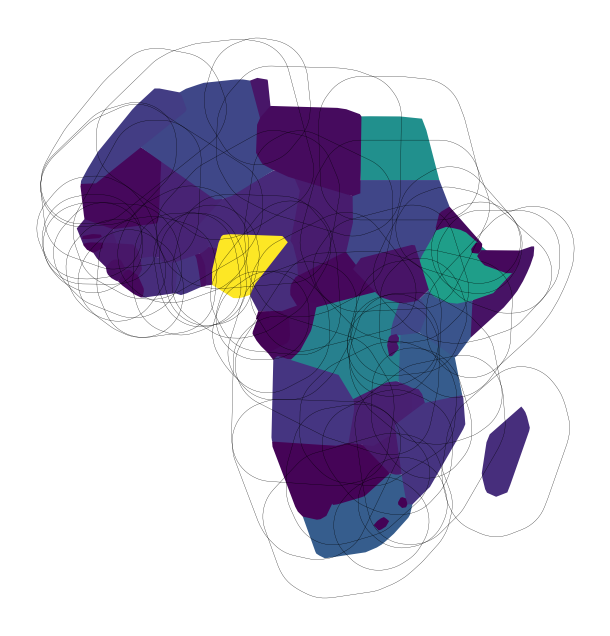

In [62]:
### buffering the Africa convex hull polygons

# copy the centroids dataframe
africa_convex_hull_buffer = africa_convex_hull.copy()

# calculate the buffer, replacing the geometry column wiht the clauclted buffer geometry 
africa_convex_hull_buffer['geometry'] = africa_convex_hull.buffer(6)

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))


# plot the africa dataframe on the basemap axis
base = africa_convex_hull.plot(ax=ax,column='pop_est')

# plot the afica centroid buffers, colour the buffers based on popaultion estimate
africa_convex_hull_buffer.boundary.plot(ax=ax,color=None,edgecolor='black',linewidth = 0.2)


# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

/var/folders/zb/krmfm5g13lz_rmrhr0vqhjbw0000gn/T/ipykernel_65410/2098934843.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa_convex_hull_centroid['geometry'] = africa_convex_hull.centroid


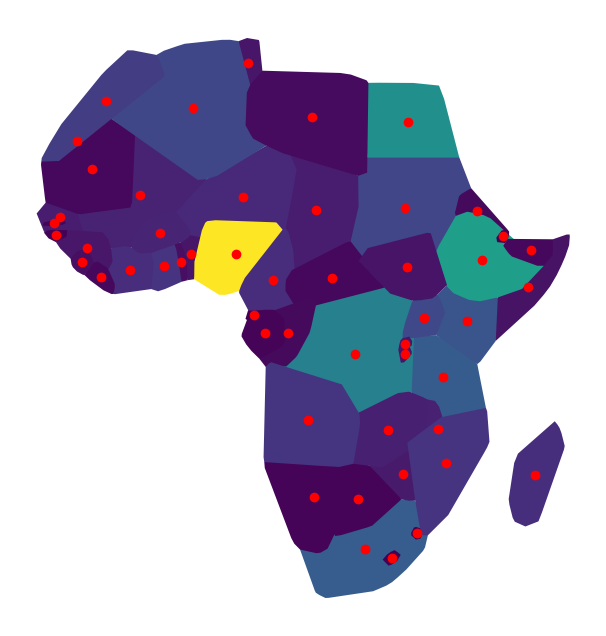

In [63]:
### get the centroids of the Africa convex hull polygons

# copy the centroids dataframe
africa_convex_hull_centroid = africa_convex_hull.copy()

# calculate the buffer, replacing the geometry column wiht the clauclted buffer geometry 
africa_convex_hull_centroid['geometry'] = africa_convex_hull.centroid

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))


# plot the africa dataframe on the basemap axis
base = africa_convex_hull.plot(ax=ax,column='pop_est')

# plot the centroids of the convex hull polygons, colour them red
africa_convex_hull_centroid.plot(ax=ax,color='red')


# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

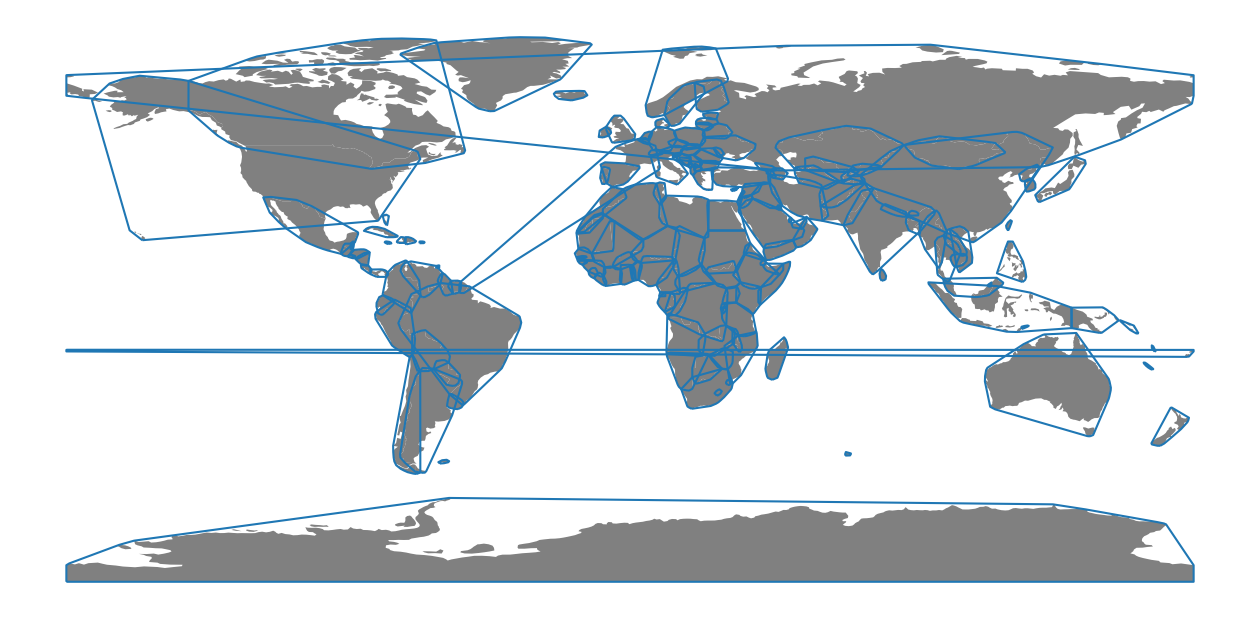

In [64]:
countries_convex_hull = countries.copy()

countries_convex_hull['geometry'] = countries.convex_hull

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the africa convex hull polygons
countries_convex_hull.boundary.plot(ax=base)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

# CDRC Data



## Option 1: Internet speed and usage level

It is possible that broadband speed affects usership classification: the faster your broadband the more likely you are to use it. You will investigate this using the Internet user classification (IUC), a bespoke classification that describes how people living in different parts of Great Britain interact with the Internet alongside broadband speed data from Ofcom. 

### Where to find the data:
https://data.cdrc.ac.uk/geodata-packs

- Internet User Classification (IUC) : West Yorkshire (or region of Choice)
- Broadband-speed : West Yorkshire (or region of Choice)


1. Download the data
2. Save the data in an appropriate file path

Meta data:

ICU: aggregate population profiles of Internet use and engagement at the Lower Super Output Area (LSOA). [Full metadata](https://data.cdrc.ac.uk/system/files/iuc2018userguide.pdf)

Broadband speed:the average fixed-line broadband speed by output area, based on 2016, 2017 and 2018 data released by Ofcom at the Lower Super Output Area (LSOA). [Full metadata](https://data.cdrc.ac.uk/dataset/broadband-speed)



## Option 2: House price and AHAH

Have a look at house price where you live and see if this varies in line with environmental features of that area. 
The data available to download includes Median House Prices (Quarterly) for the years 1995-2018 and the Access to Healthy Assets & Hazards (AHAH)data. The AHAH data is a multi-dimensional index developed by the CDRC for Great Britain measuring how ‘healthy’ neighbourhoods are. 

The AHAH Index includes:
- Retail environment (access to fast food outlets, pubs, off-licences, tobacconists, gambling outlets),
- Health services (access to GPs, hospitals, pharmacies, dentists, leisure services),
- Physical environment (Blue Space, Green Space - Active, Green Space - Passive), and
- Air quality (Nitrogen Dioxide, Particulate Matter 10, Sulphur Dioxide).

Presence or absence of these environmental features may influence how attractive an environment is to live in and therefore house price. These variables may also be proxy for other facotrs, e.g. air pollution may give an idea of traffic volume.


### Where to find the data:
https://data.cdrc.ac.uk/geodata-packs

- Access to Healthy Assets and Hazards AHAH : West Yorkshire (or region of Choice)
- Housing Prices : West Yorkshire (or region of Choice)


1. Download the data
2. Save the data in an appropriate file path

About the datasets:


## Census data
We will also show you how to [download census data](http://infuse.ukdataservice.ac.uk) that you can also add to your data exploration and analysis of house price or internet usage. 



## Some code to get you started 

We have downloaded the datasets from the CDRC for the West Yorkshire region, these are saved on GitHub under the folder 'Example_CDRC_Data'. You may wish to download these yourself from CDRC or pick another region. In which case make sure you change the file directories below to match where you saved the files. 

### Option 1: Getting started

In [43]:
# change the file path to match where you saved the data
internet_shape = gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
internet_data =  pd.read_csv('Example_CDRC_Data/Internet_User_Classification/Combined_Authorities/E47000003/tables/E47000003.csv')        

internet  = pd.merge(internet_shape, internet_data,  on='lsoa11cd',  how='left')
internet.head()

lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  GRP_CD                      GRP_LABEL  
0  West Yorkshire  Bradford 016A       6                   e-Mainstream  
1  West Yorkshire  Bradford 016B       7  Passive and Uncommitted Users  
2  West Yorkshire  Bradford 018A       5        e-Rational Utilitarians  
3  West Yorkshire  Bradford 016C       6                   e-Mainstream  
4  West Yorkshire  Bradford 016D       8                Digital Seniors

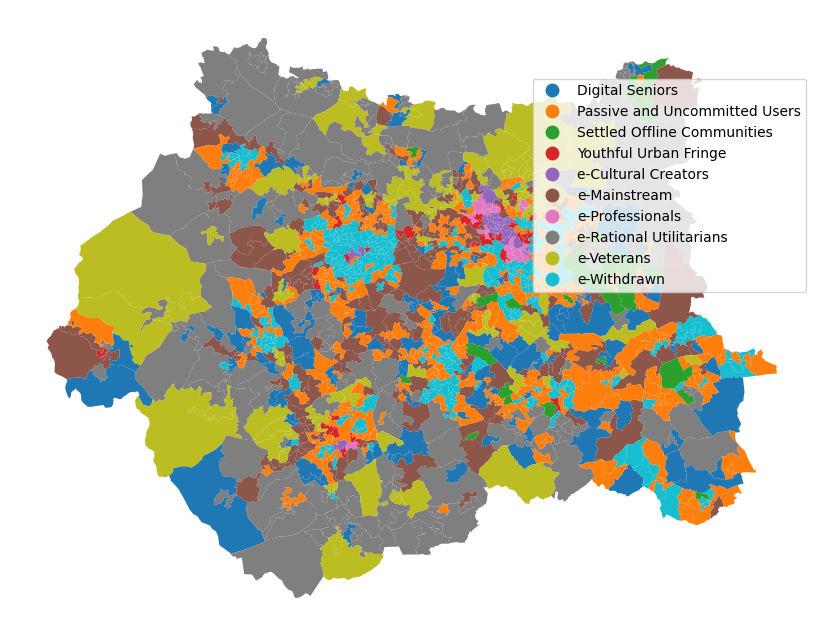

In [44]:
f,ax = plt.subplots(1, figsize=(16,8))

internet.plot('GRP_LABEL', categorical=True, legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))

plt.show()

In [45]:
# change the file path to match where you saved the data
broadband_shape = gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
broadband_data =  pd.read_csv('Example_CDRC_Data/Fixed_Broadband/Combined_Authorities/E47000003/tables/E47000003_2018.csv')        

broadband  = pd.merge(broadband_shape, broadband_data,  on='lsoa11cd',  how='left')
broadband.head()

lsoa11cd                                           geometry     oa11cd  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053358   
1  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053359   
2  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053365   
3  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053367   
4  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053368   

   Median.download.speed..Mbit.s.  Average.download.speed..Mbit.s.  \
0                            39.8                             48.0   
1                            31.0                             54.4   
2                            52.5                             66.6   
3                            39.8                             54.1   
4                            40.0                             56.5   

   Minimum.download.speed..Mbit.s.  Maximum.download.speed..Mbit.s.  \
0                              0.9                            200.0   
1                              2.2                            200.0   
2                              2.5                            200.0   
3                              0.3                            200.0   
4                              3.1                            200.0   

   Average.download.speed..Mbit.s..for.lines...10Mbit.s  \
0                                                5.8      
1                                                7.1      
2                                                6.0      
3                                                5.2      
4                                                7.6      

   Average.download.speed..Mbit.s..for.lines.10.30Mbit.s  \
0                                               18.0       
1                                               17.2       
2                                               13.8       
3                                               19.1       
4                                               10.7       

   Average.download.speed..Mbit.s..for.SFBB.lines  ...  \
0                                            82.0  ...   
1                                            94.5  ...   
2                                            91.3  ...   
3                                            90.0  ...   
4                                            81.4  ...   

   Number.of.premises.with.UFBB.availability  \
0                                        153   
1                                        137   
2                                        126   
3                                         97   
4                                        119   

   Number.of.premises.with.Full.Fibre.availability  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Number.of.premises.unable.to.receive.2Mbit.s  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Number.of.premises.unable.to.receive.5Mbit.s  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Number.of.premises.unable.to.receive.10Mbit.s  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Number.of.premises.unable.to.receive.30Mbit.s  \
0                            

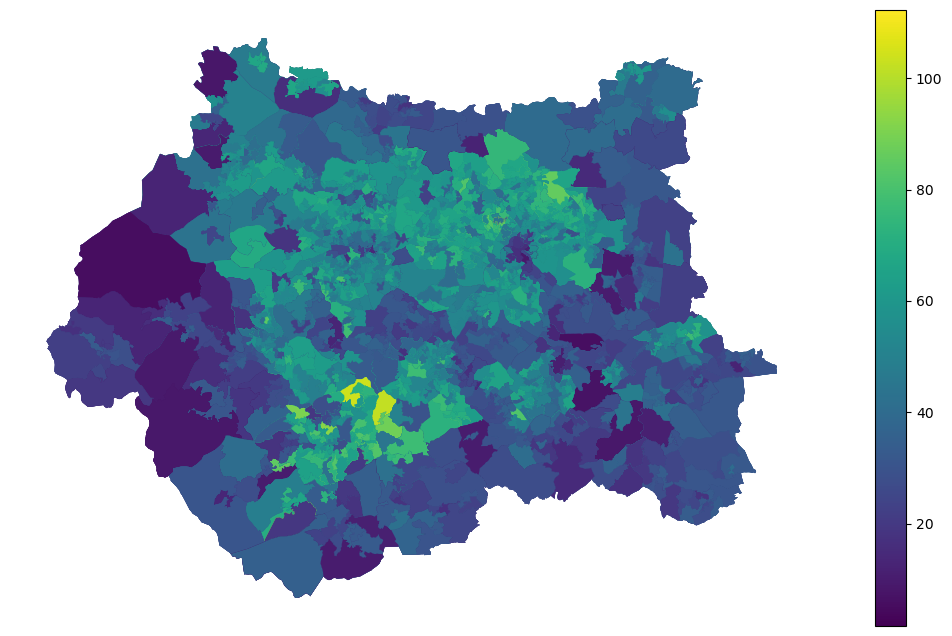

In [46]:
f,ax = plt.subplots(1, figsize=(16,8))

broadband.plot('Average.download.speed..Mbit.s.', legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

### Option 2: Getting started

In [47]:
# change the file path to match where you saved the data
house_shape = gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
house_price =pd.read_csv('Example_CDRC_Data/Housing_Prices/Combined_Authorities/E47000003/tables/E47000003_LR001MED.csv')

In [48]:
house_price.head()

lsoa11cd       CAUTH18NM       lsoa11nm  median_95Q1  median_95Q2  \
0  E01010568  West Yorkshire  Bradford 016A      57000.0      43850.0   
1  E01010569  West Yorkshire  Bradford 016B      40000.0      43000.0   
2  E01010570  West Yorkshire  Bradford 018A     101000.0     109000.0   
3  E01010571  West Yorkshire  Bradford 016C      44000.0      37475.0   
4  E01010572  West Yorkshire  Bradford 016D      58500.0      50500.0   

   median_95Q3  median_95Q4  median_96Q1  median_96Q2  median_96Q3  ...  \
0      60000.0      56000.0      45500.0      59500.0      54500.0  ...   
1      43000.0      29750.0      49000.0      28500.0      82000.0  ...   
2     119000.0      92000.0     112250.0      95500.0     110000.0  ...   
3      50000.0      17000.0      41250.0      40250.0      34500.0  ...   
4      57725.0      52750.0      50000.0      47500.0      49000.0  ...   

   median_16Q3  median_16Q4  median_17Q1  median_17Q2  median_17Q3  \
0     107750.0     169500.0     161250.0     200725.0     153000.0   
1     148500.0     116000.0     138750.0     124500.0     145000.0   
2     412000.0     359000.0     310000.0     361000.0     307500.0   
3     151750.0     147750.0     157500.0     121000.0     138750.0   
4     176000.0     198500.0     154975.0     189000.0     198000.0   

   median_17Q4  median_18Q1  median_18Q2  median_18Q3  median_18Q4  
0     210000.0     171500.0     180000.0     175600.0     228000.0  
1     168000.0     104000.0     137000.0     125000.0     150000.0  
2     350000.0     301000.0     307500.0     340000.0     315000.0  
3     158000.0     153000.0     134500.0     148750.0     150000.0  
4     199950.0     187975.0     156500.0     161000.0     184975.0  

[5 rows x 99 columns]

In [49]:
house  = pd.merge(house_shape, house_price,  on='lsoa11cd',  how='left')
house.head()

lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  median_95Q1  median_95Q2  median_95Q3  \
0  West Yorkshire  Bradford 016A      57000.0      43850.0      60000.0   
1  West Yorkshire  Bradford 016B      40000.0      43000.0      43000.0   
2  West Yorkshire  Bradford 018A     101000.0     109000.0     119000.0   
3  West Yorkshire  Bradford 016C      44000.0      37475.0      50000.0   
4  West Yorkshire  Bradford 016D      58500.0      50500.0      57725.0   

   median_95Q4  median_96Q1  median_96Q2  ...  median_16Q3  median_16Q4  \
0      56000.0      45500.0      59500.0  ...     107750.0     169500.0   
1      29750.0      49000.0      28500.0  ...     148500.0     116000.0   
2      92000.0     112250.0      95500.0  ...     412000.0     359000.0   
3      17000.0      41250.0      40250.0  ...     151750.0     147750.0   
4      52750.0      50000.0      47500.0  ...     176000.0     198500.0   

   median_17Q1  median_17Q2  median_17Q3  median_17Q4  median_18Q1  \
0     161250.0     200725.0     153000.0     210000.0     171500.0   
1     138750.0     124500.0     145000.0     168000.0     104000.0   
2     310000.0     361000.0     307500.0     350000.0     301000.0   
3     157500.0     121000.0     138750.0     158000.0     153000.0   
4     154975.0     189000.0     198000.0     199950.0     187975.0   

   median_18Q2  median_18Q3  median_18Q4  
0     180000.0     175600.0     228000.0  
1     137000.0     125000.0     150000.0  
2     307500.0     340000.0     315000.0  
3     134500.0     148750.0     150000.0  
4     156500.0     161000.0     184975.0  

[5 rows x 100 columns]

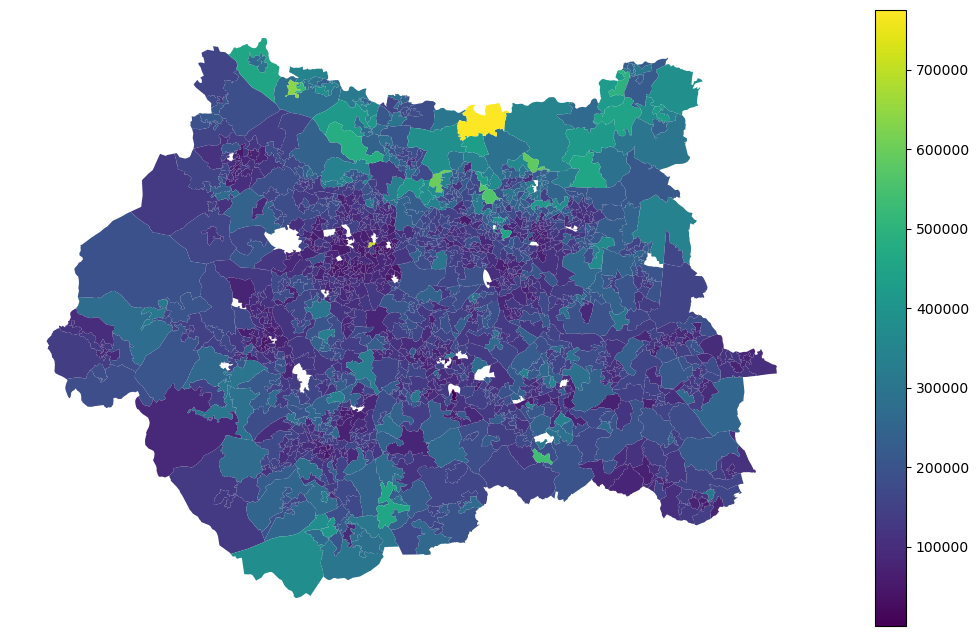

In [50]:
f,ax = plt.subplots(1, figsize=(16,8))
house.plot(column='median_18Q2',ax=ax, legend=True)

# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

In [51]:
AHAH_shape =gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
AHAH_data = pd.read_csv('Example_CDRC_Data/Access_to_Healthy_Assets_and_Hazards_AHAH/Combined_Authorities/E47000003/tables/E47000003.csv')

AHAH = pd.merge(AHAH_shape, AHAH_data,  on='lsoa11cd',  how='left')

In [52]:
AHAH.head()

lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  r_rank  h_rank  g_rank  e_rank      r_exp  \
0  West Yorkshire  Bradford 016A   26204   24968   25575   18970  22.244389   
1  West Yorkshire  Bradford 016B   20123   24733   14741   19068  14.863754   
2  West Yorkshire  Bradford 018A    6803   34023   33369   14715   4.035315   
3  West Yorkshire  Bradford 016C   30537   18925    9414   20192  29.470202   
4  West Yorkshire  Bradford 016D   26087   13826   16249   18577  22.077559   

       h_exp  ...  d_pubs_dist  d_leis_dist  d_blue_dist  d_off_dist  \
0  20.540297  ...            9            2            1           5   
1  20.230112  ...            4            4            4           5   
2  37.574157  ...            2            7            5           3   
3  13.652407  ...            8            1            1           6   
4   9.109686  ...            7            2            2           5   

   d_tobac_dist  d_green_pas  d_green_act  d_no2_mean  d_pm10_mean  d_so2_mean  
0             6            8           10           6            3           7  
1             7            6            3           6            3           7  
2             4            7           10           5            3           6  
3             8            7            5           6            4           8  
4             7            8            6           6            3           7  

[5 rows x 52 columns]

Check CRS

In [53]:
AHAH.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance_Survey_of_Great_Britain_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Note CRS: 'tmerc' learn more here: https://proj.org/operations/projections/tmerc.html

Ensure AHAH CRS the same as the house CRS (to allow overlayed mapping) 

In [54]:
AHAH = AHAH.to_crs(house.crs)

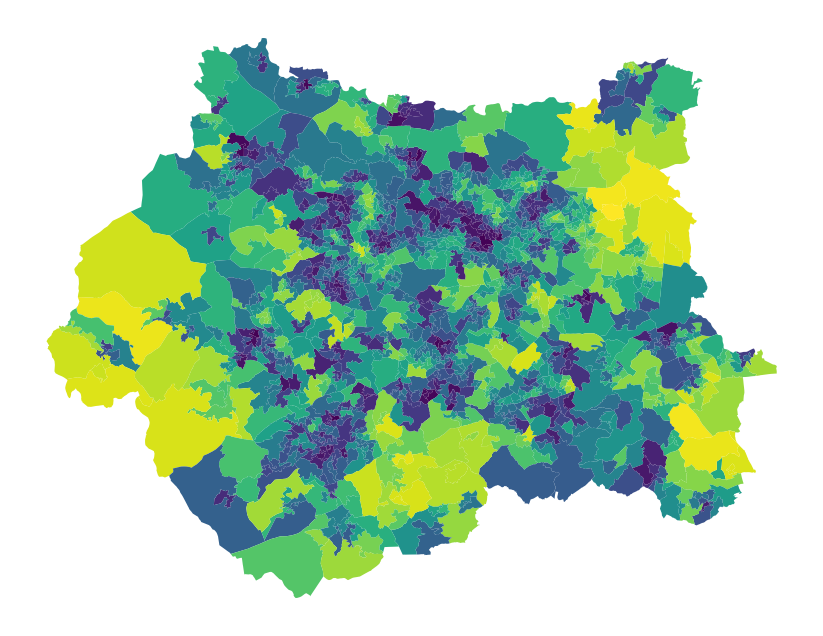

In [55]:
f,ax = plt.subplots(1, figsize=(16,8))
AHAH.plot(ax=ax, column='g_rank');
# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

Data for the AHAH index was collected in or as close to 2016 as possible. So we might only want to look at how environmental quality affects house price in 2016.

In [56]:
# get just data releavnt to 2016 from house price df
house_16 = house[['lsoa11cd', 'geometry', 'CAUTH18NM', 'lsoa11nm','median_16Q1',
       'median_16Q2', 'median_16Q3', 'median_16Q4']]

In [57]:
house_16.head()

lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  median_16Q1  median_16Q2  median_16Q3  \
0  West Yorkshire  Bradford 016A     141500.0     155500.0     107750.0   
1  West Yorkshire  Bradford 016B     118500.0     155000.0     148500.0   
2  West Yorkshire  Bradford 018A     330000.0     345000.0     412000.0   
3  West Yorkshire  Bradford 016C     133500.0     130000.0     151750.0   
4  West Yorkshire  Bradford 016D     147000.0     170000.0     176000.0   

   median_16Q4  
0     169500.0  
1     116000.0  
2     359000.0  
3     147750.0  
4     198500.0

In [58]:
house_16.groupby(['median_16Q2', 'median_16Q3', 'median_16Q4'])

We might also want to calculate the mean house price across 2016

In [59]:
house_16['mean_16'] = house_16.loc[: , ['median_16Q2', 'median_16Q3', 'median_16Q4']].mean(axis=1)
house_16.head()

/Users/francescapontin/opt/anaconda3/envs/spatial_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  median_16Q1  median_16Q2  median_16Q3  \
0  West Yorkshire  Bradford 016A     141500.0     155500.0     107750.0   
1  West Yorkshire  Bradford 016B     118500.0     155000.0     148500.0   
2  West Yorkshire  Bradford 018A     330000.0     345000.0     412000.0   
3  West Yorkshire  Bradford 016C     133500.0     130000.0     151750.0   
4  West Yorkshire  Bradford 016D     147000.0     170000.0     176000.0   

   median_16Q4        mean_16  
0     169500.0  144250.000000  
1     116000.0  139833.333333  
2     359000.0  372000.000000  
3     147750.0  143166.666667  
4     198500.0  181500.000000

Spatially join the AHAH data to the house price data

In [60]:
AHAH_house = gpd.sjoin(house_16, AHAH, how='left')

# check

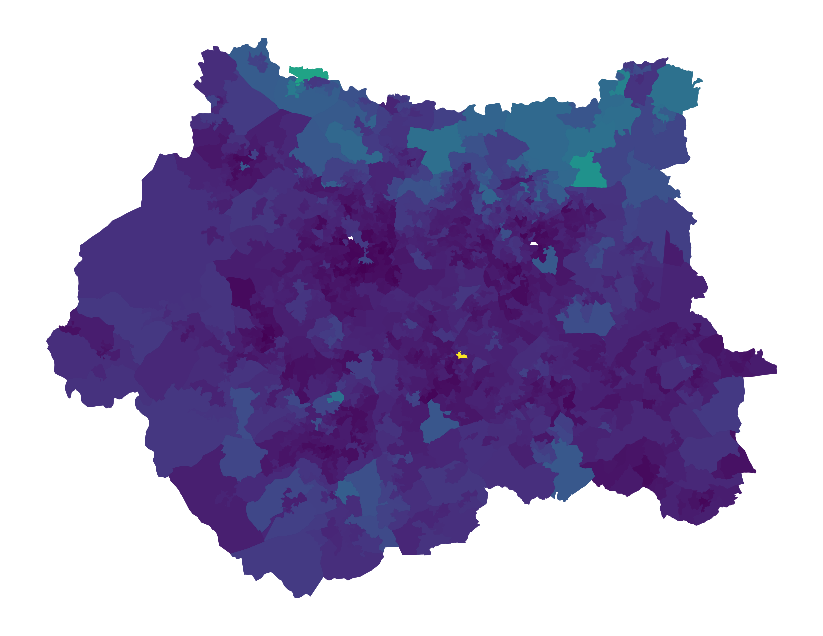

In [61]:
# plot to check join worked 

f,ax = plt.subplots(1, figsize=(16,8))

AHAH_house.plot(column='mean_16',ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

## General analysis ideas
- use summary statistics to get a better understanding of the data
- check for any missing data
- use .loc[] to identify areas which meet criteria of interest
- visualise different element of the data 
- map the data:
    - Produce choropleth maps of other variables
    - Try producing a figure with multiple maps to compare variables
    - Calculate the centroids of the LSOA and try plotting the points varying colour and marker size
    - have a go at buffering or calculating convex hull polygons around the data

- use the data to build predictive models:
    - e.g. Predict average data usage given the Internet user classification (categorical independent variables
    - e.g. Predict house price using environmental variables from the AHAH index.
    - built and evaluated models using the visualisations and techniques introduce in day 1 exercise 5
    - Build other predictive models using the available data or read in census data to help you improve the models
- Try recreating some visualisations from the seaborn examples gallery using your own data: https://seaborn.pydata.org/examples/index.html